In [1]:
import numpy as np
from matplotlib.pylab import *
from numpy import random
from collections import OrderedDict
import pdb

In [2]:
def figsize(width,height):
    rcParams['figure.figsize'] = (width,height)

In [3]:
#%matplotlib notebook
%matplotlib inline

font = {'size'   : 22}
matplotlib.rc('font', **font)

figsize(15, 8)

## Timing

1 million parameters, runs like

```
CUDA_VISIBLE_DEVICES=0 resman -r mnist_timing_dense_$vsize -- ./train.py --arch mnistfc --denseproj $MNIST_DATA -E 3 --depth 3 --width 536 --mb 256 --vsize $vsize --output skip
```

```
171005_155713_4347ff0_lrb_mnist_timing_direct
...
171005_161052_4347ff0_lrb_mnist_timing_dense_100000/
...

$ for dir in *fastfood*; do echo -e "$dir \t\t `cat $dir/diary|grep fastest_avg_iter_time`"; done
```


In [4]:
dat_direct = array([0.00268377])
dat_dense = array([
    [100, 0.0113756],
    [200, 0.0127958],
    [500, 0.0179243],
])
dat_sparse = array([
    [100, 0.00442898],
    [200, 0.00457339],
    [500, 0.00439698],
    [1000, 0.00460089],
    [2000, 0.00469789],
    [5000, 0.00545171],
    [10000, 0.00696318],
    [20000, 0.0109328],
    #[50000, ],
    #[100000, ],
    #[200000, ],
    #[500000, ],
])
dat_fastfood = array([
    [100, 0.0224823],
    [200, 0.0225923],
    [500, 0.0224873],
    [1000, 0.0225131],
    [2000, 0.0222841],
    [5000, 0.0233516],
    [10000, 0.0221408],
    [20000, 0.022167],
    [50000, 0.0229391],
    [100000, 0.0224488],
    [200000, 0.0228059],
    [500000, 0.0232377],
    [1000000, 0.0223511],
])


In [5]:
def plot_dense_sparse_ff(plotfn, dat_direct, dat_dense, dat_sparse, dat_fastfood, xmin=None, saveas=None):
    #plotfn=plot; xmin=0
    #plotfn=semilogx; xmin=90

    leg = OrderedDict()

    hhd = axhline(dat_direct, ls=':', color='k')
    hh, = plotfn(dat_dense[:, 0], dat_dense[:, 1], 'o-', color='b', ms=14)
    leg[hh] = 'dense'
    plotfn(dat_dense[-1, 0], dat_dense[-1, 1], 'X', color='b', ms=22)
    hh, = plotfn(dat_sparse[:, 0], dat_sparse[:, 1], 'o-', color='r', ms=14)
    leg[hh] = 'sparse'
    plotfn(dat_sparse[-1, 0], dat_sparse[-1, 1], 'X', color='r', ms=22)
    hh, = plotfn(dat_fastfood[:, 0], dat_fastfood[:, 1], 'o-', color='m', ms=14)
    leg[hh] = 'fastfood'
    #plotfn(dat_fastfood[-1, 0], dat_fastfood[-1, 1], 'X', color='m', ms=22)

    leg[hhd] = 'direct'

    xlabel('Intrinsic dim d')
    ylabel('time (s)')
    ax = axis()
    axis([xmin, ax[1], 0, ax[3]])
    legend(leg.keys(), leg.values())
    #legend?
    
    if saveas:
        savefig('%s.png' % saveas)
        savefig('%s.pdf' % saveas)

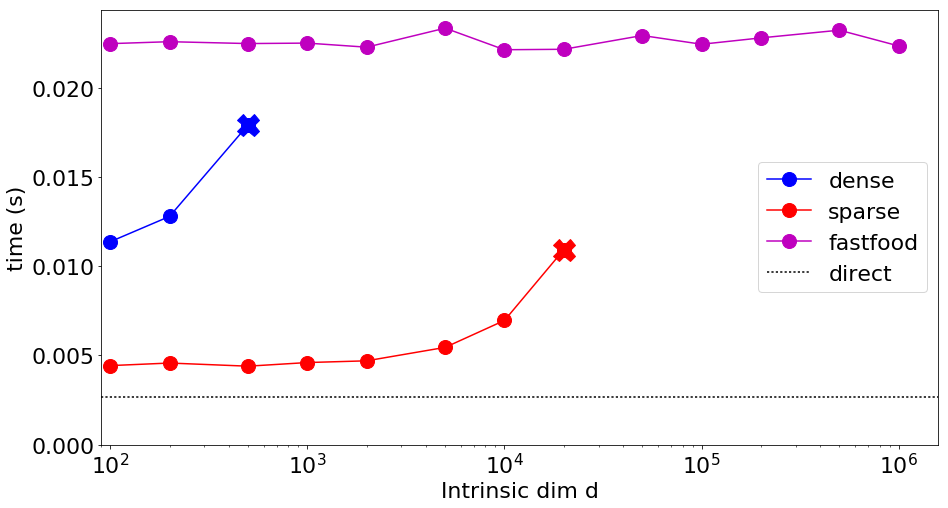

In [6]:
plot_dense_sparse_ff(semilogx, dat_direct, dat_dense, dat_sparse, dat_fastfood, xmin=90, saveas='mnist_1m')

100k parameters, runs like

```
CUDA_VISIBLE_DEVICES=0 resman -r mnist_timing_dense_$vsize -- ./train.py --arch mnistfc --denseproj $MNIST_DATA -E 3 --depth 3 --width 101 --mb 256 --vsize $vsize --output skip
```

```
171005_165748_4347ff0_lrb_mnist_timing_direct
...

$ for dir in *fastfood*; do echo -e "$dir \t\t `cat $dir/diary|grep fastest_avg_iter_time`"; done
```


In [7]:
dat_direct = array([0.00273803])
dat_dense = array([
    [100, 0.00420681],
    [200, 0.00412252],
    [500, 0.00464736],
    [1000, 0.00561655],
    [2000, 0.00833679],
    [5000, 0.0169604],
    [10000, 0.0315385],
])
dat_sparse = array([
    [100, 0.00441457],
    [200, 0.00432252],
    [500, 0.00442043],
    [1000, 0.00424485],
    [2000, 0.00448717],
    [5000, 0.00450832],
    [10000, 0.00496746],
    [20000, 0.00596297],
    [50000, 0.010959],
    [100000, 0.0188555],
])
dat_fastfood = array([
    [100, 0.0195069],
    [200, 0.0195249],
    [500, 0.0204123],
    [1000, 0.0199341],
    [2000, 0.0202374],
    [5000, 0.0213178],
    [10000, 0.020163],
    [20000, 0.0202242],
    [50000, 0.0193474],
    [100000, 0.0196823],
])


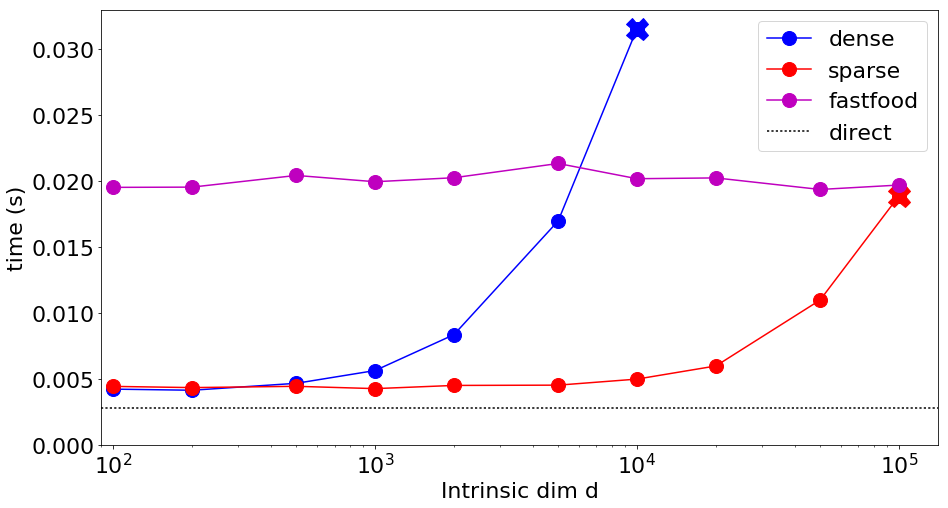

In [8]:
plot_dense_sparse_ff(semilogx, dat_direct, dat_dense, dat_sparse, dat_fastfood, xmin=90, saveas='mnist_100k')

# Random Search for Small Networks

In [9]:
# Style
figsize(12, 6)
plt.rc('text', usetex=True)

### MNIST MLP

Result directories like ```171010_232457_b2612bd_lrb_tiny_mnist_mlp_sweep_0527/```

Run using

```
# [Tue 2017-10-10  3:28:35 pm] Random HP search for MNIST MLP
for ii in `seq -w 1000`; do
    CUDA_VISIBLE_DEVICES=`nextcuda -d 2000` resman -r tiny_mnist_mlp_sweep_${ii} -- ./train.py --arch mnistfc_dir /data/mnist/h5/train.h5 /data/mnist/h5/val.h5 `./rand_args.py` --opt adam --lr .001 --lrr .5 --lrep 4 --lrst 5 -E 30 &
done
wait
exit 0
```

Collected using

```
for dir in *lrb_tiny_mnist_mlp_sweep*; do echo -n "[`cat $dir/diary | grep 'final_stats total_params' | gk 4`, `cat $dir/diary | grep 'final_stats val_accuracy' | gk 4`],"; done > results.txt
```

In [10]:
smallnets_mnist_mlp = array([
[12415, 0.948],[21185, 0.9611],[22485, 0.9644],[7960, 0.9257],[7960, 0.9257],[12895, 0.9511],[7960, 0.9257],[19885, 0.9588],[4105, 0.8014],[6442, 0.9242],[7960, 0.9257],[4075, 0.8532],[6586, 0.9286],[1612, 0.3131],[2443, 0.4556],[2395, 0.7732],[6586, 0.9286],[1612, 0.3132],[12415, 0.948],[4015, 0.8704],[2431, 0.6732],[17590, 0.9564],[4105, 0.8012],[12655, 0.9566],[12415, 0.948],[2419, 0.7016],[8400, 0.9326],[7960, 0.9257],[16330, 0.9605],[1612, 0.3131],[6370, 0.9233],[2431, 0.6732],[1624, 0.3284],[1618, 0.3559],[6658, 0.9124],[4105, 0.8014],[21185, 0.9608],[1600, 0.5657],[2431, 0.6731],[4015, 0.8704],[17170, 0.9601],[1612, 0.3132],[17590, 0.9566],[6586, 0.9289],[15910, 0.9522],[8400, 0.9328],[1606, 0.5484],[12175, 0.9509],[12175, 0.9509],[2395, 0.7732],[2395, 0.7732],[2395, 0.7732],[22485, 0.9658],[7960, 0.9257],[1606, 0.5484],[12415, 0.9478],[2443, 0.4558],[1600, 0.5657],[7960, 0.9257],[12415, 0.948],[2419, 0.7016],[21835, 0.9622],[4015, 0.8704],[2443, 0.4556],[2395, 0.7732],[8180, 0.9325],[3985, 0.8871],[19885, 0.9588],[21835, 0.9622],[20535, 0.9595],[16750, 0.96],[1606, 0.5484],[12655, 0.9566],[1618, 0.3568],[1612, 0.3132],[16330, 0.9605],[1624, 0.3284],[1600, 0.5657],[7960, 0.9257],[12175, 0.9509],[2443, 0.4557],[2443, 0.4556],[4075, 0.8532],[4015, 0.8704],[4045, 0.8899],[4045, 0.8899],[17170, 0.9601],[21835, 0.9623],[16330, 0.9605],[8400, 0.9333],[17170, 0.961],[16750, 0.96],[6370, 0.9233],[16750, 0.9602],[1624, 0.3284],[17590, 0.9566],[7960, 0.9257],[8070, 0.931],[8400, 0.9328],[2419, 0.7013],[19885, 0.9588],[15910, 0.9522],[6658, 0.9124],[16750, 0.96],[6370, 0.9233],[17590, 0.9557],[8290, 0.9271],[8400, 0.9329],[8290, 0.9271],[15910, 0.9522],[7960, 0.9257],[12175, 0.9509],[3985, 0.8871],[3985, 0.8871],[16330, 0.9605],[8290, 0.9271],[19885, 0.9588],[11935, 0.947],[7960, 0.9257],[21835, 0.9626],[17170, 0.9611],[6586, 0.9289],[8180, 0.9325],[1600, 0.5657],[8070, 0.931],[17590, 0.9564],[6514, 0.9278],[4075, 0.8532],[6658, 0.9123],[12655, 0.9567],[8290, 0.9271],[8400, 0.9328],[8290, 0.9277],[2419, 0.7013],[1612, 0.3132],[4105, 0.8013],[17590, 0.9565],[1606, 0.5484],[20535, 0.9595],[21185, 0.9612],[12895, 0.9511],[8180, 0.9325],[4105, 0.8018],[2419, 0.7013],[12415, 0.948],[12655, 0.9566],[16330, 0.9605],[22485, 0.9646],[6658, 0.9124],[2419, 0.7016],[1600, 0.5657],[1618, 0.3563],[6514, 0.9281],[2407, 0.7933],[8290, 0.9271],[12415, 0.948],[20535, 0.9595],[12415, 0.948],[2419, 0.7013],[12175, 0.9509],[8290, 0.9271],[21185, 0.9608],[4075, 0.853],[12175, 0.9509],[8180, 0.9325],[2419, 0.7016],[2407, 0.7933],[1624, 0.3285],[12415, 0.948],[2395, 0.7732],[2407, 0.7933],[2419, 0.7013],[12655, 0.9563],[16330, 0.9605],[8070, 0.931],[12895, 0.9511],[4045, 0.8895],[22485, 0.9641],[6514, 0.9278],[4015, 0.8704],[21835, 0.9626],[16330, 0.9605],[4105, 0.8018],[4105, 0.8016],[2395, 0.7732],[22485, 0.9639],[1612, 0.3132],[8070, 0.931],[8400, 0.9328],[8400, 0.9328],[15910, 0.9522],[12655, 0.9567],[6514, 0.9278],[4075, 0.8532],[12415, 0.948],[4045, 0.8894],[12655, 0.9565],[21185, 0.9607],[1624, 0.3284],[6370, 0.9233],[1618, 0.3567],[17170, 0.9611],[4105, 0.8016],[2443, 0.4556],[6658, 0.9124],[2419, 0.7013],[1612, 0.3132],[17590, 0.9566],[4105, 0.8016],[12895, 0.9511],[6442, 0.9242],[1618, 0.3568],[1624, 0.3284],[12895, 0.9511],[1606, 0.5484],[15910, 0.9522],[12415, 0.948],[21185, 0.9608],[21835, 0.9622],[3985, 0.8871],[12655, 0.9565],[3985, 0.8871],[16750, 0.96],[4015, 0.8704],[16330, 0.9605],[16330, 0.9606],[4015, 0.8704],[21835, 0.9622],[1618, 0.3568],[12895, 0.9511],[21185, 0.9608],[6370, 0.9233],[22485, 0.9644],[2395, 0.7732],[16750, 0.96],[22485, 0.9639],[3985, 0.8871],[7960, 0.9257],[8070, 0.931],[12415, 0.948],[16750, 0.96],[12175, 0.9509],[22485, 0.9645],[15910, 0.9522],[17170, 0.9611],[2407, 0.7933],[2419, 0.7016],[1624, 0.3284],[8290, 0.9271],[12175, 0.9509],[2443, 0.4556],[2419, 0.7016],[2443, 0.4556],[4045, 0.8899],[12895, 0.951],[2395, 0.7732],[4045, 0.8899],[16750, 0.96],[15910, 0.9522],[2443, 0.4556],[1612, 0.3132],[6514, 0.9281],[12175, 0.9509],[12655, 0.9563],[21835, 0.9623],[7960, 0.9257],[17590, 0.9565],[16750, 0.96],[21835, 0.9622],[2443, 0.4558],[20535, 0.9595],[8070, 0.931],[3985, 0.8871],[16750, 0.9602],[12415, 0.948],[8290, 0.9271],[1600, 0.5657],[1612, 0.3132],[2407, 0.7933],[21185, 0.9609],[6658, 0.9124],[12895, 0.9511],[2407, 0.7933],[1618, 0.3567],[1606, 0.5484],[1612, 0.3132],[4075, 0.8532],[16330, 0.9605],[12655, 0.9565],[19885, 0.9588],[17590, 0.9565],[4105, 0.8014],[4015, 0.8704],[4045, 0.8899],[4015, 0.8704],[6586, 0.929],[8070, 0.931],[6586, 0.929],[8180, 0.9325],[1624, 0.3284],[17590, 0.9566],[1606, 0.5484],[21835, 0.9622],[4105, 0.8017],[4015, 0.8704],[2395, 0.7732],[16330, 0.9605],[6658, 0.9124],[11935, 0.947],[1612, 0.3132],[8180, 0.9325],[4075, 0.853],[21835, 0.9622],[3985, 0.8871],[1624, 0.3285],[11935, 0.947],[8400, 0.933],[11935, 0.947],[6514, 0.928],[16330, 0.9605],[4015, 0.8704],[6370, 0.9233],[12175, 0.9509],[11935, 0.947],[20535, 0.9595],[16330, 0.9605],[8180, 0.9325],[2443, 0.4557],[22485, 0.9646],[2443, 0.4556],[17590, 0.9566],[4045, 0.8894],[12415, 0.9478],[15910, 0.9522],[6370, 0.9233],[2431, 0.6732],[8400, 0.9331],[6370, 0.9233],[17590, 0.9568],[21835, 0.9622],[1612, 0.3131],[11935, 0.947],[3985, 0.8871],[11935, 0.947],[12415, 0.948],[17170, 0.961],[2395, 0.7732],[8070, 0.931],[6586, 0.9286],[2395, 0.7732],[21835, 0.9623],[3985, 0.8871],[16330, 0.9605],[22485, 0.9656],[1618, 0.3565],[17170, 0.9609],[12655, 0.9566],[1624, 0.3284],[4015, 0.8704],[19885, 0.9588],[7960, 0.9257],[17170, 0.9601],[21835, 0.9622],[8400, 0.933],[4105, 0.8003],[4075, 0.8531],[1618, 0.3561],[7960, 0.9257],[4105, 0.8016],[15910, 0.9522],[15910, 0.9522],[8070, 0.931],[2395, 0.7732],[2431, 0.6758],[12655, 0.9565],[12895, 0.9511],[17590, 0.9564],[21835, 0.9623],[21835, 0.9622],[2419, 0.7016],[6586, 0.9289],[2407, 0.7933],[11935, 0.947],[17170, 0.9612],[6514, 0.9278],[12895, 0.9511],[3985, 0.8871],[17590, 0.9564],[1618, 0.3567],[4045, 0.8899],[2431, 0.6732],[8290, 0.9271],[12415, 0.948],[17170, 0.9609],[2419, 0.7016],[17590, 0.9566],[6514, 0.9278],[21835, 0.9622],[12655, 0.9566],[16750, 0.9602],[4075, 0.853],[2443, 0.4558],[8400, 0.9328],[19885, 0.9588],[21835, 0.9623],[2443, 0.4556],[12655, 0.9566],[17590, 0.9576],[8400, 0.933],[12895, 0.9511],[2443, 0.4555],[1606, 0.5484],[17590, 0.9564],[1624, 0.3284],[21835, 0.9622],[1612, 0.3132],[1606, 0.5484],[1618, 0.3561],[21185, 0.9608],[8070, 0.931],[19885, 0.9588],[12175, 0.9509],[16750, 0.9602],[15910, 0.9522],[4075, 0.853],[3985, 0.8871],[1600, 0.5657],[12415, 0.9478],[17590, 0.9566],[22485, 0.9645],[8400, 0.9328],[6442, 0.9242],[17590, 0.9563],[6442, 0.9242],[19885, 0.9588],[22485, 0.9649],[8290, 0.9271],[4015, 0.8704],[20535, 0.9595],[21185, 0.9608],[4045, 0.8895],[6370, 0.9233],[1624, 0.3284],[8070, 0.931],[2419, 0.7016],[22485, 0.9644],[6442, 0.9242],[6514, 0.9278],[12655, 0.9566],[8290, 0.9271],[12415, 0.948],[4105, 0.8015],[20535, 0.9595],[1600, 0.5657],[2443, 0.4556],[2419, 0.7016],[6658, 0.9124],[8400, 0.9328],[12655, 0.9567],[8400, 0.9326],[22485, 0.964],[2419, 0.7016],[1600, 0.5657],[21835, 0.9622],[17170, 0.961],[1624, 0.3285],[21835, 0.9622],[2407, 0.7933],[12655, 0.9564],[21185, 0.9609],[1606, 0.5484],[1606, 0.5484],[17590, 0.9566],[22485, 0.9651],[21835, 0.9622],[2443, 0.4556],[4045, 0.8895],[6658, 0.9126],[22485, 0.9649],[3985, 0.8871],[2443, 0.4556],[6658, 0.9124],[11935, 0.947],[1606, 0.5484],[11935, 0.947],[22485, 0.9638],[2407, 0.7933],[12415, 0.948],[12655, 0.9565],[1606, 0.5484],[19885, 0.9588],[4075, 0.853],[6586, 0.929],[8400, 0.9328],[4105, 0.8014],[4045, 0.8899],[21185, 0.9609],[2431, 0.6732],[16330, 0.9605],[12895, 0.9511],[6514, 0.9278],[2395, 0.7732],[8290, 0.9277],[8400, 0.9326],[6586, 0.929],[16750, 0.9602],[17590, 0.9564],[6658, 0.9124],[12175, 0.9509],[6514, 0.9278],[1624, 0.3284],[17590, 0.9566],[1600, 0.5657],[4075, 0.8532],[4075, 0.8532],[4105, 0.8009],[6514, 0.9278],[12655, 0.9566],[2395, 0.7732],[1600, 0.5657],[1618, 0.3569],[20535, 0.9594],[3985, 0.8871],[1618, 0.3564],[3985, 0.8871],[4045, 0.8894],[1606, 0.5484],[2419, 0.7016],[11935, 0.947],[4015, 0.8704],[15910, 0.9522],[3985, 0.8871],[20535, 0.9595],[20535, 0.9595],[1618, 0.3567],[4075, 0.8532],[4075, 0.8532],[12415, 0.948],[6658, 0.9124],[11935, 0.947],[8070, 0.931],[16330, 0.9605],[4105, 0.8017],[4015, 0.8704],[16330, 0.9605],[1600, 0.5657],[4105, 0.8018],[12175, 0.9509],[2395, 0.7732],[8290, 0.9271],[8290, 0.9271],[8400, 0.9328],[19885, 0.9588],[17590, 0.9566],[17170, 0.9601],[16750, 0.9602],[2443, 0.4558],[3985, 0.8871],[3985, 0.8871],[21835, 0.9622],[19885, 0.9588],[2419, 0.7013],[12415, 0.948],[8290, 0.9271],[1600, 0.5657],[8070, 0.931],[6586, 0.9289],[6658, 0.9126],[6442, 0.9242],[12895, 0.9511],[12655, 0.9564],[12415, 0.948],[6514, 0.9277],[12175, 0.9509],[1606, 0.5484],[6514, 0.9278],[2419, 0.7013],[6442, 0.9242],[4045, 0.8894],[6514, 0.9278],[1612, 0.3132],[12415, 0.948],[8070, 0.931],[15910, 0.9522],[19885, 0.9588],[4105, 0.8017],[8180, 0.9325],[19885, 0.9588],[17170, 0.9609],[4105, 0.8014],[2443, 0.4556],[4015, 0.8704],[12655, 0.9561],[22485, 0.9646],[6586, 0.9286],[8180, 0.9325],[6514, 0.9278],[12895, 0.9511],[1606, 0.5484],[19885, 0.9588],[8400, 0.9328],[1618, 0.3566],[7960, 0.9257],[2443, 0.4556],[21835, 0.9625],[8180, 0.9325],[20535, 0.9595],[19885, 0.9588],[3985, 0.8871],[8070, 0.931],[16330, 0.9605],[21835, 0.9622],[2407, 0.7933],[8070, 0.931],[1624, 0.328],[6514, 0.9278],[19885, 0.9588],[17170, 0.961],[16330, 0.9605],[2395, 0.7732],[17170, 0.9612],[12175, 0.9509],[22485, 0.965],[1606, 0.5484],[4105, 0.8016],[17590, 0.9566],[6586, 0.9289],[12655, 0.9561],[7960, 0.9257],[6370, 0.9233],[8400, 0.9328],[6442, 0.9242],[7960, 0.9257],[1624, 0.3285],[1606, 0.5484],[1612, 0.3132],[16750, 0.9602],[1618, 0.3571],[2419, 0.7013],[12175, 0.9509],[12175, 0.9509],[22485, 0.9648],[2395, 0.7732],[6586, 0.9286],[4045, 0.8895],[8290, 0.9271],[11935, 0.947],[4105, 0.8016],[8290, 0.9271],[2431, 0.6732],[17590, 0.9564],[16330, 0.9605],[6514, 0.9278],[6514, 0.9278],[6442, 0.9242],[16750, 0.9602],[6442, 0.9242],[8400, 0.9345],[12655, 0.9566],[20535, 0.9594],[4105, 0.8014],[20535, 0.9595],[21185, 0.9607],[16750, 0.9602],[1618, 0.357],[12655, 0.9567],[16750, 0.96],[1600, 0.5657],[15910, 0.9522],[16330, 0.9605],[1600, 0.5657],[1624, 0.3285],[16750, 0.9602],[1612, 0.3132],[8290, 0.9271],[6658, 0.9124],[19885, 0.9588],[19885, 0.9588],[19885, 0.9588],[2419, 0.7013],[8400, 0.9326],[12895, 0.9511],[12175, 0.9509],[2431, 0.6731],[11935, 0.947],[2395, 0.7732],[6586, 0.929],[1606, 0.5484],[8400, 0.9328],[3985, 0.8871],[6442, 0.9242],[4105, 0.7998],[8400, 0.9328],[1612, 0.3132],[3985, 0.8871],[6370, 0.9233],[1606, 0.5484],[15910, 0.9522],[21835, 0.9623],[1624, 0.3284],[8180, 0.9325],[2431, 0.6732],[6658, 0.9124],[4015, 0.8704],[6586, 0.9289],[12175, 0.9509],[6658, 0.9124],[1624, 0.3285],[11935, 0.947],[21835, 0.9622],[6586, 0.9289],[6658, 0.9124],[1612, 0.3132],[1606, 0.5484],[8400, 0.9326],[2419, 0.7013],[6514, 0.9278],[1606, 0.5484],[6586, 0.9288],[19885, 0.9588],[2395, 0.7732],[17170, 0.9611],[20535, 0.9595],[11935, 0.947],[12415, 0.948],[1624, 0.3285],[11935, 0.947],[6370, 0.9233],[22485, 0.9645],[1618, 0.3563],[15910, 0.9522],[1618, 0.3572],[4045, 0.8899],[6586, 0.9289],[12655, 0.9565],[2443, 0.4558],[2443, 0.4557],[2443, 0.4556],[4075, 0.853],[8180, 0.9325],[8400, 0.933],[1624, 0.3284],[12895, 0.9511],[21185, 0.9609],[7960, 0.9257],[6370, 0.9233],[16330, 0.9606],[6370, 0.9233],[6586, 0.9289],[20535, 0.9591],[12655, 0.9567],[3985, 0.8871],[4045, 0.8895],[4015, 0.8704],[4105, 0.8018],[4075, 0.853],[2443, 0.4558],[2407, 0.7933],[1624, 0.3284],[12895, 0.9511],[7960, 0.9257],[12175, 0.9509],[6370, 0.9233],[2395, 0.7732],[21835, 0.9622],[2395, 0.7732],[4105, 0.8009],[2443, 0.4556],[19885, 0.9588],[1606, 0.5484],[4105, 0.8015],[6514, 0.9278],[21835, 0.9627],[21185, 0.9608],[21835, 0.9622],[1612, 0.3131],[1612, 0.3132],[8180, 0.9324],[7960, 0.9257],[2419, 0.7016],[6658, 0.9124],[4045, 0.8895],[12175, 0.9509],[17170, 0.9601],[12175, 0.9509],[12175, 0.9509],[15910, 0.9522],[16330, 0.9605],[4015, 0.8704],[6442, 0.9242],[8070, 0.931],[12895, 0.9511],[7960, 0.9257],[3985, 0.8871],[6586, 0.9288],[12895, 0.9511],[6442, 0.9242],[17590, 0.9574],[1618, 0.3578],[12655, 0.9561],[8070, 0.931],[2407, 0.7933],[8290, 0.9271],[16330, 0.9605],[6586, 0.9289],[12895, 0.9511],[21835, 0.9623],[1600, 0.5657],[1612, 0.3132],[16330, 0.9605],[12415, 0.948],[3985, 0.8871],[22485, 0.9652],[2395, 0.7732],[8290, 0.9271],[8070, 0.931],[16330, 0.9605],[2431, 0.6732],[4105, 0.8018],[8400, 0.9328],[12175, 0.9509],[6586, 0.9289],[17590, 0.9566],[4105, 0.8016],[2407, 0.7933],[11935, 0.947],[16330, 0.9605],[19885, 0.9588],[6514, 0.9278],[2443, 0.4556],[6586, 0.9289],[16750, 0.9601],[12655, 0.9567],[6514, 0.9278],[16750, 0.96],[2407, 0.7933],[3985, 0.8871],[17170, 0.9612],[4105, 0.8016],[22485, 0.9653],[6586, 0.9289],[19885, 0.9588],[1624, 0.3285],[11935, 0.947],[16750, 0.96],[16330, 0.9606],[21185, 0.9608],[2395, 0.7732],[21835, 0.9622],[6514, 0.9278],[8400, 0.933],[2431, 0.6731],[16750, 0.96],[4105, 0.8015],[1624, 0.3284],[21835, 0.9625],[12895, 0.9511],[3985, 0.8871],[1624, 0.3284],[8180, 0.9325],[8290, 0.9271],[1606, 0.5484],[17590, 0.9564],[12655, 0.9566],[4075, 0.853],[8400, 0.9328],[12655, 0.9562],[15910, 0.9522],[4015, 0.8704],[1606, 0.5484],[1618, 0.3565],[12655, 0.9564],[6442, 0.9242],[12895, 0.9511],[2419, 0.7013],[6658, 0.9124],[16750, 0.96],[8070, 0.931],[2407, 0.7933],[17590, 0.9564],[8400, 0.9329],[8180, 0.9325],[6442, 0.9242],[6658, 0.9124],[12415, 0.948],[1600, 0.5657],[8400, 0.9328],[1612, 0.3132],[4015, 0.8704],[1624, 0.3285],[16330, 0.9605],[11935, 0.947],[2443, 0.4556],[2443, 0.4558],[16750, 0.9601],[4105, 0.8015],[3985, 0.8871],[2443, 0.4557],[4045, 0.8894],[12655, 0.9565],[16750, 0.9602],[21835, 0.9622],[17590, 0.9566],[3985, 0.8871],[1606, 0.5484],[6586, 0.9289],[2431, 0.6732],[22485, 0.965],[12175, 0.9509],[21185, 0.9608],[6442, 0.9242],[16330, 0.9605],[12175, 0.9509],[6658, 0.9126],[6370, 0.9233],[19885, 0.9588],[1612, 0.3132],[22485, 0.9645],[2419, 0.7016],[12655, 0.9566],[17170, 0.9601],[22485, 0.965],[4105, 0.8016],[7960, 0.9257],[1618, 0.3559],[2443, 0.4557],[17170, 0.9601],[12175, 0.9509],[4105, 0.8015],[2395, 0.7732],[1618, 0.3555],[2419, 0.7013],[8180, 0.9325],[1624, 0.3284],[1612, 0.3132],[1606, 0.5484],[2395, 0.7732],[12415, 0.948],[2431, 0.6731],[1606, 0.5484],[12655, 0.9563],[6514, 0.9278],[15910, 0.9522],[2407, 0.7933],[12655, 0.9567],[6658, 0.9124],[12175, 0.9509],[1600, 0.5657],[4105, 0.8012],[1618, 0.3578],[2407, 0.7933],[6370, 0.9233],[12655, 0.9562],[1618, 0.3569],[15910, 0.9522],[6370, 0.9233],[2443, 0.4556],[1606, 0.5484],[19885, 0.9588],[2431, 0.6732],[22485, 0.965],[21835, 0.9623],[8400, 0.9328],[1624, 0.3284],[1618, 0.3566],[8180, 0.9325],[22485, 0.9638],[17170, 0.9609],[6514, 0.9278],[15910, 0.9522],[22485, 0.9645],[1612, 0.3131],[1606, 0.5484],[2419, 0.7013],[2407, 0.7933],[2431, 0.6731],[11935, 0.947],[21185, 0.961],[1600, 0.5657],[16330, 0.9605],[21185, 0.9608],[6658, 0.9124],[3985, 0.8871],[2431, 0.6732],[2395, 0.7732],[1600, 0.5657],[22485, 0.9636],[6514, 0.9278],[1618, 0.3569],[8290, 0.9271],[12895, 0.9511],[22485, 0.965],[2443, 0.4558],[12655, 0.9565],[17590, 0.9564],[21835, 0.9622],[8290, 0.9271],[12655, 0.9567],[20535, 0.9595],[19885, 0.9588],
])

In [11]:
# width 400, depth 2
mnist_direct_mlp_L2 = array([ [0, 0.9758] ])
mnist_subspace_mlp_L2 = array([
[10, 0.1581],[50, 0.4555],[100, 0.6055],[200, 0.7713],[300, 0.8181],[350, 0.8328],[375, 0.8589],[400, 0.8538],[425, 0.8586],[450, 0.8593],[475, 0.8687],[500, 0.8691],[525, 0.8816],[550, 0.8851],[575, 0.8808],[600, 0.888],[625, 0.8899],[650, 0.8931],[675, 0.8945],[700, 0.8982],[725, 0.8967],[750, 0.9022],[775, 0.9003],[800, 0.908],[850, 0.9073],[900, 0.9132],[1000, 0.9182],[1250, 0.9292],[1500, 0.9322],[1750, 0.9219],[2000, 0.9199],[2250, 0.9263],[2500, 0.9295],[3000, 0.931],[4000, 0.9351],[5000, 0.9443],[5500, 0.9471],[6000, 0.9503],[6500, 0.9505],[7000, 0.9508],[7500, 0.9518],[8000, 0.954],[8500, 0.9556],[9000, 0.9574],[9500, 0.9592],[10000, 0.9567],[12500, 0.9657],[15000, 0.9685],[17500, 0.97],[20000, 0.97],[22500, 0.9722],[25000, 0.972]
])
data_mnist_mlp_L2 = vstack((mnist_direct_mlp_L2, mnist_subspace_mlp_L2))

# width 400, depth 3
mnist_direct_mlp_L3 = array([ [0, 0.9791] ])
mnist_subspace_mlp_L3 = array([
[10, 0.2073],[50, 0.4346],[100, 0.6321],[200, 0.7418],[300, 0.8144],[350, 0.8335],[375, 0.8512],[400, 0.8534],[425, 0.8568],[450, 0.8569],[475, 0.8671],[500, 0.8683],[525, 0.8717],[550, 0.8765],[575, 0.8899],[600, 0.8864],[625, 0.89],[650, 0.8982],[675, 0.8961],[700, 0.8956],[725, 0.8964],[750, 0.8989],[775, 0.9049],[800, 0.9072],[850, 0.908],[900, 0.9102],[1000, 0.9206],[1250, 0.9268],[1500, 0.9337],[1750, 0.9278],[2000, 0.9283],[2250, 0.9334],[2500, 0.9339],[3000, 0.9406],[3500, 0.9456],[4000, 0.9441],[4500, 0.9486],[5000, 0.9494],[5500, 0.9535],[6000, 0.9549],[6500, 0.9544],[7000, 0.9581],[7500, 0.9584],[8000, 0.9572],[8500, 0.9591],[9000, 0.9599],[9500, 0.9607],[10000, 0.963],[11000, 0.9667],[12000, 0.9641],[12500, 0.9649],[13000, 0.9685],[14000, 0.9666],[15000, 0.9675],[16000, 0.9698],[17000, 0.9701],[17500, 0.972],[18000, 0.9683],[19000, 0.9704],[20000, 0.9719],[21000, 0.9717],[22000, 0.9721],[22500, 0.9719],[23000, 0.9733],[24000, 0.9694],[25000, 0.9727]
])
data_mnist_mlp_L3 = vstack((mnist_direct_mlp_L3, mnist_subspace_mlp_L3))

data_mnist_mlp = vstack((data_mnist_mlp_L2, data_mnist_mlp_L3))

data_mnist_mlp_2_200_standard = array([
    [0, 0.9799],[10, 0.2023],[50, 0.4345],[100, 0.6124],[200, 0.7551],[300, 0.8189],[350, 0.8347],[375, 0.8565],[400, 0.8516],[425, 0.8596],[450, 0.8578],[475, 0.8621],[500, 0.8693],[525, 0.8803],[550, 0.8787],[575, 0.8789],[600, 0.886],[625, 0.8935],[650, 0.8889],[675, 0.892],[700, 0.8932],[725, 0.901],[750, 0.9001],[775, 0.8966],[800, 0.9004],[850, 0.9081],[900, 0.9104],[1000, 0.9163],[1250, 0.9276],[1500, 0.9302],[0, 0.9811],[10, 0.1615],[50, 0.4593],[100, 0.5827],[200, 0.7603],[300, 0.8174],[350, 0.8294],[375, 0.8287],[400, 0.8343],[425, 0.842],[450, 0.8544],[475, 0.866],[500, 0.8616],[525, 0.8704],[550, 0.8756],[575, 0.88],[600, 0.8775],[625, 0.8785],[650, 0.8852],[675, 0.8912],[700, 0.8882],[725, 0.8905],[750, 0.8912],[775, 0.8993],[800, 0.8991],[850, 0.9],[900, 0.904],[1000, 0.9019],[1250, 0.9146],[1500, 0.9227],[0, 0.9824],[10, 0.1618],[50, 0.4593],[100, 0.5826],[200, 0.7598],[300, 0.8189],[350, 0.8293],[375, 0.8299],[400, 0.8316],[425, 0.8409],[450, 0.8543],[475, 0.866],[500, 0.8628],[525, 0.8698],[550, 0.8756],[575, 0.8802],[600, 0.8771],[625, 0.8786],[650, 0.8852],[675, 0.8912],[700, 0.8883],[725, 0.8904],[750, 0.8912],[775, 0.8995],[800, 0.8992],[850, 0.9],[900, 0.904],[1000, 0.902],[1250, 0.9148],[1500, 0.9228]
])    


# All configs, low dim
mnist_subspace_mlp_low_d = array([
[10, 0.1637],[50, 0.4549],[100, 0.6083],[200, 0.7467],[300, 0.8154],[350, 0.8429],[375, 0.8341],[400, 0.8627],[425, 0.8576],[450, 0.868],[475, 0.8605],[500, 0.867],[525, 0.8727],[550, 0.8742],[575, 0.8855],[600, 0.8768],[625, 0.8903],[650, 0.8987],[675, 0.8902],[700, 0.8946],[725, 0.8961],[750, 0.8959],[775, 0.9017],[800, 0.9037],[850, 0.9046],[900, 0.9093],[1000, 0.9096],[1250, 0.9171],[1500, 0.927],[10, 0.2023],[50, 0.4345],[100, 0.6124],[200, 0.7551],[300, 0.8189],[350, 0.8347],[375, 0.8565],[400, 0.8516],[425, 0.8596],[450, 0.8578],[475, 0.8621],[500, 0.8693],[525, 0.8803],[550, 0.8787],[575, 0.8789],[600, 0.886],[625, 0.8935],[650, 0.8889],[675, 0.892],[700, 0.8932],[725, 0.901],[750, 0.9001],[775, 0.8966],[800, 0.9004],[850, 0.9081],[900, 0.9104],[1000, 0.9163],[1250, 0.9276],[1500, 0.9302],[10, 0.1443],[50, 0.4516],[100, 0.5923],[200, 0.7614],[300, 0.8117],[350, 0.8318],[375, 0.8515],[400, 0.8562],[425, 0.8574],[450, 0.8555],[475, 0.8661],[500, 0.8723],[525, 0.8723],[550, 0.8833],[575, 0.88],[600, 0.8837],[625, 0.8897],[650, 0.8926],[675, 0.8899],[700, 0.8941],[725, 0.8983],[750, 0.9025],[775, 0.8987],[800, 0.9002],[850, 0.911],[900, 0.9112],[1000, 0.909],[1250, 0.9213],[1500, 0.9266],[10, 0.1145],[50, 0.4487],[100, 0.5761],[200, 0.7493],[300, 0.8056],[350, 0.842],[375, 0.8492],[400, 0.8494],[425, 0.852],[450, 0.8544],[475, 0.8643],[500, 0.8697],[525, 0.8676],[550, 0.8704],[575, 0.8748],[600, 0.8844],[625, 0.8861],[650, 0.8874],[675, 0.8888],[700, 0.8928],[725, 0.8943],[750, 0.891],[775, 0.8957],[800, 0.9008],[850, 0.9014],[900, 0.9086],[1000, 0.9088],[1250, 0.9258],[1500, 0.9342],[10, 0.1474],[50, 0.4175],[100, 0.6175],[200, 0.7282],[300, 0.8053],[350, 0.8128],[375, 0.8232],[400, 0.8357],[425, 0.8551],[450, 0.8517],[475, 0.861],[500, 0.8577],[525, 0.8649],[550, 0.8772],[575, 0.8762],[600, 0.8756],[625, 0.8882],[650, 0.8887],[675, 0.8868],[700, 0.8867],[725, 0.8888],[750, 0.8968],[775, 0.8938],[800, 0.8985],[850, 0.9032],[900, 0.9025],[1000, 0.9158],[1250, 0.9218],[1500, 0.9281],[10, 0.1407],[50, 0.4139],[100, 0.593],[200, 0.7428],[300, 0.8154],[350, 0.8307],[375, 0.8349],[400, 0.848],[425, 0.8513],[450, 0.8548],[475, 0.8673],[500, 0.8713],[525, 0.8737],[550, 0.8788],[575, 0.881],[600, 0.8825],[625, 0.8928],[650, 0.8895],[675, 0.8883],[700, 0.8917],[725, 0.8942],[750, 0.8915],[775, 0.8964],[800, 0.9021],[850, 0.8972],[900, 0.9047],[1000, 0.9094],[1250, 0.9261],[1500, 0.9265],[10, 0.1962],[50, 0.4106],[100, 0.6442],[200, 0.7515],[300, 0.8188],[350, 0.8432],[375, 0.8403],[400, 0.8556],[425, 0.8534],[450, 0.8685],[475, 0.873],[500, 0.865],[525, 0.8718],[550, 0.8723],[575, 0.8808],[600, 0.88],[625, 0.882],[650, 0.8878],[675, 0.8935],[700, 0.8954],[725, 0.8862],[750, 0.8989],[775, 0.8966],[800, 0.9057],[850, 0.905],[900, 0.9073],[1000, 0.9172],[1250, 0.9207],[1500, 0.9302],[10, 0.2197],[50, 0.4272],[100, 0.6052],[200, 0.7412],[300, 0.8062],[350, 0.82],[375, 0.8242],[400, 0.8567],[425, 0.8439],[450, 0.8545],[475, 0.8585],[500, 0.8595],[525, 0.87],[550, 0.8706],[575, 0.8736],[600, 0.8797],[625, 0.8879],[650, 0.8884],[675, 0.8818],[700, 0.892],[725, 0.8922],[750, 0.8934],[775, 0.8981],[800, 0.9021],[850, 0.9065],[900, 0.902],[1000, 0.9107],[1250, 0.9227],[1500, 0.928],[10, 0.1807],[50, 0.4554],[100, 0.5472],[200, 0.7225],[300, 0.8022],[350, 0.8333],[375, 0.8404],[400, 0.8409],[425, 0.8364],[450, 0.8447],[475, 0.8454],[500, 0.8601],[525, 0.8656],[550, 0.8759],[575, 0.8675],[600, 0.8758],[625, 0.8846],[650, 0.8783],[675, 0.881],[700, 0.8877],[725, 0.8913],[750, 0.8934],[775, 0.8869],[800, 0.8967],[850, 0.8959],[900, 0.9066],[1000, 0.9054],[1250, 0.9209],[1500, 0.9251],[10, 0.1233],[50, 0.397],[100, 0.5395],[200, 0.7356],[300, 0.7898],[350, 0.8187],[375, 0.8101],[400, 0.8388],[425, 0.8289],[450, 0.8496],[475, 0.8574],[500, 0.8573],[525, 0.8581],[550, 0.8701],[575, 0.8621],[600, 0.8793],[625, 0.8802],[650, 0.8748],[675, 0.8804],[700, 0.8819],[725, 0.8846],[750, 0.8905],[775, 0.8909],[800, 0.8965],[850, 0.9026],[900, 0.9005],[1000, 0.9104],[1250, 0.9194],[1500, 0.9228],[10, 0.1317],[50, 0.3655],[100, 0.6077],[200, 0.7434],[300, 0.8283],[350, 0.8387],[375, 0.8341],[400, 0.8477],[425, 0.8534],[450, 0.8636],[475, 0.8727],[500, 0.8669],[525, 0.8724],[550, 0.8793],[575, 0.884],[600, 0.881],[625, 0.8841],[650, 0.8913],[675, 0.8953],[700, 0.8933],[725, 0.8994],[750, 0.8963],[775, 0.8978],[800, 0.9011],[850, 0.903],[900, 0.9107],[1000, 0.9117],[1250, 0.9272],[1500, 0.9298],[10, 0.1163],[50, 0.4346],[100, 0.6182],[200, 0.7633],[300, 0.8194],[350, 0.8221],[375, 0.8423],[400, 0.8489],[425, 0.8611],[450, 0.871],[475, 0.8625],[500, 0.8666],[525, 0.88],[550, 0.8804],[575, 0.8852],[600, 0.8895],[625, 0.8969],[650, 0.8925],[675, 0.888],[700, 0.9027],[725, 0.8992],[750, 0.9016],[775, 0.9026],[800, 0.9004],[850, 0.9046],[900, 0.9138],[1000, 0.9146],[1250, 0.9224],[1500, 0.9324],[10, 0.1891],[50, 0.4475],[100, 0.5787],[200, 0.737],[300, 0.8108],[350, 0.8431],[375, 0.844],[400, 0.8463],[425, 0.8554],[450, 0.8598],[475, 0.8709],[500, 0.8643],[525, 0.8703],[550, 0.8763],[575, 0.8822],[600, 0.8859],[625, 0.8791],[650, 0.8903],[675, 0.8957],[700, 0.8963],[725, 0.8969],[750, 0.9026],[775, 0.8947],[800, 0.909],[850, 0.9134],[900, 0.9113],[1000, 0.9153],[1250, 0.9234],[1500, 0.9347],[10, 0.1065],[50, 0.3752],[100, 0.6107],[200, 0.729],[300, 0.813],[350, 0.8392],[375, 0.8242],[400, 0.8479],[425, 0.8478],[450, 0.8504],[475, 0.8517],[500, 0.8677],[525, 0.8807],[550, 0.8764],[575, 0.8794],[600, 0.8839],[625, 0.888],[650, 0.8888],[675, 0.8861],[700, 0.8906],[725, 0.8937],[750, 0.8952],[775, 0.9],[800, 0.9055],[850, 0.9003],[900, 0.9153],[1000, 0.9138],[1250, 0.9234],[1500, 0.9289],[10, 0.1515],[50, 0.3671],[100, 0.586],[200, 0.7524],[300, 0.8229],[350, 0.8316],[375, 0.8266],[400, 0.844],[425, 0.8435],[450, 0.8575],[475, 0.8585],[500, 0.853],[525, 0.8656],[550, 0.8792],[575, 0.8835],[600, 0.8801],[625, 0.8788],[650, 0.8818],[675, 0.9008],[700, 0.8916],[725, 0.8957],[750, 0.8967],[775, 0.8945],[800, 0.8989],[850, 0.9032],[900, 0.9065],[1000, 0.9107],[1250, 0.9223],[1500, 0.9282],[10, 0.2042],[50, 0.4588],[100, 0.6231],[200, 0.763],[300, 0.8099],[350, 0.8326],[375, 0.8436],[400, 0.8526],[425, 0.8631],[450, 0.856],[475, 0.8607],[500, 0.8731],[525, 0.8677],[550, 0.8695],[575, 0.8836],[600, 0.8711],[625, 0.8848],[650, 0.8914],[675, 0.9023],[700, 0.8917],[725, 0.8934],[750, 0.9011],[775, 0.9019],[800, 0.903],[850, 0.9002],[900, 0.9115],[1000, 0.9133],[1250, 0.9228],[1500, 0.9287],[10, 0.1581],[50, 0.4555],[100, 0.6055],[200, 0.7713],[300, 0.8181],[350, 0.8328],[375, 0.8589],[400, 0.8538],[425, 0.8586],[450, 0.8593],[475, 0.8687],[500, 0.8691],[525, 0.8816],[550, 0.8851],[575, 0.8808],[600, 0.888],[625, 0.8899],[650, 0.8931],[675, 0.8945],[700, 0.8982],[725, 0.8967],[750, 0.9022],[775, 0.9003],[800, 0.908],[850, 0.9073],[900, 0.9132],[1000, 0.9182],[1250, 0.9292],[1500, 0.9322],[10, 0.2073],[50, 0.4346],[100, 0.6321],[200, 0.7418],[300, 0.8144],[350, 0.8335],[375, 0.8512],[400, 0.8534],[425, 0.8568],[450, 0.8569],[475, 0.8671],[500, 0.8683],[525, 0.8717],[550, 0.8765],[575, 0.8899],[600, 0.8864],[625, 0.89],[650, 0.8982],[675, 0.8961],[700, 0.8956],[725, 0.8964],[750, 0.8989],[775, 0.9049],[800, 0.9072],[850, 0.908],[900, 0.9102],[1000, 0.9206],[1250, 0.9268],[1500, 0.9337],[10, 0.1528],[50, 0.4258],[100, 0.5753],[200, 0.7184],[300, 0.815],[350, 0.8339],[375, 0.8466],[400, 0.8543],[425, 0.8575],[450, 0.8632],[475, 0.8607],[500, 0.8677],[525, 0.8775],[550, 0.8722],[575, 0.8807],[600, 0.8821],[625, 0.8919],[650, 0.8888],[675, 0.884],[700, 0.8897],[725, 0.8957],[750, 0.9046],[775, 0.8993],[800, 0.9037],[850, 0.904],[900, 0.9083],[1000, 0.9194],[1250, 0.925],[1500, 0.937],[10, 0.1546],[50, 0.4475],[100, 0.598],[200, 0.7484],[300, 0.8041],[350, 0.8133],[375, 0.8264],[400, 0.8365],[425, 0.8434],[450, 0.8559],[475, 0.866],[500, 0.8633],[525, 0.8707],[550, 0.8734],[575, 0.8742],[600, 0.8855],[625, 0.8796],[650, 0.8865],[675, 0.8913],[700, 0.8996],[725, 0.8976],[750, 0.8965],[775, 0.9001],[800, 0.9077],[850, 0.9017],[900, 0.9058],[1000, 0.92],[1250, 0.9275],[1500, 0.9303]
])

mnist_subspace_mlp_all = vstack((mnist_subspace_mlp_L2, mnist_subspace_mlp_L3, mnist_subspace_mlp_low_d))

# Shuffled Pixel 
data_mnist_mlp_2_200 = array([
    [0, 0.9847],[10, 0.1775],[50, 0.4675],[100, 0.6624],[200, 0.7713],[300, 0.8382],[350, 0.8519],[375, 0.8519],[400, 0.857],[425, 0.8702],[450, 0.8726],[475, 0.8798],[500, 0.8823],[525, 0.885],[550, 0.8859],[575, 0.8913],[600, 0.8934],[625, 0.8927],[650, 0.8935],[675, 0.8998],[700, 0.8999],[725, 0.9021],[750, 0.9044],[775, 0.9074],[800, 0.9098],[850, 0.9155],[900, 0.9152],[1000, 0.9251],[1250, 0.9303],[1500, 0.9331]
])


data_mnist_sp_mlp_2_200 = array([
    [0, 0.9838],[10, 0.1658],[50, 0.4475],[100, 0.6453],[200, 0.7852],[300, 0.8387],[350, 0.8427],[375, 0.8565],[400, 0.8636],[425, 0.8668],[450, 0.865],[475, 0.8746],[500, 0.8859],[525, 0.888],[550, 0.8891],[575, 0.8953],[600, 0.8967],[625, 0.8968],[650, 0.9013],[675, 0.9001],[700, 0.906],[725, 0.9091],[750, 0.9069],[775, 0.9064],[800, 0.9111],[850, 0.9081],[900, 0.9178],[1000, 0.919],[1250, 0.928],[1500, 0.9358]
])

data_mnist_sp_mlp_2_400 = array([
    [0, 0.9847],[10, 0.1775],[50, 0.4675],[100, 0.6624],[200, 0.7713],[300, 0.8382],[350, 0.8519],[375, 0.8519],[400, 0.857],[425, 0.8702],[450, 0.8726],[475, 0.8798],[500, 0.8823],[525, 0.885],[550, 0.8859],[575, 0.8913],[600, 0.8934],[625, 0.8927],[650, 0.8935],[675, 0.8998],[700, 0.8999],[725, 0.9021],[750, 0.9044],[775, 0.9074],[800, 0.9098],[850, 0.9155],[900, 0.9152],[1000, 0.9251],[1250, 0.9303],[1500, 0.9331]
])

In [12]:
def plot_perf_cmp(dat, logx=False, saveas=None, mfc=(.8,.8,.8), mec='k'):
    plotfn = semilogx if logx else plot
    plotfn(dat[:,0], dat[:,1], 'o', mfc=mfc, mec=mec, ms=14)
    xlabel('Number of parameters $D$')
    ylabel('Validation accuracy')
    if saveas:
        savefig('%s.png' % saveas)
        savefig('%s.pdf' % saveas)

In [13]:
def plot_perf_cmp_trainable(dat1, dat2, logx=False, saveas=None, mfc_d=(.8,.8,.8), mec_d='k', mfc_s=(.7,.7,1), mec_s='b'):
    plotfn = semilogx if logx else plot
    plotfn(dat1[:,0], dat1[:,1], 'o', mfc=mfc_d, mec=mec_d, ms=14, label='Direct')
    plotfn(dat2[:,0], dat2[:,1], 'o', mfc=mfc_s, mec=mec_s, ms=14, label='Subspace')
    xlabel('Number of trainable parameters')
    ylabel('Validation accuracy')
    legend(loc=4)
    if saveas:
        savefig('%s.png' % saveas)
        savefig('%s.pdf' % saveas)

In [14]:
def plot_perf_dim(dat, logx=False, saveas=None, d_Int=None):
    plotfn = semilogx if logx else plot
    figsize(10, 5)
    plt.rc('text', usetex=True)

    dir_perf = np.mean(dat[dat[:,0]==0,:],0)[1]
    sub_perf = dat[dat[:,0]!=0,:]
    
    if d_Int!=None:
        dir_perf = d_Int
    
    unique_dim = sorted(list(set(sub_perf[:,0])))
    perf_mean = [np.mean(dat[dat[:,0]==d,:],0)[1] for d in unique_dim]

    axhline(dir_perf, color=(0.0,0.0,0.0), ls='-')
    axhline(.9 * dir_perf, color=(0.0,0.0,0.0), ls='--')
    plotfn(unique_dim, perf_mean, '-', mec='b', lw=3, mfc=(.7,.7,1), color=(.7,.7,1), ms=14)    
    plotfn(sub_perf[:,0], sub_perf[:,1], 'o', mec='b', lw=3, mfc=(.7,.7,1), color=(.7,.7,1), ms=14)
     
    for i in range(len(unique_dim)):
        if perf_mean[i]>dir_perf*.90:
            print "d_int="+str(unique_dim[i]) + ", acc=" +str( perf_mean[i] ) 
            plotfn(unique_dim[i], perf_mean[i], 'o', mec='b', lw=3, mfc='b', ms=14)
            break
        elif perf_mean[-1]<dir_perf*.90:
            print "d_int="+str(unique_dim[-1]) + ", acc=" +str( perf_mean[-1] ) + "(Warning: larger d should be considered)"
            break                

    xlabel('Subspace dim $d$')
    ylabel('Validation accuracy')
    if saveas:
        savefig('%s.png' % saveas)
        savefig('%s.pdf' % saveas)

In [15]:
def plot_perf_dim(dat, logx=False, saveas=None, d_Int=None):
    plotfn = semilogx if logx else plot
    figsize(10, 5)
    plt.rc('text', usetex=True)

    dir_perf = np.mean(dat[dat[:,0]==0,:],0)[1]
    sub_perf = dat[dat[:,0]!=0,:]
    
    unique_dim = sorted(list(set(sub_perf[:,0])))
    perf_mean = [np.mean(dat[dat[:,0]==d,:],0)[1] for d in unique_dim]

    axhline(dir_perf, color=(0.0,0.0,0.0), ls='-', label='baseline')
    axhline(.9 * dir_perf, color=(0.0,0.0,0.0), ls='--', label='90\% baseline')
    plotfn(unique_dim, perf_mean, '-', mec='b', lw=3, mfc=(.7,.7,1), color=(.7,.7,1), ms=14)    
    plotfn(sub_perf[:,0], sub_perf[:,1], 'o', mec='b', lw=3, mfc=(.7,.7,1), color=(.7,.7,1), ms=14)

    
    if d_Int==None:
        for i in range(len(unique_dim)):
            if perf_mean[i]>dir_perf*.90:
                print "d_int="+str(unique_dim[i]) + ", acc=" +str( perf_mean[i] ) 
                plotfn(unique_dim[i], perf_mean[i], 'o', mec='b', lw=3, mfc='b', ms=14)
                break

    tight_layout()
    legend(loc=4)
    xlabel('Subspace dim $d$')
    ylabel('Validation accuracy')
    if saveas:
        savefig('%s.png' % saveas)
        savefig('%s.pdf' % saveas)

In [16]:
def compt_dim_int(dat, baseline=None):

    dir_perf = np.mean(dat[dat[:,0]==0,:],0)[1]
    sub_perf = dat[dat[:,0]!=0,:]
    
    unique_dim = sorted(list(set(sub_perf[:,0])))
    perf_mean = [np.mean(dat[dat[:,0]==d,:],0)[1] for d in unique_dim]
    
    if baseline!=None:
        dir_perf=baseline
    for i in range(len(unique_dim)):
        if perf_mean[i]>dir_perf*.90:
            break
    return unique_dim[i], perf_mean[i]

In [17]:
def plot_perf_with_std(unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean,dim_solved_std, baseline=None, logx=False,xlim_v=None, saveas=None):
    plotfn = semilogx if logx else plot
    figsize(10, 5)
    plt.rc('text', usetex=True)

    dir_perf = acc_mean[0]
    sub_perf = acc_mean[1:]
    
    if baseline!=None:
        dir_perf=baseline

    axhline(dir_perf, color=(0.0,0.0,0.0), ls='-', label='baseline')
    axhline(.9 * dir_perf, color=(0.0,0.0,0.0), ls='--', label='90\% baseline')
    plotfn(unique_dim[1:], sub_perf, '-', mec='b', lw=3, mfc=(.7,.7,1), color=(.7,.7,1), ms=14)    
    plotfn(unique_dim[1:], sub_perf, 'o', mec='b', lw=3, mfc=(.7,.7,1), color=(.7,.7,1), ms=14)
    plotfn(dim_solved_mean, acc_solved_mean, 'o', mec='b', lw=3, mfc='b', ms=14)
    
    errorbar(unique_dim[1:],  sub_perf,  yerr=acc_solved_std, color='b',  alpha=0.5, capsize=8, elinewidth=5, markersize=8, capthick=2)
    errorbar(dim_solved_mean,  acc_solved_mean,  xerr=dim_solved_std, color='r',  alpha=1.0, capsize=8, elinewidth=5, markersize=8, capthick=4)
    if xlim_v!=None:
        xlim(xlim_v)
    xlabel('Subspace dim $d$')
    ylabel('Validation accuracy')
    tight_layout()
    legend(loc=4)
    if saveas:
        savefig('%s.png' % saveas)
        savefig('%s.pdf' % saveas)



In [18]:
data_btsp = data_mnist_mlp_2_200_standard
print data_btsp.shape

unique_dim = sorted(list(set(data_btsp[:,0])))
print unique_dim

# bootstrap M samples
M = 100
acc_btrp=[]
for d in unique_dim:
    idx_ = np.where(data_btsp[:,0]==d)[0]
    rdm_seed = np.random.randint(3, size=M)
    acc_btrp.append( [ [d, data_btsp[ idx_[i], 1]] for i in rdm_seed  ])
acc_btrp = np.array(acc_btrp)    
print acc_btrp.shape

d_int_array, acc_int_array = np.ones(M), np.ones(M)
for m in range(M):
    d_int_, acc_int_ = compt_dim_int(acc_btrp[:,m,:], baseline=1.0)
    d_int_array[m], acc_int_array[m] = d_int_, acc_int_
    
print d_int_array

dim_solved_mean = np.mean(d_int_array)
dim_solved_std = np.std(d_int_array)
print "d_int: mean="+str(dim_solved_mean) + ", std=" +str( dim_solved_std) 

acc_solved_mean = np.mean(acc_int_array)
acc_solved_std = np.std(acc_int_array)
print "d_int: mean="+str(acc_solved_mean) + ", std=" +str( acc_solved_std) 

acc_mean = np.mean(acc_btrp[:,:,1], axis=1)
acc_std = np.std(acc_btrp[:,:,1], axis=1)

(90, 2)
[0.0, 10.0, 50.0, 100.0, 200.0, 300.0, 350.0, 375.0, 400.0, 425.0, 450.0, 475.0, 500.0, 525.0, 550.0, 575.0, 600.0, 625.0, 650.0, 675.0, 700.0, 725.0, 750.0, 775.0, 800.0, 850.0, 900.0, 1000.0, 1250.0, 1500.0]
(30, 100, 2)
[850. 850. 725. 750. 900. 725. 750. 850. 725. 750. 900. 900. 750. 900.
 900. 725. 750. 800. 750. 725. 725. 725. 850. 725. 900. 800. 725. 850.
 900. 800. 725. 900. 750. 900. 900. 850. 725. 725. 750. 850. 750. 725.
 725. 725. 800. 800. 900. 750. 900. 725. 800. 900. 750. 750. 750. 750.
 750. 725. 725. 725. 725. 725. 750. 725. 725. 725. 750. 800. 750. 750.
 900. 750. 850. 750. 750. 900. 900. 725. 800. 725. 725. 800. 850. 750.
 725. 800. 900. 725. 750. 900. 725. 800. 850. 725. 725. 800. 850. 800.
 725. 750.]
d_int: mean=786.25, std=66.08469943943152
d_int: mean=0.9022100000000001, std=0.0028863644953470466


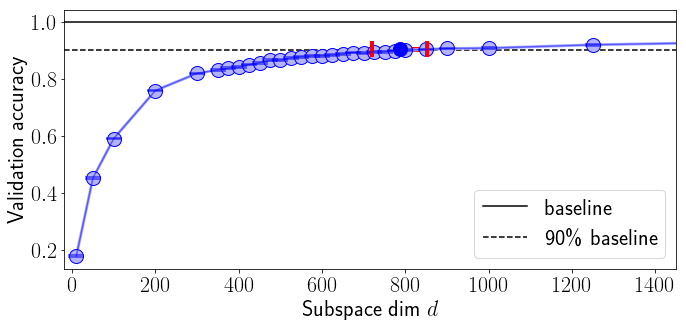

In [19]:
plot_perf_with_std(unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean,dim_solved_std, baseline=1.0, logx=False,xlim_v=[-20,1450], saveas='dim_mnist_mlp_2_200_std')

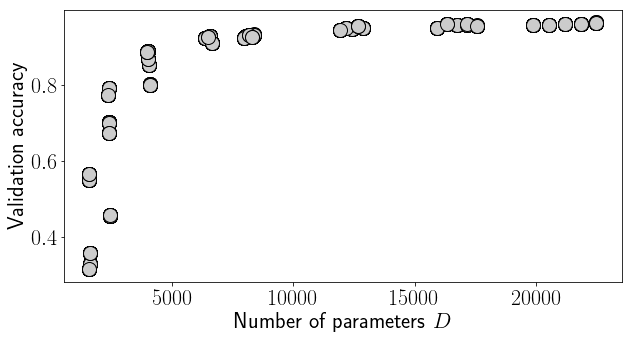

In [20]:
plot_perf_cmp(smallnets_mnist_mlp, False, 'mnist_small_direct_mlp_linear')

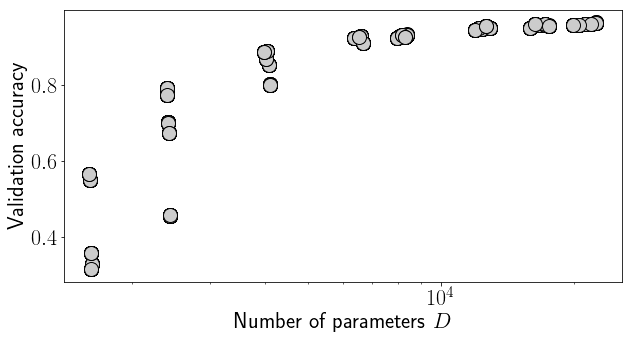

In [21]:
plot_perf_cmp(smallnets_mnist_mlp, True, 'mnist_small_direct_mlp_log')

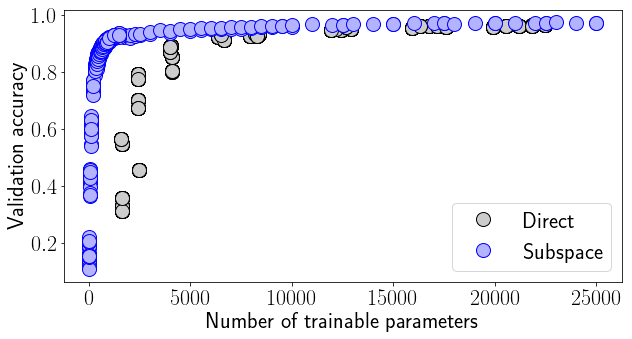

In [22]:
plot_perf_cmp_trainable(smallnets_mnist_mlp, mnist_subspace_mlp_all, False, 'mnist_cmp_mlp_linear')

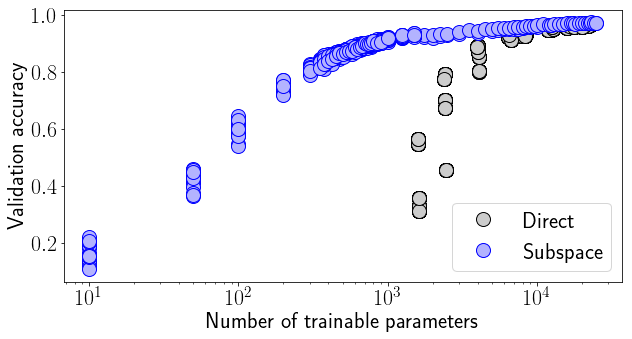

In [23]:
plot_perf_cmp_trainable(smallnets_mnist_mlp, mnist_subspace_mlp_all, True, 'mnist_cmp_mlp_log')

d_int=550.0, acc=0.8808
d_int=525.0, acc=0.8816


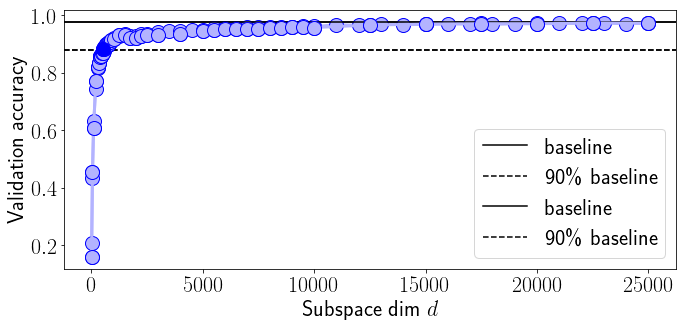

In [24]:
plot_perf_dim(data_mnist_mlp, logx=False, saveas=None)
plot_perf_dim(data_mnist_mlp_L2, logx=False, saveas=None)

d_int=550.0, acc=0.8808
d_int=575.0, acc=0.8899


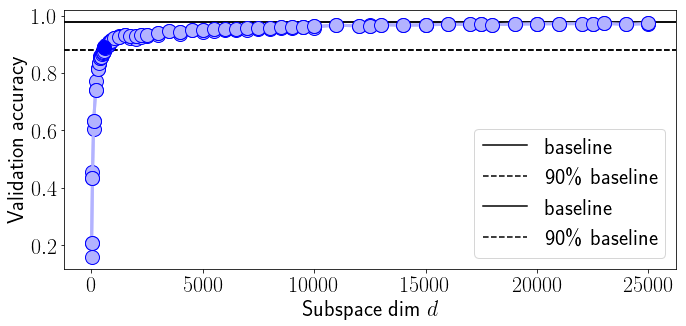

In [25]:
plot_perf_dim(data_mnist_mlp, logx=False, saveas=None)
plot_perf_dim(data_mnist_mlp_L3, logx=False, saveas=None)

d_int=550.0, acc=0.8808


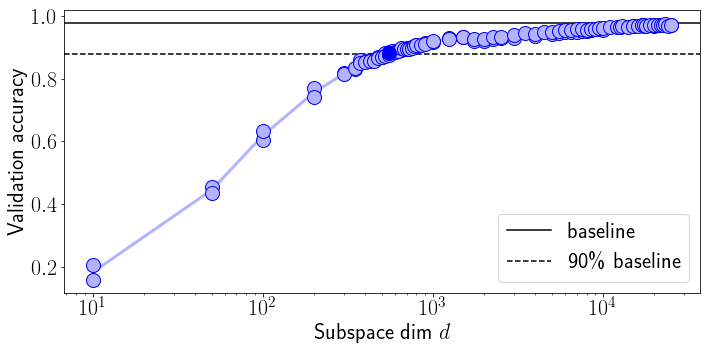

In [26]:
plot_perf_dim(data_mnist_mlp, logx=True, saveas=None)

dir_perf: 0.9758
d_int=525.0, acc=0.8816


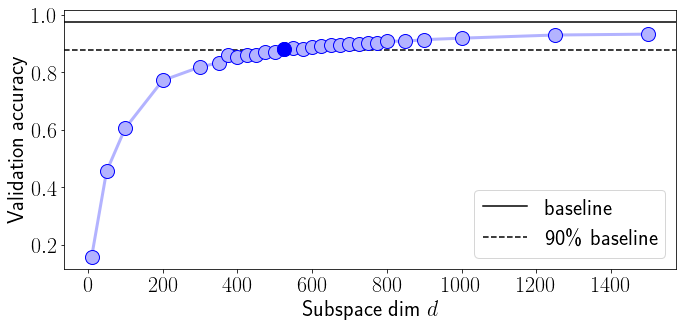

In [27]:
def plot_perf_dim_90(dat, logx=False, saveas=None, d_Int=None):
    plotfn = semilogx if logx else plot
    figsize(10, 5)
    plt.rc('text', usetex=True)

    dir_perf = np.mean(dat[dat[:,0]==0,:],0)[1]
    sub_perf = dat[dat[:,0]!=0,:]
    
    if d_Int!=None:
        dir_perf = d_Int
    
    print 'dir_perf: '+ str(dir_perf)
    
    unique_dim = sorted(list(set(sub_perf[:,0])))
    perf_mean = [np.mean(dat[dat[:,0]==d,:],0)[1] for d in unique_dim]

    axhline(dir_perf, color=(0.0,0.0,0.0), ls='-', label='baseline')
    axhline(.9 * dir_perf, color=(0.0,0.0,0.0), ls='--', label='90\% baseline')
    plotfn(unique_dim, perf_mean, '-', mec='b', lw=3, mfc=(.7,.7,1), color=(.7,.7,1), ms=14)    
    plotfn(sub_perf[:,0], sub_perf[:,1], 'o', mec='b', lw=3, mfc=(.7,.7,1), color=(.7,.7,1), ms=14)

    for i in range(len(unique_dim)):
        if perf_mean[i]>dir_perf*.90:
            print "d_int="+str(unique_dim[i]) + ", acc=" +str( perf_mean[i] ) 
            plotfn(unique_dim[i], perf_mean[i], 'o', mec='b', lw=3, mfc='b', ms=14)
            break

    xlabel('Subspace dim $d$')
    ylabel('Validation accuracy')
    tight_layout()
    legend(loc=4)
    if saveas:
        savefig('%s.png' % saveas)
        savefig('%s.pdf' % saveas)

plot_perf_dim_90(data_mnist_mlp_L2[:30,:], logx=False, saveas='mnist_mlp_depth2_width400', d_Int=None)

dir_perf: 0.9847
d_int=575.0, acc=0.8913


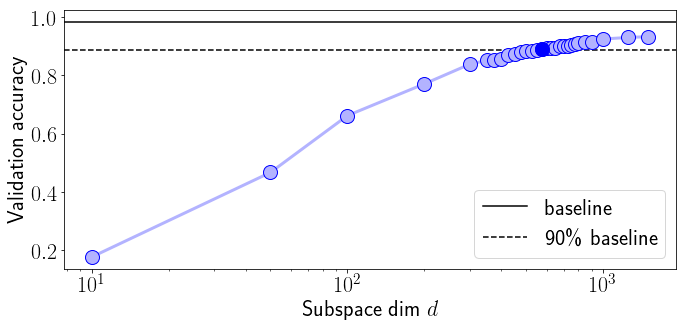

In [28]:
plot_perf_dim_90(data_mnist_sp_mlp_2_400, logx=True, saveas='mnist_mlp_d2_w200_individual', d_Int=None)

dir_perf: 1.0
d_int=750.0, acc=0.9022
198460
0.996235128759


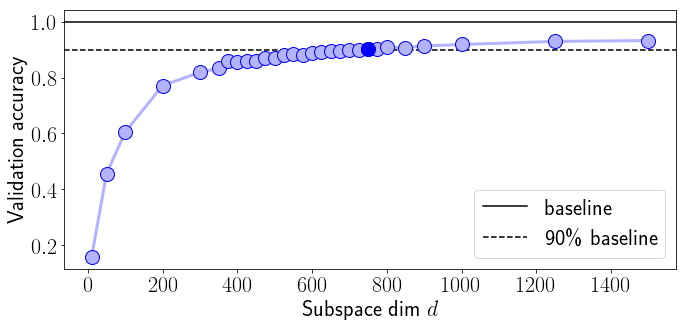

In [29]:
plot_perf_dim_90(data_mnist_mlp_L2[:30,:], logx=False, saveas='mnist_mlp_depth2_width400_global', d_Int=1.0)
print 199210- 750
print (199210- 750.0)/199210

### MNIST LeNet

Result directories like ```tiny_mnist_lenet_dir/171019_065959_5393fd2_lrb_tiny_mnist_lenet_dir_0806/```

Run using

```
resman -d results/tiny_mnist_lenet_dir -r tiny_mnist_lenet_dir_${ii} -- ./train.py /data/mnist/h5/train.h5 /data/mnist/h5/val.h5 --arch mnistlenet_dir `./rand_args.py --lenet` -E 100 --opt 'adam' --lr 0.001 --l2 0.0001
```

Collected using

```
for dir in *lrb_tiny_mnist_lenet_*; do echo -n "[`cat $dir/diary | grep 'final_stats total_params' | gk 4`, `cat $dir/diary | grep 'final_stats val_accuracy' | gk 4`],"; done
```

In [30]:
#smallnets_mnist_lenet = array([
#    [5771, 0.978],[2859, 0.9445],[9014, 0.9781],[2809, 0.9781],[944, 0.9212],[923, 0.8981],[840, 0.5194],[7490, 0.9883],[966, 0.8731],[3507, 0.98],[581, 0.7527],[1186, 0.909],[2002, 0.9811],[1331, 0.9237],[409, 0.9178],[1763, 0.9534],[748, 0.8946],[3174, 0.97],[35781, 0.9863],[2009, 0.9312],[2035, 0.9024],[11137, 0.9644],[7771, 0.9733],[814, 0.9537],[1207, 0.9724],[4773, 0.9608],[1830, 0.916],[1363, 0.9569],[9909, 0.9828],[4862, 0.9829],[19996, 0.9888],[8002, 0.9851],[21202, 0.9882],[713, 0.8921],[17503, 0.9873],[1285, 0.975],[914, 0.9697],[4378, 0.9832],[701, 0.9383],[3821, 0.9785],[1415, 0.9796],[22498, 0.9873],[3328, 0.1064],[7447, 0.9822],[3821, 0.9756],[10326, 0.9884],[1626, 0.622],[1619, 0.9788],[1388, 0.8842],[403, 0.9013],[5472, 0.9833],[9296, 0.9747],[7154, 0.9849],[1955, 0.9483],[32406, 0.9765],[396, 0.7805],[1013, 0.971],[1664, 0.9755],[8468, 0.8701],[665, 0.9027],[8213, 0.9888],[30502, 0.9898],[1319, 0.9801],[15737, 0.9875],[2109, 0.9559],[1591, 0.8961],[32128, 0.9871],[2298, 0.9624],[39310, 0.9898],[35190, 0.9883],[10046, 0.9887],[36754, 0.989],[1616, 0.9123],[3477, 0.9817],[1472, 0.9632],[4323, 0.982],[2373, 0.9761],[2158, 0.9796],[1370, 0.961],[3565, 0.9665],[13049, 0.9871],[1144, 0.9331],[2468, 0.9316],[15432, 0.9846],[743, 0.9391],[2439, 0.9781],[1404, 0.9673],[944, 0.9221],[3273, 0.9777],[122, 0.6218],[6357, 0.6277],[1016, 0.9523],[39972, 0.9913],[8805, 0.9704],[1252, 0.9773],[11327, 0.9862],[17319, 0.9859],[5164, 0.959],[4994, 0.9648],[20009, 0.5637],[3858, 0.9828],[6036, 0.9557],[7603, 0.98],[6919, 0.9828],[8202, 0.9592],[1035, 0.9568],[3186, 0.9791],[822, 0.967],[2017, 0.9844],[580, 0.8635],[7568, 0.9843],[12940, 0.9824],[1966, 0.8717],[2507, 0.962],[8744, 0.9699],[3232, 0.98],[9566, 0.9846],[531, 0.9243],[4217, 0.9702],[5225, 0.9729],[10290, 0.8763],[493, 0.9416],[4310, 0.9335],[4223, 0.9753],[1759, 0.974],[4294, 0.9848],[2239, 0.9241],[7890, 0.9813],[17503, 0.988],[2207, 0.9674],[985, 0.9459],[9848, 0.1064],[1813, 0.9746],[12270, 0.9642],[2808, 0.9564],[8614, 0.9755],[1485, 0.9143],[2504, 0.9424],[15554, 0.9789],[4495, 0.9835],[529, 0.9044],[3335, 0.9779],[1255, 0.972],[5060, 0.9555],[485, 0.8372],[12544, 0.9764],[1049, 0.9423],[2252, 0.9819],[32128, 0.9892],[1916, 0.9278],[20285, 0.9796],[8268, 0.9822],[511, 0.8643],[511, 0.8251],[16618, 0.9688],[2958, 0.9684],[3496, 0.9833],[6820, 0.9822],[511, 0.866],[7225, 0.9692],[3638, 0.9592],[1361, 0.9651],[541, 0.8987],[6212, 0.9831],[27262, 0.9832],[5516, 0.8713],[3512, 0.9561],[1204, 0.6352],[3232, 0.9801],[2745, 0.9751],[5240, 0.9863],[5168, 0.983],[7090, 0.9839],[425, 0.8447],[1214, 0.9735],[979, 0.9662],[709, 0.9485],[1062, 0.9305],[1268, 0.8804],[6155, 0.9871],[8328, 0.9672],[1490, 0.9724],[9842, 0.9866],[422, 0.851],[11282, 0.9841],[15332, 0.9873],[13106, 0.9527],[230, 0.776],[10826, 0.9849],[15736, 0.9853],[1282, 0.929],[1840, 0.9822],[10384, 0.9887],[1493, 0.9324],[546, 0.845],[2251, 0.9661],[2619, 0.9218],[797, 0.972],[1336, 0.9734],[832, 0.9275],[1350, 0.9702],[2997, 0.9744],[2207, 0.9613],[1039, 0.9191],[24420, 0.9893],[2317, 0.9278],[2806, 0.9804],[20706, 0.6714],[5577, 0.9794],[997, 0.9674],[2581, 0.9812],[2470, 0.9664],[1312, 0.9756],[291, 0.8161],[17227, 0.983],[1240, 0.9431],[5569, 0.9673],[396, 0.7797],[1012, 0.9743],[862, 0.5415],[742, 0.9708],[2211, 0.9621],[1573, 0.9532],[4026, 0.9845],[1217, 0.9335],[553, 0.915],[4432, 0.1064],[19568, 0.9863],[3062, 0.9399],[1804, 0.9583],[6396, 0.9833],[21389, 0.9834],[569, 0.9345],[6396, 0.9816],[19996, 0.9897],[1930, 0.8891],[1618, 0.976],[2344, 0.9852],[490, 0.7805],[3352, 0.9649],[5168, 0.9818],[1493, 0.9341],[1209, 0.8852],[4223, 0.9778],[1637, 0.979],[30620, 0.9863],[2839, 0.9795],[620, 0.9412],[1517, 0.9657],[2956, 0.9773],[31685, 0.9726],[649, 0.9566],[14868, 0.9871],[2442, 0.9794],[17907, 0.9867],[8213, 0.9884],[43574, 0.9899],[33815, 0.9871],[3809, 0.9815],[1365, 0.9775],[1124, 0.96],[2469, 0.9755],[461, 0.8457],[3946, 0.9839],[33454, 0.987],[5516, 0.9859],[2956, 0.9859],[28540, 0.9905],[2944, 0.9858],[1430, 0.9358],[704, 0.9556],[453, 0.8399],[2750, 0.952],[13565, 0.9723],[573, 0.9324],[1710, 0.9114],[3172, 0.9814],[238, 0.7838],[17907, 0.9857],[1571, 0.9455],[1367, 0.8792],[6225, 0.977],[35902, 0.9864],[8972, 0.9877],[25996, 0.9871],[2546, 0.9645],[3620, 0.9854],[15554, 0.9774],[2035, 0.8944],[7165, 0.9655],[1747, 0.9728],[11440, 0.9879],[20706, 0.6751],[4864, 0.9782],[1643, 0.9615],[503, 0.9369],[3135, 0.9427],[8580, 0.9673],[2453, 0.9796],[8622, 0.9852],[625, 0.9409],[31980, 0.974],[1493, 0.9332],[1809, 0.9547],[1462, 0.9594],[3184, 0.9815],[31096, 0.9895],[2251, 0.9641],[4517, 0.9683],[519, 0.9429],[3915, 0.9679],[18382, 0.9847],[531, 0.9243],[24430, 0.9888],[970, 0.9681],[525, 0.9197],[122, 0.6211],[4931, 0.9748],[1934, 0.9796],[6173, 0.9845],[10665, 0.9794],[5016, 0.983],[6629, 0.9857],[1443, 0.9201],[17779, 0.9845],[11948, 0.9871],[513, 0.9208],[281, 0.8314],[12401, 0.9672],[32206, 0.9905],[1304, 0.8079],[403, 0.8991],[5401, 0.9777],[1359, 0.9357],[2063, 0.9316],[37746, 0.9884],[3553, 0.9814],[5650, 0.9688],[1950, 0.95],[414, 0.7282],[28504, 0.1064],[7567, 0.9702],[4252, 0.9808],[1310, 0.9592],[1462, 0.9716],[1016, 0.9739],[26272, 0.988],[10342, 0.9837],[2258, 0.9365],[719, 0.8939],[3322, 0.9826],[4083, 0.9865],[5085, 0.9538],[3127, 0.9714],[8805, 0.9718],[3105, 0.9815],[3477, 0.9824],[5212, 0.9832],[2563, 0.9842],[161, 0.6786],[7090, 0.9833],[1653, 0.9746],[6357, 0.6281],[435, 0.7941],[1754, 0.9807],[23188, 0.9856],[642, 0.8537],[2963, 0.9815],[1856, 0.9781],[12224, 0.9885],[1789, 0.9643],[2564, 0.9807],[4499, 0.9839],[1059, 0.9402],[6064, 0.986],[782, 0.8922],[2894, 0.948],[1813, 0.9759],[1916, 0.9808],[20706, 0.6733],[3511, 0.9636],[878, 0.6101],[573, 0.9327],[2380, 0.9847],[1909, 0.982],[959, 0.7043],[10952, 0.9782],[6690, 0.9758],[13318, 0.9834],[12544, 0.9759],[554, 0.8689],[710, 0.9341],[3465, 0.9695],[5753, 0.9768],[2947, 0.9851],[1240, 0.941],[1160, 0.91],[9842, 0.9848],[1034, 0.8733],[1571, 0.9458],[14490, 0.9803],[5340, 0.6486],[1172, 0.9625],[33684, 0.9788],[309, 0.8287],[1156, 0.9332],[1053, 0.9268],[2443, 0.9228],[13453, 0.9854],[1472, 0.9633],[19070, 0.9828],[2775, 0.9709],[998, 0.9039],[8816, 0.9837],[671, 0.9483],[11137, 0.9647],[3990, 0.9687],[1485, 0.9098],[1472, 0.9629],[808, 0.943],[10577, 0.9778],[3154, 0.9831],[5472, 0.9834],[5066, 0.9807],[15190, 0.9896],[2878, 0.9793],[4875, 0.9638],[543, 0.9042],[19574, 0.9867],[1743, 0.9471],[432, 0.9026],[2901, 0.9809],[649, 0.957],[14540, 0.9826],[2621, 0.962],[8640, 0.982],[1073, 0.9495],[10686, 0.985],[4405, 0.981],[10031, 0.9854],[511, 0.8647],[794, 0.9107],[1348, 0.977],[3273, 0.9777],[12847, 0.9857],[1529, 0.9829],[519, 0.9431],[847, 0.8715],[481, 0.9014],[2105, 0.9649],[4161, 0.9757],[2100, 0.9406],[18852, 0.9876],[9048, 0.9873],[422, 0.8552],[1459, 0.9623],[5448, 0.1064],[12031, 0.9867],[1190, 0.9513],[727, 0.9472],[342, 0.7855],[1870, 0.9549],[4726, 0.9822],[13049, 0.9878],[183, 0.7712],[3511, 0.963],[391, 0.8914],[1226, 0.9776],[1525, 0.9791],[3890, 0.9664],[1503, 0.9644],[2781, 0.9455],[3543, 0.9683],[5741, 0.9709],[1331, 0.9196],[885, 0.9278],[17506, 0.9843],[1703, 0.9484],[903, 0.8888],[19966, 0.9879],[969, 0.9313],[963, 0.9034],[1433, 0.9594],[4439, 0.9476],[1742, 0.9792],[5434, 0.9739],[13453, 0.9866],[1405, 0.8849],[6620, 0.9888],[7312, 0.9555],[1748, 0.9772],[6427, 0.9851],[192, 0.7327],[15432, 0.9847],[4707, 0.976],[2158, 0.979],[9729, 0.9842],[35190, 0.9891],[2411, 0.9662],[16951, 0.9823],[3349, 0.9757],[464, 0.8037],[847, 0.9281],[4310, 0.9378],[1750, 0.9749],[665, 0.8918],[2357, 0.9815],[5350, 0.9854],[2470, 0.9809],[782, 0.8951],[10447, 0.974],[1444, 0.9653],[1202, 0.9572],[1777, 0.9649],[2183, 0.9589],[1740, 0.9465],[2438, 0.9837],[13105, 0.9785],[7114, 0.9647],[1534, 0.9355],[1696, 0.9759],[7994, 0.9873],[1746, 0.945],[5194, 0.9773],[9272, 0.9875],[5852, 0.967],[11135, 0.9851],[1877, 0.9771],[1930, 0.8884],[1035, 0.9258],[1183, 0.9356],[1000, 0.9668],[25720, 0.9844],[447, 0.8247],[2788, 0.9584],[3905, 0.9708],[22362, 0.1064],[1877, 0.9781],[18852, 0.988],[2060, 0.9734],[4574, 0.9773],[1742, 0.9806],[968, 0.5767],[35781, 0.9872],[1210, 0.1064],[6440, 0.9813],[3291, 0.9316],[8213, 0.9878],[4654, 0.987],[6328, 0.9853],[451, 0.526],[1151, 0.9283],[460, 0.9292],[9112, 0.9855],[4829, 0.9816],[657, 0.9356],[17630, 0.9873],[308, 0.6976],[2298, 0.9611],[4441, 0.6366],[13485, 0.9803],[615, 0.9202],[1304, 0.808],[1245, 0.9536],[1300, 0.9259],[2098, 0.9534],[620, 0.9549],[701, 0.9367],[2215, 0.938],[8329, 0.9866],[671, 0.9512],[587, 0.8812],[1753, 0.9748],[6754, 0.9859],[2623, 0.9834],[953, 0.9182],[3232, 0.9446],[1443, 0.8405],[588, 0.8777],[7405, 0.9789],[1143, 0.9629],[1957, 0.9796],[15280, 0.9865],[1433, 0.9598],[450, 0.9068],[16216, 0.9867],[31947, 0.9838],[1477, 0.9642],[18331, 0.9883],[28372, 0.9838],[3391, 0.982],[2963, 0.9776],[21754, 0.9891],[14616, 0.9851],[970, 0.9677],[12586, 0.9895],[1654, 0.903],[1442, 0.9109],[1085, 0.5807],[20096, 0.987],[2529, 0.9474],[7906, 0.9869],[17281, 0.9818],[1144, 0.9352],[18058, 0.9876],[1740, 0.921],[180, 0.5147],[775, 0.9057],[3338, 0.9819],[4124, 0.988],[1291, 0.9608],[9232, 0.9803],[6105, 0.9782],[20556, 0.9891],[7242, 0.9831],[513, 0.8799],[620, 0.823],[2859, 0.9668],[2846, 0.9806],[557, 0.912],[3732, 0.9821],[1675, 0.9654],[408, 0.1064],[12270, 0.9645],[712, 0.8879],[2252, 0.9809],[797, 0.9721],[29650, 0.9885],[179, 0.7094],[12487, 0.9789],[12753, 0.9789],[645, 0.8989],[641, 0.962],[4432, 0.1064],[22362, 0.1064],[1381, 0.924],[6862, 0.9706],[1363, 0.8575],[1973, 0.9763],[2031, 0.925],[12030, 0.9904],[581, 0.7572],[2563, 0.9837],[1685, 0.6222],[13049, 0.9879],[2249, 0.9755],[2495, 0.9006],[25720, 0.9841],[17782, 0.9859],[7825, 0.9855],[595, 0.858],[3699, 0.9719],[490, 0.9486],[665, 0.9029],[3275, 0.9766],[4161, 0.9753],[1503, 0.9582],[2098, 0.9517],[8213, 0.9869],[1218, 0.9791],[30541, 0.989],[5894, 0.989],[5516, 0.9679],[20823, 0.9855],[13670, 0.9883],[7574, 0.9885],[3854, 0.9723],[566, 0.7955],[2169, 0.9584],[3423, 0.9626],[2225, 0.969],[2134, 0.9834],[2797, 0.9784],[5586, 0.9826],[2251, 0.9646],[1151, 0.9603],[161, 0.6787],[10946, 0.9876],[1147, 0.9707],[30896, 0.9862],[561, 0.9594],[3006, 0.9483],[2357, 0.9826],[685, 0.8416],[2455, 0.9666],[3951, 0.9743],[2095, 0.9267],[2963, 0.979],[5872, 0.9854],[9628, 0.9854],[2158, 0.9806],[3428, 0.9791],[1942, 0.953],[557, 0.9355],[516, 0.871],[2043, 0.9487],[2323, 0.9777],[1319, 0.979],[1165, 0.87],[14022, 0.987],[1226, 0.9169],[1491, 0.8899],[594, 0.8069],[8444, 0.9803],[6173, 0.982],[5891, 0.9803],[4600, 0.9865],[32206, 0.9899],[8342, 0.9865],[704, 0.9542],[348, 0.8961],[472, 0.8059],[1398, 0.4872],[1847, 0.9746],[766, 0.9435],[32000, 0.988],[998, 0.9257],[31685, 0.9799],[8193, 0.9858],[2576, 0.9817],[14628, 0.9856],[3695, 0.9722],[5638, 0.9856],[926, 0.8939],[11282, 0.9834],[6523, 0.9854],[1719, 0.9627],[9729, 0.9841],[13607, 0.9834],[1835, 0.9488],[913, 0.9358],[4931, 0.976],[1136, 0.9026],[5744, 0.9887],[35781, 0.9881],[3184, 0.9812],[1384, 0.9594],[1537, 0.9772],[388, 0.9276],[3962, 0.9496],[3261, 0.9663],[22362, 0.1064],[3281, 0.9813],[2207, 0.9629],[3633, 0.9697],[2225, 0.9809],[3275, 0.9775],[1491, 0.8901],[2470, 0.9805],[2132, 0.9444],[12112, 0.9841],[122, 0.622],[2549, 0.978],[31702, 0.985],[16778, 0.9869],[5638, 0.9852],[3047, 0.9572],[2776, 0.9635],[1226, 0.9171],[1950, 0.95],[4498, 0.967],[3809, 0.9801],[505, 0.9405],[4722, 0.953],[4674, 0.9866],[1754, 0.9595],[5266, 0.989],[436, 0.7829],[6357, 0.6288],[3062, 0.9383],[953, 0.9664],[11188, 0.9659],[1349, 0.9772],[4161, 0.9776],[1207, 0.9711],[12568, 0.9878],[19704, 0.9898],[2088, 0.954],[10384, 0.9892],[885, 0.9255],[443, 0.7639],[3915, 0.9671],[4161, 0.9777],[3057, 0.9579],[13809, 0.9847],[493, 0.9415],[27763, 0.987],[1468, 0.9482],[26800, 0.9742],[10952, 0.9797],[2859, 0.9453],[2801, 0.9715],[704, 0.948],[1522, 0.9313],[361, 0.8593],[1900, 0.9829],[939, 0.9322],[12640, 0.9851],[1117, 0.9811],[2562, 0.9788],[14885, 0.9871],[1933, 0.9828],[12788, 0.9774],[2517, 0.603],[13049, 0.9872],[8963, 0.9818],[1675, 0.9645],[722, 0.9447],[328, 0.7993],[16652, 0.9904],[7242, 0.9846],[2281, 0.9731],[11440, 0.9881],[6589, 0.9624],[17170, 0.9714],[23012, 0.9861],[812, 0.9472],[969, 0.9317],[16042, 0.9894],[7906, 0.9891],[8652, 0.9539],[4310, 0.933],[5872, 0.9837],[1847, 0.9743],[8892, 0.9852],[1746, 0.9451],[1425, 0.9645],[620, 0.8083],[777, 0.8859],[18334, 0.9893],[19744, 0.9878],[891, 0.95],[17005, 0.9716],[709, 0.9388],[20271, 0.983],[409, 0.9319],[2285, 0.9628],[1747, 0.9705],[17170, 0.9745],[3826, 0.9799],[985, 0.9446],[20154, 0.9722],[12663, 0.981],[2251, 0.9634],[237, 0.7453],[7154, 0.9833],[22755, 0.9891],[2063, 0.9647],[2103, 0.9321],[1165, 0.8668],[2667, 0.9777],[2177, 0.9764],[1929, 0.9623],[3395, 0.9539],[186, 0.7189],[4562, 0.9889],[4498, 0.9817],[763, 0.9452],[4607, 0.9861],[2443, 0.9244],[1589, 0.9451],[2374, 0.9791],[303, 0.89],[42296, 0.9844],[2577, 0.978],[437, 0.8868],[906, 0.9456],[2620, 0.9362],[3806, 0.9833],[16778, 0.9871],[11282, 0.9832],[4115, 0.9674],[5715, 0.9748],[6371, 0.9853],[1522, 0.975],[3543, 0.9694],[1062, 0.9307],[256, 0.7372],[2061, 0.9741],[2618, 0.982],[11002, 0.9805],[1391, 0.9381],[4034, 0.9819],[2668, 0.9824],[649, 0.9581],[9628, 0.9858],[7242, 0.9834],[1825, 0.9675],[10812, 0.9848],[7546, 0.9826],[5618, 0.9847],[1174, 0.921],[633, 0.947],[3381, 0.9573],[31172, 0.9873],[7825, 0.9842],[35902, 0.9874],[1133, 0.8941],[587, 0.8834],[4437, 0.981],[1406, 0.9568],[2562, 0.9794],[1533, 0.9614],[10166, 0.981],[1564, 0.908],[703, 0.9431],[26485, 0.9702],[4875, 0.9645],[3025, 0.9638],[555, 0.9247],[6692, 0.9833],[1174, 0.9211],[1707, 0.9807],[9523, 0.9866],[13367, 0.9852],[263, 0.782],[1639, 0.9392],[721, 0.9661],[625, 0.9406],[18109, 0.9745],[2513, 0.953],[546, 0.8455],[959, 0.8957],[12640, 0.9856],[17200, 0.983],[1848, 0.9776],[768, 0.9483],[19704, 0.9894],[933, 0.9728],[17281, 0.9808],[23364, 0.9874],[9994, 0.9892],[3899, 0.9629],[546, 0.843],[16042, 0.9906],[2466, 0.9092],[17446, 0.9762],[10753, 0.9776],[9112, 0.9847],[34077, 0.9852],[525, 0.9194],[17098, 0.9886],[1272, 0.9019],[2086, 0.1064],[692, 0.9086],[7558, 0.9853],[2057, 0.9686],[6064, 0.9856],[18734, 0.9863],[3006, 0.9486],[12224, 0.9885],[1554, 0.9463],[837, 0.9569],[425, 0.847],[31980, 0.9721],[2368, 0.9394],[1017, 0.9595],[923, 0.9751],[278, 0.904],[1251, 0.9292],[1539, 0.9564],[2249, 0.9757],[4406, 0.9701],[6062, 0.1064],[1472, 0.9608],[1235, 0.915],[1251, 0.9214],[1477, 0.9636],[2678, 0.9819],[679, 0.9469],[1533, 0.9614],[36436, 0.9898],[6328, 0.9858],[26994, 0.9893],[4517, 0.9705],[4441, 0.9728],[36042, 0.9874],[1661, 0.9615],[6898, 0.9765],[1430, 0.9267],[14022, 0.9856],[766, 0.9431],[3688, 0.985],[1479, 0.9477],[2544, 0.9581],[26548, 0.9895],[34764, 0.9892],[2495, 0.8971],[1210, 0.1064],[15964, 0.9785],[970, 0.9689],[6227, 0.9819],[1664, 0.7556],[14804, 0.9865],[2943, 0.9783],[885, 0.9246],[2149, 0.9697],[3104, 0.9844],[1443, 0.9744],[1619, 0.9789],[5264, 0.9866],[1289, 0.8004],[9622, 0.986],[7500, 0.9867],[193, 0.4328],[1418, 0.1064],[4210, 0.9873],[1901, 0.9702],[26548, 0.9894],[2057, 0.9683],[5988, 0.9827],[979, 0.9704],[838, 0.9537],[11002, 0.9824],[901, 0.9514],[36328, 0.9896],[4720, 0.9851],[3110, 0.9798],[1105, 0.9516],[1391, 0.8546],[1637, 0.9787],[3986, 0.9818],[543, 0.9041],[336, 0.8856],[7225, 0.9673],[573, 0.9323],[2410, 0.9774],[3815, 0.9835],[19574, 0.9882],[5731, 0.9811],[2974, 0.9872],[12712, 0.9719],[15247, 0.9883],[2500, 0.9609],[17630, 0.988],[1619, 0.9785],[3809, 0.9796],[7225, 0.9679],[2068, 0.9733],[6478, 0.9852],[17204, 0.9878],[7607, 0.9827],[646, 0.7646],[9729, 0.9842],[11473, 0.9864],[3799, 0.9773],[837, 0.9573],[1763, 0.9544],[891, 0.9577],[1083, 0.9181],[5616, 0.987],[391, 0.8871],[766, 0.9436],[1365, 0.9804],[1755, 0.9613],[2571, 0.9631],[4826, 0.9345],[14948, 0.9854],[1474, 0.8633],[1647, 0.8048],[1430, 0.9361],[2415, 0.1064],[3979, 0.9797],[2219, 0.986],[1350, 0.9384],[24720, 0.9886],[729, 0.9377],[2387, 0.9692],[9467, 0.981],[1202, 0.9574],[491, 0.8005],[1870, 0.9573],[1723, 0.9814],[14948, 0.9851],[6750, 0.9724],[1316, 0.9503],[5891, 0.9824],[377, 0.8084],[2848, 0.9591],[6044, 0.9672],[1750, 0.9734],[3216, 0.9595],[933, 0.9716],[803, 0.9089],[4142, 0.971],[8973, 0.9807],[1630, 0.9791],[3796, 0.9854],[1435, 0.9575],[3951, 0.9767],[12224, 0.9888],[3191, 0.9685],[853, 0.9598],[3610, 0.9328],[4824, 0.9613],[1522, 0.9311],[664, 0.55],[1443, 0.9202],[7890, 0.9807],[1129, 0.9487],[26707, 0.9827],[2100, 0.9391],[1021, 0.968],[19213, 0.9847],[1472, 0.9633],[1175, 0.9635],[5539, 0.9665],[436, 0.8368],[2225, 0.9811],[544, 0.8874],[19322, 0.985],[1005, 0.8925],[1459, 0.9616],[2621, 0.9613],[2358, 0.9301],[3698, 0.9732],[2846, 0.9807],[2468, 0.9318],[4027, 0.9789],[15737, 0.9881],[6748, 0.9747],[803, 0.9118],[2346, 0.9521],[7492, 0.9742],[1459, 0.9603],[7567, 0.9719],[246, 0.8676],[26548, 0.9895],[1133, 0.9174],[1741, 0.9633],[3328, 0.1064],[308, 0.8276],[28650, 0.9892],[3047, 0.9558],[9232, 0.9821],[5988, 0.9832],[7180, 0.9862],[4325, 0.9821],[3543, 0.9705],[4378, 0.9809],[2399, 0.9796],[2158, 0.9805],[6004, 0.9818],[954, 0.9488],[1289, 0.8006],[3633, 0.97],[11694, 0.989],[1929, 0.962],[2197, 0.9682],[1098, 0.8858],[7276, 0.9865],[1556, 0.1064],[4203, 0.9839],[1877, 0.978],[15332, 0.9886],[3784, 0.9829],[1406, 0.9554],[1618, 0.9747],[1197, 0.9268],[1143, 0.9617],[2392, 0.9791],[1595, 0.9685],[923, 0.8972],[6256, 0.947],[303, 0.8887],[9318, 0.9818],[804, 0.7291],[381, 0.9036],[11530, 0.9884],[9166, 0.9829],[32799, 0.9856],[14490, 0.9816],[212, 0.7211],[4405, 0.9793],[5450, 0.7922],[2063, 0.9661],[37606, 0.9889],[42722, 0.986],[2462, 0.9826],[1777, 0.9668],[5257, 0.9828],[2347, 0.976],[1161, 0.9368],[1785, 0.973],[899, 0.8082],[10642, 0.972],[2618, 0.9817],[1172, 0.8794],[25996, 0.9872],[2859, 0.9437],[10994, 0.9773],[17557, 0.9828],[22512, 0.9853],[4363, 0.9776],[4001, 0.9843],[3108, 0.961],[710, 0.934],[1652, 0.9309],[5894, 0.9892],[683, 0.8979],[2035, 0.9055],[1763, 0.9555],[993, 0.9594],[513, 0.8767],[291, 0.8149],[5342, 0.9839],[13208, 0.9654],[10447, 0.9723],[7066, 0.9873],[6044, 0.8766],[2073, 0.9718],[2197, 0.6568],[20556, 0.9894],[27652, 0.4922],[443, 0.8643],[6896, 0.9833],[2439, 0.978],[2507, 0.9606],[4013, 0.9632],[1491, 0.8895],[39972, 0.9896],[9081, 0.9782],[3477, 0.9809],[645, 0.9073],[3442, 0.9781],[967, 0.9603],[14439, 0.9776],[30319, 0.9864],[5340, 0.6584],[3074, 0.9714],[227, 0.8617],[412, 0.1064],[15442, 0.983],[4223, 0.9752],[13911, 0.9811],[275, 0.1064],[23364, 0.9877],[1505, 0.976],[4203, 0.9715],[3799, 0.9762],[2846, 0.979],[16216, 0.9863],[6154, 0.9863],[13494, 0.9847],[913, 0.9372],[13015, 0.9826],[8614, 0.9757],[15190, 0.9881],[28204, 0.9901],[3167, 0.9804],[2012, 0.9458],[10753, 0.9765],[7363, 0.9636],[27688, 0.9857],[3261, 0.9671],[7492, 0.9745],[1785, 0.9741],[3543, 0.9701],[4084, 0.981],[1154, 0.922],[1154, 0.9171],[3047, 0.9599],[3273, 0.9769],[1472, 0.9631],[1172, 0.8775],[23716, 0.9886],[754, 0.938],[6225, 0.978],[443, 0.7649],[1005, 0.892],[5549, 0.9754],[5549, 0.9726],[8972, 0.9875],[2021, 0.9628],[3463, 0.9633],[6371, 0.985],[10674, 0.9787],[1961, 0.9216],[868, 0.9104],[337, 0.8876],[10394, 0.9879],[20271, 0.9831],[8597, 0.9853],[2239, 0.9231],[1212, 0.9422],[3868, 0.9846],[4441, 0.6603],[657, 0.9358],[224, 0.7285],[6080, 0.1064],[390, 0.848],[729, 0.9365],[5257, 0.9836],[5744, 0.9887],[1283, 0.9736],[2287, 0.9741],[947, 0.8849],[4072, 0.9779],[135, 0.6455],[2721, 0.9746],[963, 0.9047],[1340, 0.8727],[17779, 0.9871],[14452, 0.9797],[2561, 0.9805],[793, 0.9654],[2317, 0.9267],[4607, 0.9856],[2808, 0.9555],[587, 0.883],[345, 0.485],[453, 0.8399],[8597, 0.9832],[2128, 0.9423],[7492, 0.9744],[1809, 0.9553],[6932, 0.9747],[8604, 0.9891],[23326, 0.9896],[18734, 0.9845],[11396, 0.9845],[1754, 0.9792],[14726, 0.9896],[1035, 0.9414],[14980, 0.9867],[493, 0.9416],[868, 0.9105],[8860, 0.9776],[1246, 0.5212],[743, 0.1064],[19392, 0.9836],[22362, 0.1064],[4958, 0.7438],[620, 0.9404],[7890, 0.98],[2538, 0.9413],[10938, 0.9834],[10401, 0.9767],[796, 0.9494],[847, 0.8868],[10799, 0.9758],[1363, 0.9563],[32128, 0.9891],[485, 0.9269],[16618, 0.9713],[453, 0.9105],[275, 0.1064],[1415, 0.9761],[9048, 0.9865],[305, 0.8817],[2757, 0.9442],[1616, 0.9128],[1515, 0.9106],[5618, 0.9842],[1478, 0.8268],[1847, 0.9739],[3746, 0.9434],[3671, 0.9797],[4824, 0.9642],[2334, 0.9773],[4044, 0.9773],[1161, 0.9362],[303, 0.8873],[9119, 0.9863],[896, 0.912],[1046, 0.9446],[3493, 0.9711],[4630, 0.984],[5266, 0.9876],[836, 0.9488],[5577, 0.9791],[656, 0.878],[329, 0.9285],[1036, 0.8413],[1710, 0.9101],[356, 0.7012],[20186, 0.989],[3784, 0.9738],[1289, 0.8014],[10401, 0.9747],[26800, 0.9772],[3062, 0.9388],[22774, 0.9901],[5875, 0.9819],[793, 0.9651],[8805, 0.9646],[1291, 0.9608],[2563, 0.9844],[1305, 0.9208],[1483, 0.9704],[3573, 0.9647],[5670, 0.9742],[3081, 0.9782],[3784, 0.9758],[646, 0.7655],[2546, 0.9104],[2612, 0.9746],[1066, 0.972],[356, 0.7009],[7784, 0.9757],[741, 0.9266],[3102, 0.9784],[33912, 0.9856],[990, 0.9723],[2483, 0.9728],[15954, 0.9897],[1550, 0.8852],[3277, 0.9842],[8329, 0.9868],[13259, 0.9706],[1542, 0.9285],[22836, 0.9825],[4294, 0.9852],[1248, 0.9141],[11750, 0.9901],[5168, 0.9809],[544, 0.9352],[32799, 0.9868],[3232, 0.9806],[3389, 0.981],[1368, 0.9588],[813, 0.8017],[6862, 0.9624],[2368, 0.9379],[1488, 0.8923],[1268, 0.9477],[648, 0.9361],[6559, 0.9691],[8715, 0.9802],[6291, 0.9687],[599, 0.8448],[1151, 0.9464],[1359, 0.9207],[14452, 0.9804],[5051, 0.9857],[697, 0.9585],[603, 0.9329],[815, 0.824],[911, 0.9553],[28114, 0.989],[391, 0.8877],[15964, 0.9807],[1239, 0.7878],[8622, 0.9858],[2468, 0.9355],[8380, 0.9869],[1319, 0.9803],[15332, 0.9894],[2990, 0.9794],[2117, 0.9529],[4084, 0.9627],[5685, 0.9761],[6754, 0.9873],[31702, 0.9859],[2851, 0.9808],[14843, 0.9859],[11545, 0.9713],[933, 0.9726],[3508, 0.9829],[1124, 0.9584],[15615, 0.984],[962, 0.9449],[608, 0.9431],[1401, 0.9577],[7296, 0.9807],[2825, 0.9655],[2455, 0.9679],[1692, 0.9742],[10766, 0.982],[2453, 0.9782],[5715, 0.9765],[993, 0.928],[1368, 0.9594],[1552, 0.9779],[3962, 0.949],[620, 0.9409],[1665, 0.9553],[1503, 0.9572],[28798, 0.9879],[709, 0.9384],[4289, 0.9844],[38694, 0.9879],[1267, 0.9682],[19568, 0.9868],[2954, 0.7132],[2513, 0.9323],[17557, 0.9825],[15128, 0.9779],[5549, 0.9744],[5616, 0.9866],[3670, 0.9808],[5387, 0.9778],[23716, 0.9895],[2348, 0.9652],[20186, 0.9913],[453, 0.9112],[2240, 0.9636],[3986, 0.9802],[4574, 0.9785],[2103, 0.9329],[2207, 0.9691],[20561, 0.9812],[5891, 0.9788],[543, 0.9043],[799, 0.9341],[727, 0.9448],[4441, 0.6683],[11672, 0.987],[2956, 0.9838],[6111, 0.9726],[22236, 0.9814],[5440, 0.9878],[4610, 0.9775],[14298, 0.9893],[295, 0.5357],[2197, 0.6083],[7607, 0.985],[5891, 0.9809],[3352, 0.965],[4627, 0.983],[1350, 0.9695],[3905, 0.9757],[926, 0.8932],[998, 0.9028],[1428, 0.9427],[7490, 0.9891],[3305, 0.9618],[9119, 0.9858],[3403, 0.9726],[4222, 0.9833],[1469, 0.9187],[1664, 0.8035],[4252, 0.9811],[1173, 0.9729],[8927, 0.9819],[2309, 0.1064],[7688, 0.9752],[2901, 0.9807],[1418, 0.1064],[3905, 0.9804],[4462, 0.9609],[15554, 0.979],[1916, 0.9247],[13696, 0.9887],[961, 0.8956],[2455, 0.9674],[278, 0.9042],[1934, 0.9818],[20837, 0.9755],[664, 0.5467],[21946, 0.9855],[979, 0.9684],[1483, 0.9691],[1292, 0.918],[1607, 0.8744],[2054, 0.9629],[9474, 0.9884],[959, 0.8954],[674, 0.7201],[970, 0.968],[2956, 0.9864],[815, 0.825],[15052, 0.9729],[4462, 0.9607],[2043, 0.9487],[1273, 0.9774],[1239, 0.787],[8703, 0.9639],[683, 0.9026],[5603, 0.968],[23364, 0.9882],[437, 0.8867],[886, 0.9341],[9736, 0.9878],[8986, 0.9831],[2956, 0.9854],[1844, 0.9416],[2105, 0.9725],[840, 0.5663],[10290, 0.8737],[1741, 0.9645],[14338, 0.9785],[16594, 0.9869],[7447, 0.9827],[9848, 0.1064],[3514, 0.9585],[10466, 0.9686],[8805, 0.9667],[14439, 0.9772],[14337, 0.9831],[20926, 0.9841],[6212, 0.9838],[9729, 0.9835],[4432, 0.1064],[135, 0.6462],[472, 0.8051],[1189, 0.978],[886, 0.9338],[1577, 0.967],[1154, 0.9217],[6963, 0.9799],[1479, 0.9479],[3617, 0.9586],[1711, 0.96],[2054, 0.9426],[3331, 0.969],[9250, 0.9779],[531, 0.9255],[1637, 0.9425],[10623, 0.9803],[683, 0.896],[969, 0.9296],[5181, 0.9644],[41676, 0.9911],[4072, 0.9782],[3277, 0.9836],[998, 0.9223],[3493, 0.9713],[10753, 0.9788],[648, 0.9011],[1723, 0.9821],[1697, 0.9738],[3507, 0.9787],[10976, 0.9888],[1466, 0.9486],[3838, 0.949],[12992, 0.9887],[361, 0.8604],[4722, 0.9534],[13105, 0.9802],[701, 0.9388],[5050, 0.984],[390, 0.8017],[3389, 0.9806],[11750, 0.9907],[7304, 0.978],[623, 0.9411],[9203, 0.9843],[8213, 0.9877],[3127, 0.9627],[2639, 0.9809],[2884, 0.9882],[8860, 0.977],[3149, 0.9858],[7500, 0.9885],[482, 0.9277],[15794, 0.9863],[4878, 0.9803],[32537, 0.9761],[1239, 0.7889],[9508, 0.9851],[712, 0.8879],[2057, 0.9683],[1333, 0.9528],[1755, 0.9718],[642, 0.8537],[19574, 0.9885],[12645, 0.9785],[1036, 0.8411],[8459, 0.9722],[6119, 0.9869],[4187, 0.9847],[5760, 0.9821],[2098, 0.9529],[2797, 0.977],[12190, 0.9801],[7603, 0.9729],[2926, 0.978],[7991, 0.9857],[513, 0.8718],[1472, 0.1064],[4688, 0.985],[1911, 0.9747],[2225, 0.9695],[1952, 0.9431],[1462, 0.9797],[6155, 0.9859],[2571, 0.939],[32554, 0.9886],[19444, 0.9896],[1643, 0.975],[2894, 0.9485],[23064, 0.9893],[780, 0.9703],[4930, 0.9549],[2287, 0.9799],[485, 0.927],[1889, 0.9542],[20271, 0.9825],[2103, 0.9321],[8892, 0.9838],[8892, 0.9846],[2052, 0.9773],[15120, 0.988],[1785, 0.9741],[721, 0.966],[33815, 0.9872],[7352, 0.9869],[5747, 0.9801],[30896, 0.9858],[1281, 0.959],[4779, 0.9666],[10598, 0.9722],[7890, 0.9795],[15554, 0.9783],[22755, 0.9893],[1870, 0.9563],[3328, 0.1064],[20561, 0.9783],[15736, 0.9863],[692, 0.9088],[15120, 0.9865],[3081, 0.9784],[227, 0.8618],[1151, 0.9604],[345, 0.4874],[1350, 0.9709],[2323, 0.976],[1471, 0.9581],[422, 0.8515],[2323, 0.9765],[608, 0.9447],[2012, 0.9472],[1181, 0.9596],[2747, 0.9604],[2563, 0.9835],[8213, 0.9898],[1707, 0.9802],[1316, 0.9477],[3057, 0.9596],[5852, 0.9667],[2619, 0.9254],[1597, 0.9212],[1733, 0.9789],[599, 0.959],[1503, 0.9575],[2690, 0.9862],[481, 0.9011],[1003, 0.9719],[1055, 0.9712],[12577, 0.9771],[958, 0.9392],[1038, 0.9414],[1391, 0.9499],[9566, 0.9836],[19070, 0.9799],[914, 0.9674],[3605, 0.9844],[2576, 0.9835],[9848, 0.1064],[1084, 0.9364],[2355, 0.9674],[12464, 0.9855],[1001, 0.8412],[1785, 0.9741],[3149, 0.9848],[6119, 0.9856],[24420, 0.9903],[2462, 0.983],[495, 0.8411],[1335, 0.9617],[10978, 0.9824],[595, 0.8593],[1239, 0.7874],[1406, 0.9534],[275, 0.1064],[377, 0.899],[620, 0.9546],[685, 0.8444],[30502, 0.9903],[464, 0.8138],[274, 0.7821],[1472, 0.1064],[13485, 0.979],[625, 0.9414],[27763, 0.9782],[958, 0.9385],[2484, 0.9322],[2949, 0.9676],[16042, 0.9888],[804, 0.7286],[2132, 0.965],[10674, 0.9803],[1522, 0.9427],[954, 0.9487],[3062, 0.941],[3658, 0.9824],[2970, 0.9728],[288, 0.6861],[15247, 0.9876],[1753, 0.9737],[5060, 0.9491],[7099, 0.9639],[3034, 0.9715],[22755, 0.9887],[1459, 0.9644],[8268, 0.9812],[697, 0.9576],[3261, 0.9658],[6357, 0.6213],[29392, 0.9886],[12940, 0.9826],[3391, 0.9826],[1741, 0.9647],[4786, 0.9824],[2781, 0.9436],[6212, 0.9811],[371, 0.6012],[12224, 0.9877],[704, 0.9557],[2225, 0.9679],[1401, 0.9578],[1035, 0.9417],[21946, 0.9864],[7236, 0.9863],[3141, 0.9269],[457, 0.8953],[1181, 0.9583],[3778, 0.9847],[13485, 0.9782],[2252, 0.9823],[2239, 0.9235],[875, 0.9333],[2943, 0.979],[20096, 0.9871],[15120, 0.9854],[17319, 0.985],[26485, 0.9702],[2219, 0.9847],[1750, 0.9748],[620, 0.9545],[757, 0.9414],[6559, 0.9676],[9994, 0.9885],[7558, 0.9825],[1013, 0.971],[2293, 0.9545],[1401, 0.917],[3149, 0.9857],[3553, 0.9855],[9296, 0.9774],[253, 0.7945],[5539, 0.9652],[1905, 0.9717],[4044, 0.9769],[9250, 0.9811],[2063, 0.9661],[2035, 0.9331],[2287, 0.9798],[186, 0.7187],[5753, 0.9757],[13324, 0.9877],[646, 0.7657],[1001, 0.839],[9376, 0.9801],[15442, 0.98],[5215, 0.9798],[39972, 0.9901],[16352, 0.9853],[15800, 0.9889],[1081, 0.9533],[9784, 0.9864],[782, 0.8927],[681, 0.9266],[17779, 0.9869],[1740, 0.922],[1614, 0.8632],[742, 0.9712],[11327, 0.9859],[5608, 0.9666],[7876, 0.9822],[333, 0.9076],[21258, 0.976],[1031, 0.9172],[998, 0.9023],[977, 0.9214],[2648, 0.9369],[6478, 0.9847],[1384, 0.9608],[16036, 0.9893],[33912, 0.9862],[1856, 0.9784],[6748, 0.9748],[4788, 0.968],[6559, 0.9661],[2507, 0.9615],[13208, 0.966],[1591, 0.898],[808, 0.9431],[20096, 0.9874],[32111, 0.9817],[8032, 0.9867],[1748, 0.9066],[1550, 0.8889],[1696, 0.9764],[32000, 0.9885],[6559, 0.969],[5892, 0.7057],[1973, 0.9801],[3762, 0.7047],[1522, 0.9285],[490, 0.7802],[8342, 0.9862],[179, 0.7094],[1675, 0.9655],[1948, 0.9655],[19568, 0.9853],[725, 0.9216],[173, 0.6874],[2749, 0.9787],[8107, 0.9815],[3085, 0.9589],[135, 0.6457],[348, 0.8967],[2078, 0.9428],[782, 0.8875],[807, 0.9227],[27559, 0.9844],[234, 0.8389],[495, 0.8949],[2024, 0.9288],[16090, 0.9817],[1829, 0.9779],[725, 0.921],[754, 0.9283],[1433, 0.9591],[4779, 0.969],[1435, 0.958],[750, 0.9382],[2839, 0.9827],[10225, 0.9726],[6438, 0.9826],[13318, 0.9847],[780, 0.9716],[1001, 0.8396],[7750, 0.9797],[17503, 0.9871],[2636, 0.9685],[2035, 0.9007],[2299, 0.967],[2500, 0.958],[278, 0.9043],[1609, 0.9561],[864, 0.8843],[8459, 0.9727],[646, 0.8749],[2546, 0.966],[13049, 0.9864],[561, 0.9596],[16951, 0.9822],[1143, 0.9636],[227, 0.8616],[4862, 0.9847],[29392, 0.9889],[3333, 0.9656],[2495, 0.9019],[1552, 0.9784],[12746, 0.9857],[1934, 0.98],[2149, 0.9678],[1677, 0.9586],[27985, 0.9871],[450, 0.898],[10290, 0.8743],[1860, 0.9191],[1341, 0.8138],[2158, 0.9808],[5206, 0.9864],[314, 0.7429],[1396, 0.9346],[1977, 0.9646],[869, 0.9585],[9523, 0.9882],[2529, 0.9706],[1430, 0.9292],[12288, 0.9842],[1525, 0.9794],[1100, 0.9395],[10518, 0.9862],[2618, 0.9825],[6212, 0.9833],[3085, 0.9642],[295, 0.8548],[637, 0.9045],[1210, 0.1064],[337, 0.8855],[15204, 0.9833],[1064, 0.8437],[849, 0.9297],[939, 0.9369],[1365, 0.9771],[12316, 0.9835],[1409, 0.9412],[1165, 0.9558],[2095, 0.4783],[1505, 0.9748],[8193, 0.9862],[12464, 0.9847],[2177, 0.9757],[8420, 0.9885],[4072, 0.9781],[899, 0.904],[852, 0.914],[1750, 0.9743],
#])

smallnets_mnist_lenet_1 = array([
[5771, 0.978],[2859, 0.9445],[9014, 0.9781],[2809, 0.9781],[944, 0.9212],[923, 0.8981],[840, 0.5194],[7490, 0.9883],[966, 0.8731],[3507, 0.98],[581, 0.7527],[1186, 0.909],[2002, 0.9811],[1331, 0.9237],[409, 0.9178],[1763, 0.9534],[748, 0.8946],[3174, 0.97],[35781, 0.9863],[2009, 0.9312],[2035, 0.9024],[11137, 0.9644],[7771, 0.9733],[814, 0.9537],[1207, 0.9724],[4773, 0.9608],[1830, 0.916],[1363, 0.9569],[9909, 0.9828],[4862, 0.9829],[19996, 0.9888],[8002, 0.9851],[21202, 0.9882],[713, 0.8921],[17503, 0.9873],[1285, 0.975],[914, 0.9697],[4378, 0.9832],[701, 0.9383],[3821, 0.9785],[1415, 0.9796],[22498, 0.9873],[3328, 0.1064],[7447, 0.9822],[3821, 0.9756],[10326, 0.9884],[1626, 0.622],[1619, 0.9788],[1388, 0.8842],[403, 0.9013],[5472, 0.9833],[9296, 0.9747],[7154, 0.9849],[1955, 0.9483],[32406, 0.9765],[396, 0.7805],[1013, 0.971],[1664, 0.9755],[8468, 0.8701],[665, 0.9027],[8213, 0.9888],[30502, 0.9898],[1319, 0.9801],[15737, 0.9875],[2109, 0.9559],[1591, 0.8961],[32128, 0.9871],[2298, 0.9624],[39310, 0.9898],[35190, 0.9883],[10046, 0.9887],[36754, 0.989],[1616, 0.9123],[3477, 0.9817],[1472, 0.9632],[4323, 0.982],[2373, 0.9761],[2158, 0.9796],[1370, 0.961],[3565, 0.9665],[13049, 0.9871],[1144, 0.9331],[2468, 0.9316],[15432, 0.9846],[743, 0.9391],[2439, 0.9781],[1404, 0.9673],[944, 0.9221],[3273, 0.9777],[122, 0.6218],[6357, 0.6277],[1016, 0.9523],[39972, 0.9913],[8805, 0.9704],[1252, 0.9773],[11327, 0.9862],[17319, 0.9859],[5164, 0.959],[4994, 0.9648],[20009, 0.5637],[3858, 0.9828],[6036, 0.9557],[7603, 0.98],[6919, 0.9828],[8202, 0.9592],[1035, 0.9568],[3186, 0.9791],[822, 0.967],[2017, 0.9844],[580, 0.8635],[7568, 0.9843],[12940, 0.9824],[1966, 0.8717],[2507, 0.962],[8744, 0.9699],[3232, 0.98],[9566, 0.9846],[531, 0.9243],[4217, 0.9702],[5225, 0.9729],[10290, 0.8763],[493, 0.9416],[4310, 0.9335],[4223, 0.9753],[1759, 0.974],[4294, 0.9848],[2239, 0.9241],[7890, 0.9813],[17503, 0.988],[2207, 0.9674],[985, 0.9459],[9848, 0.1064],[1813, 0.9746],[12270, 0.9642],[2808, 0.9564],[8614, 0.9755],[1485, 0.9143],[2504, 0.9424],[15554, 0.9789],
])
smallnets_mnist_lenet_2 = array([
[4495, 0.9835],[529, 0.9044],[3335, 0.9779],[1255, 0.972],[5060, 0.9555],[485, 0.8372],[12544, 0.9764],[1049, 0.9423],[2252, 0.9819],[32128, 0.9892],[1916, 0.9278],[20285, 0.9796],[8268, 0.9822],[511, 0.8643],[511, 0.8251],[16618, 0.9688],[2958, 0.9684],[3496, 0.9833],[6820, 0.9822],[511, 0.866],[7225, 0.9692],[3638, 0.9592],[1361, 0.9651],[541, 0.8987],[6212, 0.9831],[27262, 0.9832],[5516, 0.8713],[3512, 0.9561],[1204, 0.6352],[3232, 0.9801],[2745, 0.9751],[5240, 0.9863],[5168, 0.983],[7090, 0.9839],[425, 0.8447],[1214, 0.9735],[979, 0.9662],[709, 0.9485],[1062, 0.9305],[1268, 0.8804],[6155, 0.9871],[8328, 0.9672],[1490, 0.9724],[9842, 0.9866],[422, 0.851],[11282, 0.9841],[15332, 0.9873],[13106, 0.9527],[230, 0.776],[10826, 0.9849],[15736, 0.9853],[1282, 0.929],[1840, 0.9822],[10384, 0.9887],[1493, 0.9324],[546, 0.845],[2251, 0.9661],[2619, 0.9218],[797, 0.972],[1336, 0.9734],[832, 0.9275],[1350, 0.9702],[2997, 0.9744],[2207, 0.9613],[1039, 0.9191],[24420, 0.9893],[2317, 0.9278],[2806, 0.9804],[20706, 0.6714],[5577, 0.9794],[997, 0.9674],[2581, 0.9812],[2470, 0.9664],[1312, 0.9756],[291, 0.8161],[17227, 0.983],[1240, 0.9431],[5569, 0.9673],[396, 0.7797],[1012, 0.9743],[862, 0.5415],[742, 0.9708],[2211, 0.9621],[1573, 0.9532],[4026, 0.9845],[1217, 0.9335],[553, 0.915],[4432, 0.1064],[19568, 0.9863],[3062, 0.9399],[1804, 0.9583],[6396, 0.9833],[21389, 0.9834],[569, 0.9345],[6396, 0.9816],[19996, 0.9897],[1930, 0.8891],[1618, 0.976],[2344, 0.9852],[490, 0.7805],[3352, 0.9649],[5168, 0.9818],[1493, 0.9341],[1209, 0.8852],[4223, 0.9778],[1637, 0.979],[30620, 0.9863],[2839, 0.9795],[620, 0.9412],[1517, 0.9657],[2956, 0.9773],[31685, 0.9726],[649, 0.9566],[14868, 0.9871],[2442, 0.9794],[17907, 0.9867],[8213, 0.9884],[43574, 0.9899],[33815, 0.9871],[3809, 0.9815],[1365, 0.9775],[1124, 0.96],[2469, 0.9755],[461, 0.8457],[3946, 0.9839],[33454, 0.987],[5516, 0.9859],[2956, 0.9859],[28540, 0.9905],[2944, 0.9858],[1430, 0.9358],[704, 0.9556],[453, 0.8399],[2750, 0.952],[13565, 0.9723],[573, 0.9324],[1710, 0.9114],[3172, 0.9814],[238, 0.7838],[17907, 0.9857],[1571, 0.9455],[1367, 0.8792],[6225, 0.977],[35902, 0.9864],[8972, 0.9877],[25996, 0.9871],[2546, 0.9645],[3620, 0.9854],[15554, 0.9774],[2035, 0.8944],[7165, 0.9655],[1747, 0.9728],[11440, 0.9879],[20706, 0.6751],[4864, 0.9782],[1643, 0.9615],[503, 0.9369],[3135, 0.9427],[8580, 0.9673],[2453, 0.9796],[8622, 0.9852],[625, 0.9409],[31980, 0.974],[1493, 0.9332],[1809, 0.9547],[1462, 0.9594],[3184, 0.9815],[31096, 0.9895],[2251, 0.9641],[4517, 0.9683],[519, 0.9429],[3915, 0.9679],[18382, 0.9847],[531, 0.9243],[24430, 0.9888],[970, 0.9681],[525, 0.9197],[122, 0.6211],[4931, 0.9748],[1934, 0.9796],[6173, 0.9845],[10665, 0.9794],[5016, 0.983],[6629, 0.9857],[1443, 0.9201],[17779, 0.9845],[11948, 0.9871],[513, 0.9208],[281, 0.8314],[12401, 0.9672],[32206, 0.9905],[1304, 0.8079],[403, 0.8991],[5401, 0.9777],[1359, 0.9357],[2063, 0.9316],[37746, 0.9884],[3553, 0.9814],[5650, 0.9688],[1950, 0.95],[414, 0.7282],[28504, 0.1064],[7567, 0.9702],[4252, 0.9808],[1310, 0.9592],[1462, 0.9716],[1016, 0.9739],[26272, 0.988],[10342, 0.9837],[2258, 0.9365],[719, 0.8939],[3322, 0.9826],[4083, 0.9865],[5085, 0.9538],[3127, 0.9714],[8805, 0.9718],[3105, 0.9815],[3477, 0.9824],[5212, 0.9832],[2563, 0.9842],[161, 0.6786],[7090, 0.9833],[1653, 0.9746],[6357, 0.6281],[435, 0.7941],[1754, 0.9807],[23188, 0.9856],[642, 0.8537],[2963, 0.9815],[1856, 0.9781],[12224, 0.9885],[1789, 0.9643],[2564, 0.9807],[4499, 0.9839],[1059, 0.9402],[6064, 0.986],[782, 0.8922],[2894, 0.948],[1813, 0.9759],[1916, 0.9808],[20706, 0.6733],[3511, 0.9636],[878, 0.6101],[573, 0.9327],[2380, 0.9847],[1909, 0.982],[959, 0.7043],[10952, 0.9782],[6690, 0.9758],[13318, 0.9834],[12544, 0.9759],[554, 0.8689],[710, 0.9341],[3465, 0.9695],[5753, 0.9768],[2947, 0.9851],[1240, 0.941],[1160, 0.91],[9842, 0.9848],[1034, 0.8733],[1571, 0.9458],[14490, 0.9803],[5340, 0.6486],[1172, 0.9625],[33684, 0.9788],[309, 0.8287],[1156, 0.9332],[1053, 0.9268],[2443, 0.9228],[13453, 0.9854],[1472, 0.9633],[19070, 0.9828],[2775, 0.9709],[998, 0.9039],[8816, 0.9837],[671, 0.9483],[11137, 0.9647],[3990, 0.9687],[1485, 0.9098],[1472, 0.9629],[808, 0.943],[10577, 0.9778],[3154, 0.9831],[5472, 0.9834],[5066, 0.9807],[15190, 0.9896],[2878, 0.9793],[4875, 0.9638],[543, 0.9042],[19574, 0.9867],[1743, 0.9471],[432, 0.9026],[2901, 0.9809],[649, 0.957],[14540, 0.9826],[2621, 0.962],[8640, 0.982],[1073, 0.9495],[10686, 0.985],[4405, 0.981],[10031, 0.9854],[511, 0.8647],[794, 0.9107],[1348, 0.977],[3273, 0.9777],[12847, 0.9857],[1529, 0.9829],[519, 0.9431],[847, 0.8715],[481, 0.9014],[2105, 0.9649],[4161, 0.9757],[2100, 0.9406],[18852, 0.9876],[9048, 0.9873],[422, 0.8552],[1459, 0.9623],[5448, 0.1064],[12031, 0.9867],[1190, 0.9513],[727, 0.9472],[342, 0.7855],[1870, 0.9549],[4726, 0.9822],[13049, 0.9878],[183, 0.7712],[3511, 0.963],[391, 0.8914],[1226, 0.9776],[1525, 0.9791],[3890, 0.9664],[1503, 0.9644],[2781, 0.9455],[3543, 0.9683],[5741, 0.9709],[1331, 0.9196],[885, 0.9278],[17506, 0.9843],[1703, 0.9484],[903, 0.8888],[19966, 0.9879],[969, 0.9313],[963, 0.9034],[1433, 0.9594],[4439, 0.9476],[1742, 0.9792],[5434, 0.9739],[13453, 0.9866],[1405, 0.8849],[6620, 0.9888],[7312, 0.9555],[1748, 0.9772],[6427, 0.9851],[192, 0.7327],[15432, 0.9847],[4707, 0.976],[2158, 0.979],[9729, 0.9842],[35190, 0.9891],[2411, 0.9662],[16951, 0.9823],[3349, 0.9757],[464, 0.8037],[847, 0.9281],[4310, 0.9378],[1750, 0.9749],[665, 0.8918],[2357, 0.9815],[5350, 0.9854],[2470, 0.9809],[782, 0.8951],[10447, 0.974],[1444, 0.9653],[1202, 0.9572],[1777, 0.9649],[2183, 0.9589],[1740, 0.9465],[2438, 0.9837],[13105, 0.9785],[7114, 0.9647],[1534, 0.9355],[1696, 0.9759],[7994, 0.9873],[1746, 0.945],[5194, 0.9773],[9272, 0.9875],[5852, 0.967],[11135, 0.9851],[1877, 0.9771],[1930, 0.8884],[1035, 0.9258],[1183, 0.9356],[1000, 0.9668],[25720, 0.9844],[447, 0.8247],[2788, 0.9584],[3905, 0.9708],[22362, 0.1064],[1877, 0.9781],[18852, 0.988],[2060, 0.9734],[4574, 0.9773],[1742, 0.9806],[968, 0.5767],[35781, 0.9872],[1210, 0.1064],[6440, 0.9813],[3291, 0.9316],[8213, 0.9878],[4654, 0.987],[6328, 0.9853],[451, 0.526],[1151, 0.9283],[460, 0.9292],[9112, 0.9855],[4829, 0.9816],[657, 0.9356],[17630, 0.9873],[308, 0.6976],[2298, 0.9611],[4441, 0.6366],[13485, 0.9803],[615, 0.9202],[1304, 0.808],[1245, 0.9536],[1300, 0.9259],[2098, 0.9534],[620, 0.9549],[701, 0.9367],[2215, 0.938],[8329, 0.9866],[671, 0.9512],[587, 0.8812],[1753, 0.9748],[6754, 0.9859],[2623, 0.9834],[953, 0.9182],[3232, 0.9446],[1443, 0.8405],[588, 0.8777],[7405, 0.9789],[1143, 0.9629],[1957, 0.9796],[15280, 0.9865],[1433, 0.9598],[450, 0.9068],[16216, 0.9867],[31947, 0.9838],[1477, 0.9642],[18331, 0.9883],[28372, 0.9838],[3391, 0.982],[2963, 0.9776],[21754, 0.9891],[14616, 0.9851],[970, 0.9677],[12586, 0.9895],[1654, 0.903],[1442, 0.9109],[1085, 0.5807],[20096, 0.987],[2529, 0.9474],[7906, 0.9869],[17281, 0.9818],[1144, 0.9352],[18058, 0.9876],[1740, 0.921],[180, 0.5147],[775, 0.9057],[3338, 0.9819],[4124, 0.988],[1291, 0.9608],[9232, 0.9803],[6105, 0.9782],[20556, 0.9891],[7242, 0.9831],[513, 0.8799],[620, 0.823],[2859, 0.9668],[2846, 0.9806],[557, 0.912],[3732, 0.9821],[1675, 0.9654],[408, 0.1064],[12270, 0.9645],[712, 0.8879],[2252, 0.9809],[797, 0.9721],[29650, 0.9885],[179, 0.7094],[12487, 0.9789],[12753, 0.9789],[645, 0.8989],[641, 0.962],[4432, 0.1064],[22362, 0.1064],[1381, 0.924],[6862, 0.9706],[1363, 0.8575],[1973, 0.9763],[2031, 0.925],[12030, 0.9904],[581, 0.7572],[2563, 0.9837],[1685, 0.6222],[13049, 0.9879],[2249, 0.9755],[2495, 0.9006],[25720, 0.9841],[17782, 0.9859],[7825, 0.9855],[595, 0.858],[3699, 0.9719],[490, 0.9486],[665, 0.9029],
])
smallnets_mnist_lenet_3 = array([
[2776, 0.9635],[1226, 0.9171],[1950, 0.95],[4498, 0.967],[3809, 0.9801],[505, 0.9405],[4722, 0.953],[4674, 0.9866],[1754, 0.9595],[5266, 0.989],[436, 0.7829],[6357, 0.6288],[3062, 0.9383],[953, 0.9664],[11188, 0.9659],[1349, 0.9772],[4161, 0.9776],[1207, 0.9711],[12568, 0.9878],[19704, 0.9898],[2088, 0.954],[10384, 0.9892],[885, 0.9255],[443, 0.7639],[3915, 0.9671],[4161, 0.9777],[3057, 0.9579],[13809, 0.9847],[493, 0.9415],[27763, 0.987],[1468, 0.9482],[26800, 0.9742],[10952, 0.9797],[2859, 0.9453],[2801, 0.9715],[704, 0.948],[1522, 0.9313],[361, 0.8593],[1900, 0.9829],[939, 0.9322],[12640, 0.9851],[1117, 0.9811],[2562, 0.9788],[14885, 0.9871],[1933, 0.9828],[12788, 0.9774],[2517, 0.603],[13049, 0.9872],[8963, 0.9818],[1675, 0.9645],[722, 0.9447],[328, 0.7993],[16652, 0.9904],[7242, 0.9846],[2281, 0.9731],[11440, 0.9881],[6589, 0.9624],[17170, 0.9714],[23012, 0.9861],[812, 0.9472],[969, 0.9317],[16042, 0.9894],[7906, 0.9891],[8652, 0.9539],[4310, 0.933],[5872, 0.9837],[1847, 0.9743],[8892, 0.9852],[1746, 0.9451],[1425, 0.9645],[620, 0.8083],[777, 0.8859],[18334, 0.9893],[19744, 0.9878],[891, 0.95],[17005, 0.9716],[709, 0.9388],[20271, 0.983],[409, 0.9319],[2285, 0.9628],[1747, 0.9705],[17170, 0.9745],[3826, 0.9799],[985, 0.9446],[20154, 0.9722],[12663, 0.981],[2251, 0.9634],[237, 0.7453],[7154, 0.9833],[22755, 0.9891],[2063, 0.9647],[2103, 0.9321],[1165, 0.8668],[2667, 0.9777],[2177, 0.9764],[1929, 0.9623],[3395, 0.9539],[186, 0.7189],[4562, 0.9889],[4498, 0.9817],[763, 0.9452],[4607, 0.9861],[2443, 0.9244],[1589, 0.9451],[2374, 0.9791],[303, 0.89],[42296, 0.9844],[2577, 0.978],[437, 0.8868],[906, 0.9456],[2620, 0.9362],[3806, 0.9833],[16778, 0.9871],[11282, 0.9832],[4115, 0.9674],[5715, 0.9748],[6371, 0.9853],[1522, 0.975],[3543, 0.9694],[1062, 0.9307],[256, 0.7372],[2061, 0.9741],[2618, 0.982],[11002, 0.9805],[1391, 0.9381],[4034, 0.9819],[2668, 0.9824],[649, 0.9581],[9628, 0.9858],[7242, 0.9834],[1825, 0.9675],[10812, 0.9848],[7546, 0.9826],[5618, 0.9847],[1174, 0.921],[633, 0.947],[3381, 0.9573],[31172, 0.9873],[7825, 0.9842],[35902, 0.9874],[1133, 0.8941],[587, 0.8834],[4437, 0.981],[1406, 0.9568],[2562, 0.9794],[1533, 0.9614],[10166, 0.981],[1564, 0.908],[703, 0.9431],[26485, 0.9702],[4875, 0.9645],[3025, 0.9638],[555, 0.9247],[6692, 0.9833],[1174, 0.9211],[1707, 0.9807],[9523, 0.9866],[13367, 0.9852],[263, 0.782],[1639, 0.9392],[721, 0.9661],[625, 0.9406],[18109, 0.9745],[2513, 0.953],[546, 0.8455],[959, 0.8957],[12640, 0.9856],[17200, 0.983],[1848, 0.9776],[768, 0.9483],[19704, 0.9894],[933, 0.9728],[17281, 0.9808],[23364, 0.9874],[9994, 0.9892],[3899, 0.9629],[546, 0.843],[16042, 0.9906],[2466, 0.9092],[17446, 0.9762],[10753, 0.9776],[9112, 0.9847],[34077, 0.9852],[525, 0.9194],[17098, 0.9886],[1272, 0.9019],[2086, 0.1064],[692, 0.9086],[7558, 0.9853],[2057, 0.9686],[6064, 0.9856],[18734, 0.9863],[3006, 0.9486],[12224, 0.9885],[1554, 0.9463],[837, 0.9569],[425, 0.847],[31980, 0.9721],[2368, 0.9394],[1017, 0.9595],[923, 0.9751],[278, 0.904],[1251, 0.9292],[1539, 0.9564],[2249, 0.9757],[4406, 0.9701],[6062, 0.1064],[1472, 0.9608],[1235, 0.915],[1251, 0.9214],[1477, 0.9636],[2678, 0.9819],[679, 0.9469],[1533, 0.9614],[36436, 0.9898],[6328, 0.9858],[26994, 0.9893],[4517, 0.9705],[4441, 0.9728],[36042, 0.9874],[1661, 0.9615],[6898, 0.9765],[1430, 0.9267],[14022, 0.9856],[766, 0.9431],[3688, 0.985],[1479, 0.9477],[2544, 0.9581],[26548, 0.9895],[34764, 0.9892],[2495, 0.8971],[1210, 0.1064],[15964, 0.9785],[970, 0.9689],[6227, 0.9819],[1664, 0.7556],[14804, 0.9865],[2943, 0.9783],[885, 0.9246],[2149, 0.9697],[3104, 0.9844],[1443, 0.9744],[1619, 0.9789],[5264, 0.9866],[1289, 0.8004],[9622, 0.986],[7500, 0.9867],[193, 0.4328],[1418, 0.1064],[4210, 0.9873],[1901, 0.9702],[26548, 0.9894],[2057, 0.9683],[5988, 0.9827],[979, 0.9704],[838, 0.9537],[11002, 0.9824],[901, 0.9514],[36328, 0.9896],[4720, 0.9851],[3110, 0.9798],[1105, 0.9516],[1391, 0.8546],[1637, 0.9787],[3986, 0.9818],[543, 0.9041],[336, 0.8856],[7225, 0.9673],[573, 0.9323],[2410, 0.9774],[3815, 0.9835],[19574, 0.9882],[5731, 0.9811],[2974, 0.9872],[12712, 0.9719],[15247, 0.9883],[2500, 0.9609],[17630, 0.988],[1619, 0.9785],[3809, 0.9796],[7225, 0.9679],[2068, 0.9733],[6478, 0.9852],[17204, 0.9878],[7607, 0.9827],[646, 0.7646],[9729, 0.9842],[11473, 0.9864],[3799, 0.9773],[837, 0.9573],[1763, 0.9544],[891, 0.9577],[1083, 0.9181],[5616, 0.987],[391, 0.8871],[766, 0.9436],[1365, 0.9804],[1755, 0.9613],[2571, 0.9631],[4826, 0.9345],[14948, 0.9854],[1474, 0.8633],[1647, 0.8048],[1430, 0.9361],[2415, 0.1064],[3979, 0.9797],[2219, 0.986],[1350, 0.9384],[24720, 0.9886],[729, 0.9377],[2387, 0.9692],[9467, 0.981],[1202, 0.9574],[491, 0.8005],[1870, 0.9573],[1723, 0.9814],[14948, 0.9851],[6750, 0.9724],[1316, 0.9503],[5891, 0.9824],[377, 0.8084],[2848, 0.9591],[6044, 0.9672],[1750, 0.9734],[3216, 0.9595],[933, 0.9716],[803, 0.9089],[4142, 0.971],[8973, 0.9807],[1630, 0.9791],[3796, 0.9854],[1435, 0.9575],[3951, 0.9767],[12224, 0.9888],[3191, 0.9685],[853, 0.9598],[3610, 0.9328],[4824, 0.9613],[1522, 0.9311],[664, 0.55],[1443, 0.9202],[7890, 0.9807],[1129, 0.9487],[26707, 0.9827],[2100, 0.9391],[1021, 0.968],[19213, 0.9847],[1472, 0.9633],[1175, 0.9635],[5539, 0.9665],[436, 0.8368],[2225, 0.9811],[544, 0.8874],[19322, 0.985],[1005, 0.8925],[1459, 0.9616],[2621, 0.9613],[2358, 0.9301],[3698, 0.9732],[2846, 0.9807],[2468, 0.9318],[4027, 0.9789],[15737, 0.9881],[6748, 0.9747],[803, 0.9118],[2346, 0.9521],[7492, 0.9742],[1459, 0.9603],[7567, 0.9719],[246, 0.8676],[26548, 0.9895],[1133, 0.9174],[1741, 0.9633],[3328, 0.1064],[308, 0.8276],[28650, 0.9892],[3047, 0.9558],[9232, 0.9821],[5988, 0.9832],[7180, 0.9862],[4325, 0.9821],[3543, 0.9705],[4378, 0.9809],[2399, 0.9796],[2158, 0.9805],[6004, 0.9818],[954, 0.9488],[1289, 0.8006],[3633, 0.97],[11694, 0.989],[1929, 0.962],[2197, 0.9682],[1098, 0.8858],[7276, 0.9865],[1556, 0.1064],[4203, 0.9839],[1877, 0.978],[15332, 0.9886],[3784, 0.9829],[1406, 0.9554],[1618, 0.9747],[1197, 0.9268],[1143, 0.9617],[2392, 0.9791],[1595, 0.9685],[923, 0.8972],[6256, 0.947],[303, 0.8887],[9318, 0.9818],[804, 0.7291],[381, 0.9036],[11530, 0.9884],[9166, 0.9829],[32799, 0.9856],[14490, 0.9816],[212, 0.7211],[4405, 0.9793],[5450, 0.7922],[2063, 0.9661],[37606, 0.9889],[42722, 0.986],[2462, 0.9826],[1777, 0.9668],[5257, 0.9828],[2347, 0.976],[1161, 0.9368],[1785, 0.973],[899, 0.8082],[10642, 0.972],[2618, 0.9817],[1172, 0.8794],[25996, 0.9872],[2859, 0.9437],[10994, 0.9773],[17557, 0.9828],[22512, 0.9853],[4363, 0.9776],[4001, 0.9843],[3108, 0.961],[710, 0.934],[1652, 0.9309],[5894, 0.9892],[683, 0.8979],[2035, 0.9055],[1763, 0.9555],[993, 0.9594],[513, 0.8767],[291, 0.8149],[5342, 0.9839],[13208, 0.9654],[10447, 0.9723],[7066, 0.9873],[6044, 0.8766],[2073, 0.9718],[2197, 0.6568],[20556, 0.9894],[27652, 0.4922],[443, 0.8643],[6896, 0.9833],[2439, 0.978],[2507, 0.9606],[4013, 0.9632],[1491, 0.8895],[39972, 0.9896],[9081, 0.9782],[3477, 0.9809],[645, 0.9073],[3442, 0.9781],[967, 0.9603],[14439, 0.9776],[30319, 0.9864],[5340, 0.6584],[3074, 0.9714],[227, 0.8617],[412, 0.1064],[15442, 0.983],[4223, 0.9752],[13911, 0.9811],[275, 0.1064],[23364, 0.9877],[1505, 0.976],[4203, 0.9715],[3799, 0.9762],[2846, 0.979],[16216, 0.9863],[6154, 0.9863],[13494, 0.9847],[913, 0.9372],[13015, 0.9826],[8614, 0.9757],[15190, 0.9881],[28204, 0.9901],[3167, 0.9804],[2012, 0.9458],[10753, 0.9765],[7363, 0.9636],[27688, 0.9857],[3261, 0.9671],[7492, 0.9745],[1785, 0.9741],[3543, 0.9701],[4084, 0.981],[1154, 0.922],[1154, 0.9171],[3047, 0.9599],[3273, 0.9769],[1472, 0.9631],[1172, 0.8775],[23716, 0.9886],[754, 0.938],[6225, 0.978],[443, 0.7649],[1005, 0.892],[5549, 0.9754],[5549, 0.9726],[8972, 0.9875],[2021, 0.9628],[3463, 0.9633],[6371, 0.985],[10674, 0.9787],[1961, 0.9216],[868, 0.9104],[337, 0.8876],[10394, 0.9879],[20271, 0.9831],[8597, 0.9853],[2239, 0.9231],[1212, 0.9422],[3868, 0.9846],[4441, 0.6603],[657, 0.9358],[224, 0.7285],[6080, 0.1064],[390, 0.848],[729, 0.9365],[5257, 0.9836],[5744, 0.9887],[1283, 0.9736],[2287, 0.9741],[947, 0.8849],[4072, 0.9779],[135, 0.6455],[2721, 0.9746],[963, 0.9047],[1340, 0.8727],[17779, 0.9871],[14452, 0.9797],[2561, 0.9805],[793, 0.9654],[2317, 0.9267],[4607, 0.9856],[2808, 0.9555],[587, 0.883],[345, 0.485],[453, 0.8399],[8597, 0.9832],[2128, 0.9423],[7492, 0.9744],[1809, 0.9553],[6932, 0.9747],[8604, 0.9891],[23326, 0.9896],[18734, 0.9845],[11396, 0.9845],[1754, 0.9792],[14726, 0.9896],[1035, 0.9414],[14980, 0.9867],[493, 0.9416],[868, 0.9105],[8860, 0.9776],[1246, 0.5212],[743, 0.1064],[19392, 0.9836],[22362, 0.1064],[4958, 0.7438],[620, 0.9404],[7890, 0.98],[2538, 0.9413],[10938, 0.9834],[10401, 0.9767],[796, 0.9494],[847, 0.8868],[10799, 0.9758],[1363, 0.9563],[32128, 0.9891],[485, 0.9269],[16618, 0.9713],[453, 0.9105],[275, 0.1064],[1415, 0.9761],[9048, 0.9865],[305, 0.8817],[2757, 0.9442],[1616, 0.9128],[1515, 0.9106],[5618, 0.9842],[1478, 0.8268],[1847, 0.9739],[3746, 0.9434],[3671, 0.9797],[4824, 0.9642],[2334, 0.9773],[4044, 0.9773],[1161, 0.9362],[303, 0.8873],[9119, 0.9863],[896, 0.912],[1046, 0.9446],[3493, 0.9711],[4630, 0.984],[5266, 0.9876],[836, 0.9488],[5577, 0.9791],[656, 0.878],[329, 0.9285],[1036, 0.8413],[1710, 0.9101],[356, 0.7012],[20186, 0.989],[3784, 0.9738],[1289, 0.8014],[10401, 0.9747],[26800, 0.9772],[3062, 0.9388],[22774, 0.9901],[5875, 0.9819],[793, 0.9651],[8805, 0.9646],[1291, 0.9608],[2563, 0.9844],[1305, 0.9208],[1483, 0.9704],[3573, 0.9647],[5670, 0.9742],[3081, 0.9782],[3784, 0.9758],[646, 0.7655],[2546, 0.9104],[2612, 0.9746],[1066, 0.972],[356, 0.7009],[7784, 0.9757],[741, 0.9266],[3102, 0.9784],[33912, 0.9856],[990, 0.9723],[2483, 0.9728],[15954, 0.9897],[1550, 0.8852],[3277, 0.9842],[8329, 0.9868],[13259, 0.9706],[1542, 0.9285],[22836, 0.9825],[4294, 0.9852],[1248, 0.9141],[11750, 0.9901],[5168, 0.9809],[544, 0.9352],[32799, 0.9868],[3232, 0.9806],[3389, 0.981],[1368, 0.9588],[813, 0.8017],[6862, 0.9624],[2368, 0.9379],[1488, 0.8923],[1268, 0.9477],[648, 0.9361],[6559, 0.9691],[8715, 0.9802],[6291, 0.9687],[599, 0.8448],[1151, 0.9464],[1359, 0.9207],[14452, 0.9804],[5051, 0.9857],[697, 0.9585],[603, 0.9329],[815, 0.824],[911, 0.9553],[28114, 0.989],[391, 0.8877],[15964, 0.9807],[1239, 0.7878],[8622, 0.9858],[2468, 0.9355],[8380, 0.9869],[1319, 0.9803],[15332, 0.9894],[2990, 0.9794],[2117, 0.9529],[4084, 0.9627],[5685, 0.9761],[6754, 0.9873],[31702, 0.9859],[2851, 0.9808],[14843, 0.9859],[11545, 0.9713],[933, 0.9726],[3508, 0.9829],[1124, 0.9584],[15615, 0.984],[962, 0.9449],[608, 0.9431],[1401, 0.9577],[7296, 0.9807],[2825, 0.9655],[2455, 0.9679],[1692, 0.9742],[10766, 0.982],[2453, 0.9782],[5715, 0.9765],[993, 0.928],[1368, 0.9594],[1552, 0.9779],[3962, 0.949],[620, 0.9409],[1665, 0.9553],[1503, 0.9572],[28798, 0.9879],[709, 0.9384],[4289, 0.9844],[38694, 0.9879],[1267, 0.9682],[19568, 0.9868],[2954, 0.7132],[2513, 0.9323],[17557, 0.9825],[15128, 0.9779],[5549, 0.9744],[5616, 0.9866],[3670, 0.9808],[5387, 0.9778],[23716, 0.9895],[2348, 0.9652],[20186, 0.9913],[453, 0.9112],[2240, 0.9636],[3986, 0.9802],[4574, 0.9785],[2103, 0.9329],[2207, 0.9691],[20561, 0.9812],[5891, 0.9788],[543, 0.9043],[799, 0.9341],[727, 0.9448],[4441, 0.6683],[11672, 0.987],[2956, 0.9838],[6111, 0.9726],[22236, 0.9814],[5440, 0.9878],[4610, 0.9775],[14298, 0.9893],[295, 0.5357],[2197, 0.6083],[7607, 0.985],[5891, 0.9809],[3352, 0.965],[4627, 0.983],[1350, 0.9695],[3905, 0.9757],[926, 0.8932],[998, 0.9028],[1428, 0.9427],[7490, 0.9891],[3305, 0.9618],[9119, 0.9858],[3403, 0.9726],[4222, 0.9833],[1469, 0.9187],[1664, 0.8035],[4252, 0.9811],[1173, 0.9729],[8927, 0.9819],[2309, 0.1064],[7688, 0.9752],[2901, 0.9807],[1418, 0.1064],[3905, 0.9804],[4462, 0.9609],[15554, 0.979],[1916, 0.9247],[13696, 0.9887],[961, 0.8956],[2455, 0.9674],[278, 0.9042],[1934, 0.9818],[20837, 0.9755],[664, 0.5467],[21946, 0.9855],[979, 0.9684],[1483, 0.9691],[1292, 0.918],[1607, 0.8744],[2054, 0.9629],[9474, 0.9884],[959, 0.8954],[674, 0.7201],[970, 0.968],[2956, 0.9864],[815, 0.825],[15052, 0.9729],[4462, 0.9607],[2043, 0.9487],[1273, 0.9774],[1239, 0.787],[8703, 0.9639],[683, 0.9026],[5603, 0.968],[23364, 0.9882],[437, 0.8867],[886, 0.9341],[9736, 0.9878],[8986, 0.9831],[2956, 0.9854],[1844, 0.9416],[2105, 0.9725],[840, 0.5663],[10290, 0.8737],[1741, 0.9645],[14338, 0.9785],[16594, 0.9869],[7447, 0.9827],[9848, 0.1064],[3514, 0.9585],[10466, 0.9686],[8805, 0.9667],[14439, 0.9772],[14337, 0.9831],[20926, 0.9841],[6212, 0.9838],[9729, 0.9835],[4432, 0.1064],[135, 0.6462],[472, 0.8051],[1189, 0.978],[886, 0.9338],[1577, 0.967],[1154, 0.9217],[6963, 0.9799],[1479, 0.9479],[3617, 0.9586],[1711, 0.96],[2054, 0.9426],[3331, 0.969],[9250, 0.9779],[531, 0.9255],[1637, 0.9425],[10623, 0.9803],[683, 0.896],[969, 0.9296],[5181, 0.9644],[41676, 0.9911],[4072, 0.9782],[3277, 0.9836],[998, 0.9223],[3493, 0.9713],[10753, 0.9788],[648, 0.9011],[1723, 0.9821],[1697, 0.9738],[3507, 0.9787],[10976, 0.9888],[1466, 0.9486],[3838, 0.949],[12992, 0.9887],[361, 0.8604],[4722, 0.9534],[13105, 0.9802],[701, 0.9388],[5050, 0.984],[390, 0.8017],[3389, 0.9806],[11750, 0.9907],[7304, 0.978],[623, 0.9411],[9203, 0.9843],[8213, 0.9877],[3127, 0.9627],[2639, 0.9809],[2884, 0.9882],[8860, 0.977],[3149, 0.9858],[7500, 0.9885],[482, 0.9277],[15794, 0.9863],[4878, 0.9803],[32537, 0.9761],[1239, 0.7889],[9508, 0.9851],[712, 0.8879],[2057, 0.9683],[1333, 0.9528],[1755, 0.9718],[642, 0.8537],[19574, 0.9885],[12645, 0.9785],[1036, 0.8411],[8459, 0.9722],[6119, 0.9869],[4187, 0.9847],[5760, 0.9821],[2098, 0.9529],[2797, 0.977],[12190, 0.9801],[7603, 0.9729],[2926, 0.978],[7991, 0.9857],[513, 0.8718],[1472, 0.1064],[4688, 0.985],[1911, 0.9747],[2225, 0.9695],[1952, 0.9431],[1462, 0.9797],[6155, 0.9859],[2571, 0.939],[32554, 0.9886],[19444, 0.9896],[1643, 0.975],[2894, 0.9485],[23064, 0.9893],[780, 0.9703],[4930, 0.9549],[2287, 0.9799],[485, 0.927],[1889, 0.9542],[20271, 0.9825],[2103, 0.9321],[8892, 0.9838],[8892, 0.9846],[2052, 0.9773],[15120, 0.988],[1785, 0.9741],[721, 0.966],[33815, 0.9872],[7352, 0.9869],[5747, 0.9801],[30896, 0.9858],[1281, 0.959],[4779, 0.9666],[10598, 0.9722],[7890, 0.9795],[15554, 0.9783],[22755, 0.9893],[1870, 0.9563],[3328, 0.1064],[20561, 0.9783],[15736, 0.9863],[692, 0.9088],[15120, 0.9865],[3081, 0.9784],[227, 0.8618],[1151, 0.9604],[345, 0.4874],[1350, 0.9709],[2323, 0.976],[1471, 0.9581],[422, 0.8515],[2323, 0.9765],[608, 0.9447],[2012, 0.9472],[1181, 0.9596],[2747, 0.9604],[2563, 0.9835],[8213, 0.9898],[1707, 0.9802],[1316, 0.9477],[3057, 0.9596],[5852, 0.9667],[2619, 0.9254],[1597, 0.9212],[1733, 0.9789],[599, 0.959],[1503, 0.9575],[2690, 0.9862],[481, 0.9011],[1003, 0.9719],[1055, 0.9712],[12577, 0.9771],[958, 0.9392],[1038, 0.9414],[1391, 0.9499],[9566, 0.9836],[19070, 0.9799],[914, 0.9674],[3605, 0.9844],[2576, 0.9835],[9848, 0.1064],[1084, 0.9364],[2355, 0.9674],[12464, 0.9855],[1001, 0.8412],[1785, 0.9741],[3149, 0.9848],[6119, 0.9856],[24420, 0.9903],[2462, 0.983],[495, 0.8411],[1335, 0.9617],[10978, 0.9824],[595, 0.8593],[1239, 0.7874],[1406, 0.9534],[275, 0.1064],[377, 0.899],[620, 0.9546],[685, 0.8444],[30502, 0.9903],[464, 0.8138],[274, 0.7821],[1472, 0.1064],[13485, 0.979],[625, 0.9414],[27763, 0.9782],[958, 0.9385],[2484, 0.9322],[2949, 0.9676],[16042, 0.9888],[804, 0.7286],[2132, 0.965],[10674, 0.9803],[1522, 0.9427],[954, 0.9487],[3062, 0.941],[3658, 0.9824],[2970, 0.9728],[288, 0.6861],[15247, 0.9876],[1753, 0.9737],[5060, 0.9491],[7099, 0.9639],[3034, 0.9715],[22755, 0.9887],[1459, 0.9644],[8268, 0.9812],[697, 0.9576],[3261, 0.9658],[6357, 0.6213],[29392, 0.9886],[12940, 0.9826],[3391, 0.9826],[1741, 0.9647],[4786, 0.9824],[2781, 0.9436],[6212, 0.9811],[371, 0.6012],[12224, 0.9877],[704, 0.9557],[2225, 0.9679],[1401, 0.9578],[1035, 0.9417],[21946, 0.9864],[7236, 0.9863],[3141, 0.9269],[457, 0.8953],[1181, 0.9583],[3778, 0.9847],[13485, 0.9782],[2252, 0.9823],[2239, 0.9235],[875, 0.9333],[2943, 0.979],[20096, 0.9871],[15120, 0.9854],[17319, 0.985],[26485, 0.9702],[2219, 0.9847],[1750, 0.9748],[620, 0.9545],[757, 0.9414],[6559, 0.9676],[9994, 0.9885],[7558, 0.9825],[1013, 0.971],[2293, 0.9545],[1401, 0.917],[3149, 0.9857],[3553, 0.9855],[9296, 0.9774],[253, 0.7945],[5539, 0.9652],[1905, 0.9717],[4044, 0.9769],[9250, 0.9811],[2063, 0.9661],[2035, 0.9331],[2287, 0.9798],[186, 0.7187],[5753, 0.9757],[13324, 0.9877],[646, 0.7657],[1001, 0.839],[9376, 0.9801],[15442, 0.98],[5215, 0.9798],[39972, 0.9901],[16352, 0.9853],[15800, 0.9889],[1081, 0.9533],[9784, 0.9864],[782, 0.8927],[681, 0.9266],[17779, 0.9869],[1740, 0.922],[1614, 0.8632],[742, 0.9712],[11327, 0.9859],[5608, 0.9666],[7876, 0.9822],[333, 0.9076],[21258, 0.976],[1031, 0.9172],[998, 0.9023],[977, 0.9214],[2648, 0.9369],[6478, 0.9847],[1384, 0.9608],[16036, 0.9893],[33912, 0.9862],[1856, 0.9784],[6748, 0.9748],[4788, 0.968],[6559, 0.9661],[2507, 0.9615],[13208, 0.966],[1591, 0.898],[808, 0.9431],[20096, 0.9874],[32111, 0.9817],[8032, 0.9867],[1748, 0.9066],[1550, 0.8889],[1696, 0.9764],[32000, 0.9885],[6559, 0.969],[5892, 0.7057],[1973, 0.9801],[3762, 0.7047],[1522, 0.9285],[490, 0.7802],[8342, 0.9862],[179, 0.7094],[1675, 0.9655],[1948, 0.9655],[19568, 0.9853],[725, 0.9216],[173, 0.6874],[2749, 0.9787],[8107, 0.9815],[3085, 0.9589],[135, 0.6457],[348, 0.8967],[2078, 0.9428],[782, 0.8875],[807, 0.9227],[27559, 0.9844],[234, 0.8389],[495, 0.8949],[2024, 0.9288],[16090, 0.9817],[1829, 0.9779],[725, 0.921],[754, 0.9283],[1433, 0.9591],[4779, 0.969],[1435, 0.958],[750, 0.9382],[2839, 0.9827],[10225, 0.9726],[6438, 0.9826],[13318, 0.9847],[780, 0.9716],[1001, 0.8396],[7750, 0.9797],[17503, 0.9871],[2636, 0.9685],[2035, 0.9007],[2299, 0.967],[2500, 0.958],[278, 0.9043],[1609, 0.9561],[864, 0.8843],[8459, 0.9727],[646, 0.8749],[2546, 0.966],[13049, 0.9864],[561, 0.9596],[16951, 0.9822],[1143, 0.9636],[227, 0.8616],[4862, 0.9847],[29392, 0.9889],[3333, 0.9656],[2495, 0.9019],[1552, 0.9784],[12746, 0.9857],[1934, 0.98],[2149, 0.9678],[1677, 0.9586],[27985, 0.9871],[450, 0.898],[10290, 0.8743],[1860, 0.9191],[1341, 0.8138],[2158, 0.9808],[5206, 0.9864],[314, 0.7429],[1396, 0.9346],[1977, 0.9646],[869, 0.9585],[9523, 0.9882],[2529, 0.9706],[1430, 0.9292],[12288, 0.9842],[1525, 0.9794],[1100, 0.9395],[10518, 0.9862],[2618, 0.9825],[6212, 0.9833],[3085, 0.9642],[295, 0.8548],[637, 0.9045],[1210, 0.1064],[337, 0.8855],[15204, 0.9833],[1064, 0.8437],[849, 0.9297],[939, 0.9369],[1365, 0.9771],[12316, 0.9835],[1409, 0.9412],[1165, 0.9558],[2095, 0.4783],[1505, 0.9748],[8193, 0.9862],[12464, 0.9847],[2177, 0.9757],[8420, 0.9885],[4072, 0.9781],[899, 0.904],[852, 0.914],[1750, 0.9743],
])
smallnets_mnist_lenet = vstack((smallnets_mnist_lenet_1, smallnets_mnist_lenet_2, smallnets_mnist_lenet_3))


In [31]:
# mnist_subspace_lenet=array([
# [100, 0.7543],[200, 0.8771],[225, 0.8909],[250, 0.8977],[260, 0.9018],[275, 0.9004],[290, 0.9086],[300, 0.9093],[310, 0.9141],[325, 0.9152],[350, 0.9196],[375, 0.9212],[380, 0.9214],[390, 0.9223],[400, 0.9201],[410, 0.9226],[420, 0.9229],[425, 0.9188],[450, 0.9289],[475, 0.9314],[500, 0.9312],[550, 0.941],[600, 0.9432],[1000, 0.96],[1100, 0.9638],[1200, 0.9645],[1300, 0.9647],[1400, 0.9682],[1500, 0.9687],[2000, 0.9751],[2500, 0.9763],[3000, 0.9805],[3500, 0.98],[4000, 0.9805],[4500, 0.9832],[5000, 0.9826],[10000, 0.986],[20000, 0.9868],[30000, 0.9873],[40000, 0.9864],[44426, 0.9875]       
# ])

direct_mnist_lenet = array([
    [0, 0.9915],[0, 0.991],[0, 0.99]
])

subspace_mnist_lenet = array([
    [10, 0.1293],[10, 0.1293],[10, 0.1293],[50, 0.5696],[50, 0.5696],[50, 0.5698],[75, 0.6698],[75, 0.6702],[75, 0.6697],[100, 0.7627],[100, 0.7625],[100, 0.7625],[150, 0.8358],[150, 0.8355],[150, 0.836],[200, 0.8641],[200, 0.8643],[200, 0.8641],[225, 0.8691],[225, 0.8698],[225, 0.8698],[250, 0.887],[250, 0.887],[250, 0.8861],[260, 0.8894],[260, 0.8892],[260, 0.8891],[275, 0.8979],[275, 0.8982],[275, 0.8977],[290, 0.9017],[290, 0.9009],[290, 0.9011],[300, 0.903],[300, 0.9029],[300, 0.9031],[310, 0.9016],[310, 0.9017],[310, 0.9017],[325, 0.9113],[325, 0.9112],[325, 0.9112],[350, 0.9159],[350, 0.9172],[350, 0.9165],[375, 0.9161],[375, 0.9159],[375, 0.9162],[380, 0.9179],[380, 0.9176],[380, 0.9173],[390, 0.9204],[390, 0.9196],[390, 0.9202],[400, 0.9211],[400, 0.9211],[400, 0.9209],[410, 0.9233],[410, 0.9237],[410, 0.9233],[420, 0.9239],[420, 0.9261],[420, 0.9256],[425, 0.9249],[425, 0.9272],[425, 0.9253],[450, 0.9298],[450, 0.9301],[450, 0.9299],[475, 0.9339],[475, 0.9342],[475, 0.934],[500, 0.9395],[500, 0.939],[500, 0.9391],[550, 0.9355],[550, 0.9353],[550, 0.9352],[600, 0.9407],[600, 0.9404],[600, 0.9405],[1000, 0.9625],[1000, 0.9633],[1000, 0.9626],[1100, 0.9643],[1100, 0.9646],[1100, 0.9639],[1200, 0.9649],[1200, 0.9652],[1200, 0.9654],[1300, 0.9658],[1300, 0.9659],[1300, 0.9655],[1400, 0.9682],[1400, 0.9678],[1400, 0.9682],[1500, 0.9685],[1500, 0.969],[1500, 0.969],[2000, 0.9757],[2000, 0.9753],[2000, 0.9751],[2500, 0.9765],[2500, 0.9775],[2500, 0.9772],[3000, 0.9809],[3000, 0.9801],[3000, 0.9806],[3500, 0.9804],[3500, 0.9801],[3500, 0.9799],[4000, 0.9807],[4000, 0.9804],[4000, 0.9809],[4500, 0.9827],[4500, 0.9831],[4500, 0.9834],[5000, 0.9841],[5000, 0.9826],[5000, 0.9834],[7500, 0.9847],[7500, 0.984],[7500, 0.9841],[10000, 0.9858],[10000, 0.984],[10000, 0.9856],[15000, 0.9863],[15000, 0.9876],[15000, 0.9863],[20000, 0.9872],[20000, 0.9862],[20000, 0.9882],[25000, 0.9871],[25000, 0.9866],[25000, 0.9876],[30000, 0.9892],[30000, 0.9878],[30000, 0.9888],[35000, 0.9877],[35000, 0.9917],[35000, 0.988],[40000, 0.9875],[40000, 0.9872],[40000, 0.9897],[42000, 0.9898],[42000, 0.9896],[42000, 0.9893],[44426, 0.9897],[44426, 0.9878],[44426, 0.9907]
])

data_mnist_lenet =  vstack((direct_mnist_lenet,subspace_mnist_lenet))


data_pp_mnist_lenet = array([
    [0,0.9562],[200, 0.6794],[225, 0.7152],[250, 0.7325],[260, 0.7506],[275, 0.7387],[290, 0.7383],[300, 0.7651],[310, 0.7521],[325, 0.7665],[350, 0.7616],[375, 0.7987],[380, 0.7923],[390, 0.7929],[400, 0.7923],[410, 0.7979],[420, 0.8036],[425, 0.8083],[450, 0.8086],[475, 0.8273],[500, 0.836],[550, 0.8326],[600, 0.8454],[650, 0.8557],[700, 0.8566],[750, 0.8675],[800, 0.8688],[850, 0.872],[900, 0.8754],[950, 0.8817],[1000, 0.8847],[1100, 0.8869],[1200, 0.8931],[1300, 0.8962],[1400, 0.9024],[1500, 0.9052],[1600, 0.9082],[1700, 0.9128],[1800, 0.9108],[1900, 0.9105],[2000, 0.917],[2100, 0.9126],[2200, 0.918],[2300, 0.9211],[2400, 0.9236],[2500, 0.9146],[2600, 0.9221],[2700, 0.923],[2800, 0.9256],[2900, 0.9275],[3000, 0.9265],[3100, 0.9278],[3200, 0.9276],[3300, 0.9312],[3400, 0.9281],[3500, 0.932],[3600, 0.9313],[3700, 0.9306],[3800, 0.9331],[3900, 0.9294],[4000, 0.9356]
])    


In [32]:
unique_dim = sorted(list(set(data_mnist_lenet[:,0])))
print unique_dim

# bootstrap M samples
M = 100
acc_btrp=[]
for d in unique_dim:
    idx_ = np.where(data_mnist_lenet[:,0]==d)[0]
    rdm_seed = np.random.randint(3, size=M)
    acc_btrp.append( [ [d, data_mnist_lenet[ idx_[i], 1]] for i in rdm_seed  ])
acc_btrp = np.array(acc_btrp)    
print acc_btrp.shape

d_int_array, acc_int_array = np.ones(M), np.ones(M)
for m in range(M):
    d_int_, acc_int_ = compt_dim_int(acc_btrp[:,m,:], baseline=1.0)
    d_int_array[m], acc_int_array[m] = d_int_, acc_int_
    
print d_int_array

dim_solved_mean = np.mean(d_int_array)
dim_solved_std = np.std(d_int_array)
print "d_int: mean="+str(dim_solved_mean) + ", std=" +str( dim_solved_std) 

acc_solved_mean = np.mean(acc_int_array)
acc_solved_std = np.std(acc_int_array)
print "d_int: mean="+str(acc_solved_mean) + ", std=" +str( acc_solved_std) 

acc_mean = np.mean(acc_btrp[:,:,1], axis=1)
acc_std = np.std(acc_btrp[:,:,1], axis=1)

[0.0, 10.0, 50.0, 75.0, 100.0, 150.0, 200.0, 225.0, 250.0, 260.0, 275.0, 290.0, 300.0, 310.0, 325.0, 350.0, 375.0, 380.0, 390.0, 400.0, 410.0, 420.0, 425.0, 450.0, 475.0, 500.0, 550.0, 600.0, 1000.0, 1100.0, 1200.0, 1300.0, 1400.0, 1500.0, 2000.0, 2500.0, 3000.0, 3500.0, 4000.0, 4500.0, 5000.0, 7500.0, 10000.0, 15000.0, 20000.0, 25000.0, 30000.0, 35000.0, 40000.0, 42000.0, 44426.0]
(51, 100, 2)
[290. 290. 290. 290. 290. 290. 290. 290. 290. 290. 290. 290. 290. 290.
 290. 290. 290. 290. 290. 290. 290. 290. 290. 290. 290. 290. 290. 290.
 290. 290. 290. 290. 290. 290. 290. 290. 290. 290. 290. 290. 290. 290.
 290. 290. 290. 290. 290. 290. 290. 290. 290. 290. 290. 290. 290. 290.
 290. 290. 290. 290. 290. 290. 290. 290. 290. 290. 290. 290. 290. 290.
 290. 290. 290. 290. 290. 290. 290. 290. 290. 290. 290. 290. 290. 290.
 290. 290. 290. 290. 290. 290. 290. 290. 290. 290. 290. 290. 290. 290.
 290. 290.]
d_int: mean=290.0, std=0.0
d_int: mean=0.9013, std=0.00033466401061359337


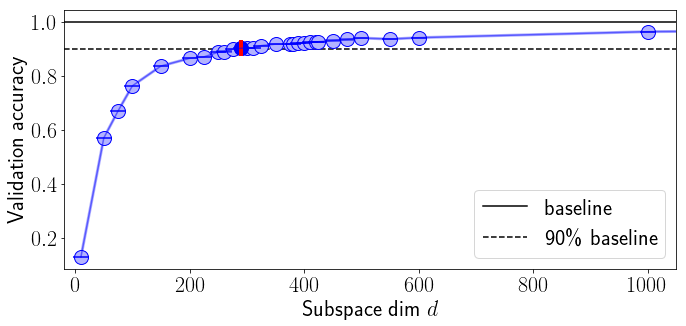

In [33]:
plot_perf_with_std(unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean,dim_solved_std, baseline=1.0, logx=False,xlim_v=[-20,1050], saveas='dim_mnist_lenet5_std')

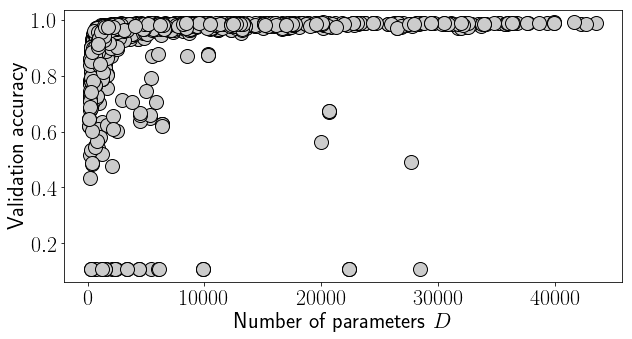

In [34]:
plot_perf_cmp(smallnets_mnist_lenet, False, 'mnist_small_direct_lenet_linear')

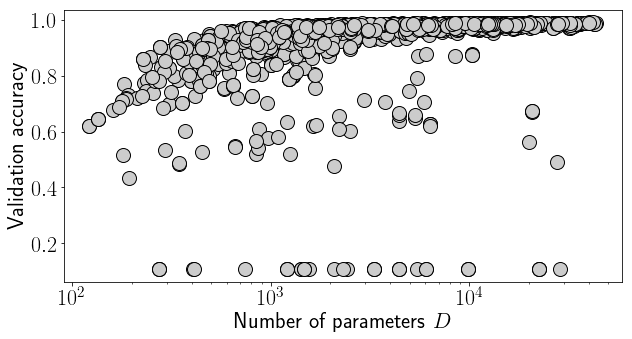

In [35]:
plot_perf_cmp(smallnets_mnist_lenet, True, 'mnist_small_direct_lenet_log')

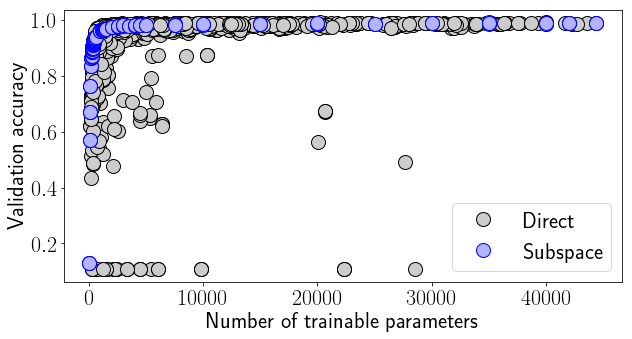

In [36]:
plot_perf_cmp_trainable(smallnets_mnist_lenet, subspace_mnist_lenet, False, 'mnist_cmp_lenet_linear')

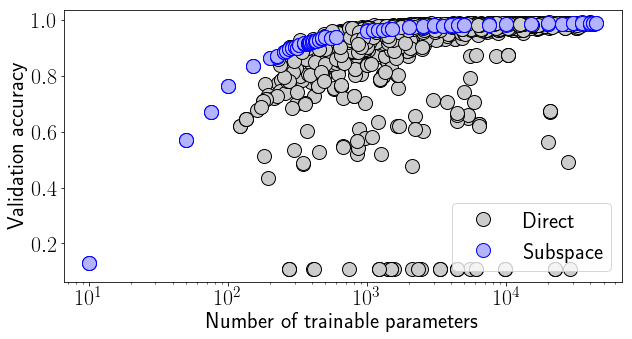

In [37]:
plot_perf_cmp_trainable(smallnets_mnist_lenet, subspace_mnist_lenet, True, 'mnist_cmp_lenet_log')

dir_perf: 1.0
d_int=290.0, acc=0.9012333333333333


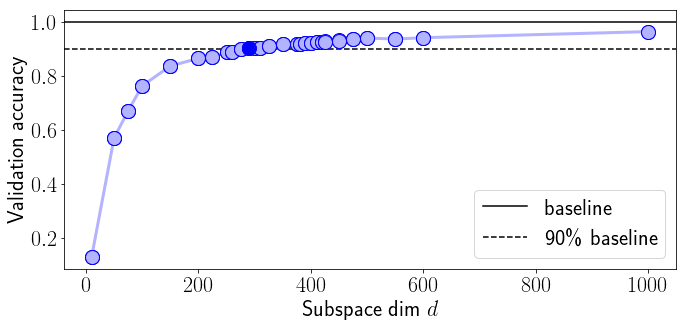

In [38]:
plot_perf_dim_90(data_mnist_lenet[:86], logx=False, saveas='mnist_lenet_dim_linear', d_Int=1.0)

dir_perf: 1.0
d_int=290.0, acc=0.9012333333333333


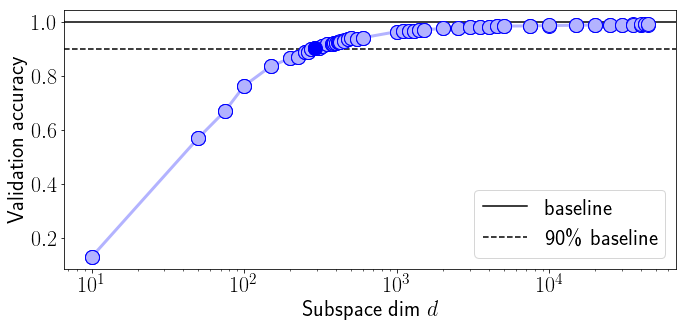

In [39]:
plot_perf_dim_90(data_mnist_lenet, logx=True, saveas='dim_mnist_lenet_log', d_Int=1.0)

dir_perf: 1.0
d_int=1400.0, acc=0.9024


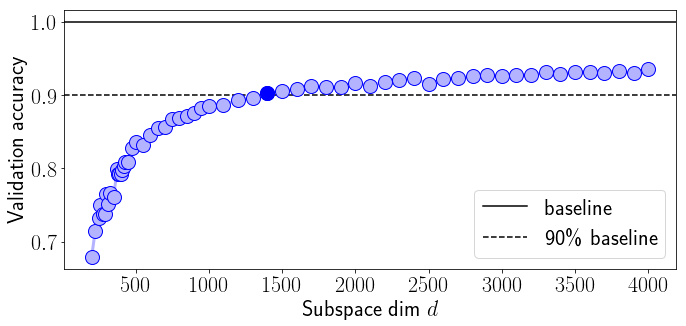

In [40]:
plot_perf_dim_90(data_pp_mnist_lenet, logx=False, saveas='dim_pp_mnist_lenet', d_Int=1.0)

### CIFAR MLP

Result directories like ```tiny_cifar_mlp_dir/171024_235023_3e19a7a_lrb_tiny_cifar_mlp_dir_0001/```

Collect using

```
for dir in 17*; do echo -n "[`cat $dir/diary | grep 'final_stats total_params' | gk 4`, `cat $dir/diary | grep 'final_stats val_accuracy' | gk 4`],"; done
```

In [41]:
smallnets_cifar_mlp = array([
    [6194, 0.2187],[31170, 0.4199],[6200, 0.1979],[6200, 0.1931],[15455, 0.3694],[15455, 0.3693],[24674, 0.3994],[31060, 0.4137],[31280, 0.4187],[62510, 0.4395],[6188, 0.2637],[15545, 0.35],[9271, 0.3218],[31280, 0.4064],[6176, 0.2606],[31060, 0.414],[6188, 0.2674],[6176, 0.2603],[24962, 0.3993],[31280, 0.4078],[24746, 0.3964],[31060, 0.415],[9283, 0.3004],[46495, 0.4466],[24890, 0.3909],[24890, 0.3961],[24818, 0.4031],[77735, 0.4553],[46255, 0.4323],[15545, 0.3605],[24890, 0.386],[31170, 0.4153],[31280, 0.42],[9295, 0.3007],[24962, 0.3927],[15545, 0.3584],[15545, 0.3438],[15455, 0.3691],[31170, 0.4209],[79035, 0.4501],[31280, 0.4085],[47215, 0.4293],[24674, 0.4007],[79035, 0.4496],[9271, 0.3237],[9283, 0.2988],[9283, 0.2793],[46255, 0.4292],[6176, 0.2601],[78385, 0.4546],[9283, 0.3088],[30950, 0.4269],[61670, 0.4356],[62930, 0.4568],[9259, 0.3199],[24818, 0.4022],[6194, 0.2223],[31280, 0.4065],[24746, 0.3945],[24746, 0.3974],[6200, 0.1972],[77735, 0.4539],[24962, 0.383],[9259, 0.3199],[6182, 0.2627],[24818, 0.4024],[31060, 0.4112],[9283, 0.2794],[31280, 0.4151],[62930, 0.4547],[62930, 0.4513],[79035, 0.4579],[9283, 0.3002],[78385, 0.456],[9307, 0.2911],[31170, 0.4151],[31060, 0.4058],[77735, 0.4584],[30840, 0.4144],[62090, 0.4452],[62930, 0.4536],[9283, 0.2983],[31060, 0.4095],[79685, 0.4577],[79685, 0.4512],[9307, 0.3081],[24818, 0.4058],[15455, 0.3695],[9307, 0.3197],[15425, 0.3631],[62090, 0.4463],[6200, 0.1924],[6176, 0.2607],[15545, 0.3618],[24674, 0.3994],[24962, 0.3964],[46255, 0.4296],[15425, 0.3615],[31170, 0.4168],[31060, 0.4043],[24674, 0.4054],[30840, 0.4124],[63350, 0.4474],[47215, 0.4288],[6200, 0.2056],[9259, 0.3202],[79035, 0.4554],[31170, 0.4166],[30840, 0.4126],[15485, 0.3607],[62090, 0.4537],[63350, 0.4433],[31060, 0.413],[6176, 0.26],[6188, 0.221],[24818, 0.4017],[78385, 0.455],[9283, 0.3004],[9283, 0.3002],[6176, 0.2606],[9283, 0.2992],[77085, 0.4497],[15425, 0.3618],[30840, 0.4127],[6182, 0.2609],[15455, 0.3682],[15455, 0.3701],[46975, 0.4397],[6182, 0.2631],[30950, 0.4219],[15485, 0.3624],[24746, 0.3953],[47215, 0.4376],[15515, 0.3547],[30950, 0.4199],[24746, 0.3944],[6200, 0.1915],[6182, 0.2611],[24818, 0.4026],[15455, 0.3699],[15515, 0.3593],[15515, 0.3388],[47215, 0.4348],[31170, 0.4144],[46495, 0.4399],[31060, 0.4096],[15485, 0.3573],[46255, 0.4253],[6182, 0.2622],[15425, 0.3607],[79035, 0.4475],[77085, 0.4448],[6188, 0.2602],[31280, 0.4125],[31280, 0.4111],[9259, 0.3193],[9271, 0.324],[46975, 0.4345],[46255, 0.4259],[61670, 0.4333],[15545, 0.3525],[6200, 0.1977],[24746, 0.3965],[77735, 0.4633],[46255, 0.4348],[61670, 0.4416],[9283, 0.2986],[6182, 0.261],[6176, 0.2604],[24890, 0.3912],[6194, 0.2592],[15545, 0.3433],[15545, 0.3469],[31060, 0.4066],[9295, 0.3003],[9307, 0.32],[30840, 0.4127],[6188, 0.2579],[9271, 0.3232],[61670, 0.4348],[46495, 0.4403],[24962, 0.3947],[15545, 0.3556],[79035, 0.4552],[46255, 0.4258],[46735, 0.4396],[47215, 0.4258],[62510, 0.4541],[24962, 0.3894],[46735, 0.4297],[30840, 0.4144],[31170, 0.416],[15425, 0.3612],[77085, 0.4449],[6200, 0.2041],[46255, 0.4259],[30840, 0.4113],[9307, 0.3115],[31280, 0.4229],[77085, 0.4475],[6176, 0.2602],[63350, 0.4401],[31280, 0.4094],[31280, 0.4168],[46735, 0.4337],[30950, 0.4253],[9295, 0.3077],[78385, 0.455],[15515, 0.3613],[46495, 0.4389],[15425, 0.3631],[30840, 0.4149],[24674, 0.3995],[6182, 0.2601],[47215, 0.4317],[46495, 0.4404],[9295, 0.307],[61670, 0.4452],[46975, 0.4404],[24962, 0.3923],[24890, 0.3808],[24746, 0.3966],[61670, 0.4409],[46495, 0.4392],[77735, 0.4566],[15485, 0.3578],[30950, 0.424],[24962, 0.3864],[77735, 0.457],[46255, 0.4271],[77085, 0.4491],[24890, 0.4029],[9295, 0.3087],[6182, 0.262],[77085, 0.4435],[79035, 0.454],[46495, 0.4361],[79685, 0.451],[31280, 0.4117],[24962, 0.383],[6200, 0.1926],[30840, 0.4131],[61670, 0.4407],[63350, 0.44],[62510, 0.4448],[46495, 0.4446],[9283, 0.3001],[24890, 0.3983],[9259, 0.3197],[46495, 0.4376],[47215, 0.4317],[78385, 0.4572],[77735, 0.4569],[6176, 0.2603],[9271, 0.3216],[46975, 0.4352],[24890, 0.3932],[9307, 0.3212],[6188, 0.2558],[9295, 0.3067],[30950, 0.4193],[15455, 0.3715],[30950, 0.4199],[63350, 0.4459],[46255, 0.4258],[24962, 0.3926],[15455, 0.3722],[79035, 0.4531],[62510, 0.4461],[24674, 0.4051],[46735, 0.4396],[46495, 0.4379],[15515, 0.3347],[77085, 0.4479],[63350, 0.4435],[9259, 0.3207],[61670, 0.4336],[31060, 0.4134],[62930, 0.4523],[15425, 0.3616],[9259, 0.3199],[61670, 0.4395],[6188, 0.2206],[15515, 0.3583],[77735, 0.4563],[31280, 0.4158],[31280, 0.4085],[9259, 0.3193],[79035, 0.453],[9271, 0.3228],[24818, 0.3969],[46255, 0.4289],[9283, 0.2801],[6188, 0.234],[46735, 0.4354],[61670, 0.4376],[6194, 0.2146],[9283, 0.2993],[46975, 0.437],[24674, 0.4059],[62510, 0.4556],[31280, 0.4149],[9307, 0.29],[30950, 0.4195],[78385, 0.462],[9295, 0.3075],[31280, 0.4131],[62930, 0.4491],[6176, 0.2603],[30950, 0.4165],[24890, 0.3953],[30950, 0.4268],[77085, 0.4463],[24890, 0.3979],[24818, 0.4056],[6200, 0.1994],[47215, 0.4257],[24818, 0.4041],[9307, 0.319],[24746, 0.3941],[77735, 0.4591],[15455, 0.3686],[9283, 0.2988],[31280, 0.4139],[6200, 0.196],[15515, 0.3585],[6194, 0.213],[61670, 0.4403],[15455, 0.3695],[6194, 0.2174],[79685, 0.4574],[62930, 0.4484],[24890, 0.3954],[9259, 0.3199],[9259, 0.3203],[30950, 0.4202],[31280, 0.4196],[78385, 0.4534],[9295, 0.3007],[9271, 0.3235],[24746, 0.3928],[31060, 0.409],[62510, 0.4466],[6194, 0.2164],[9307, 0.3188],[63350, 0.4408],[31060, 0.4064],[78385, 0.4542],[15515, 0.3387],[15485, 0.3634],[30840, 0.4124],[6194, 0.2175],[9283, 0.2775],[46735, 0.438],[31170, 0.4133],[62090, 0.4473],[62090, 0.4472],[77735, 0.456],[6194, 0.2144],[30840, 0.4118],[15545, 0.3485],[15485, 0.36],[24746, 0.3957],[47215, 0.4272],[24890, 0.3788],[9307, 0.3217],[9283, 0.2998],[62510, 0.4493],[63350, 0.4449],[6188, 0.2195],[15425, 0.3621],[15425, 0.3619],[24674, 0.4],[24818, 0.4014],[78385, 0.4606],[62930, 0.4546],[9259, 0.3209],[62510, 0.457],[30950, 0.4198],[46735, 0.4347],[62090, 0.4441],[6176, 0.2601],[24674, 0.4064],[46255, 0.4257],[6182, 0.2631],[15545, 0.3634],[9307, 0.3086],[46495, 0.4393],[24674, 0.4008],[24746, 0.3926],[30840, 0.4129],[9283, 0.3],[31280, 0.4198],[31060, 0.4093],[62090, 0.4401],[31060, 0.412],[9307, 0.3113],[77085, 0.448],[46735, 0.4383],[15485, 0.3583],[30950, 0.4186],[62090, 0.4501],[62510, 0.4398],[79685, 0.4509],[15545, 0.3488],[62510, 0.4538],[30950, 0.4196],[30840, 0.4155],[24890, 0.3944],[31280, 0.4158],[30950, 0.4171],[24674, 0.4047],[77085, 0.4452],[6188, 0.2607],[6200, 0.1939],[6182, 0.2604],[63350, 0.4513],[9259, 0.3203],[6176, 0.2603],[24674, 0.4073],[79035, 0.4489],[46255, 0.4318],[79685, 0.4498],[31060, 0.411],[9283, 0.2976],[63350, 0.4465],[9295, 0.3066],[6182, 0.2602],[6182, 0.2595],[31280, 0.4041],[6200, 0.194],[46255, 0.428],[9271, 0.3211],[31060, 0.4085],[9259, 0.3203],[77085, 0.4439],[6188, 0.2616],[46255, 0.4288],[15425, 0.3618],[6188, 0.2554],[24818, 0.4036],[46495, 0.4454],[30840, 0.4122],[24818, 0.4024],[24674, 0.3999],[6188, 0.2305],[78385, 0.4536],[15545, 0.3472],[77085, 0.4466],[30840, 0.4137],[24890, 0.3938],[15485, 0.3578],[9295, 0.3083],[24674, 0.407],[47215, 0.4339],[47215, 0.4407],[62090, 0.448],[30950, 0.4174],[15425, 0.3619],[15425, 0.361],[9295, 0.3089],[15455, 0.3703],[46495, 0.441],[24890, 0.3989],[9271, 0.3214],[15515, 0.3395],[15485, 0.36],[46975, 0.4517],[46255, 0.4247],[9307, 0.2942],[79685, 0.4434],[6188, 0.2558],[6188, 0.2663],[9283, 0.3009],[15455, 0.3714],[63350, 0.4464],[77085, 0.4463],[15485, 0.3632],[46975, 0.4397],[30840, 0.4128],[6176, 0.2603],[6176, 0.2601],[9271, 0.3249],[6176, 0.2601],[6176, 0.2601],[77735, 0.4504],[62510, 0.4397],[24890, 0.4009],[15425, 0.3616],[9295, 0.3105],[6176, 0.2598],[15515, 0.3586],[24746, 0.393],[24746, 0.3968],[78385, 0.4489],[31170, 0.423],[9271, 0.3236],[46735, 0.4338],[61670, 0.4407],[46255, 0.4268],[6188, 0.2652],[6200, 0.1943],[31280, 0.4173],[79035, 0.4468],[77085, 0.4481],[15545, 0.353],[6176, 0.2603],[79685, 0.453],[15455, 0.3689],[31280, 0.4123],[30950, 0.4242],[31060, 0.4072],[24962, 0.3838],[15485, 0.3636],[77735, 0.4575],[63350, 0.4439],[15425, 0.3624],[15455, 0.3693],[15485, 0.3696],[24962, 0.3938],[77085, 0.4439],[62930, 0.4523],[6182, 0.2611],[46495, 0.4392],[24674, 0.3996],[6194, 0.2199],[62930, 0.4532],[15545, 0.3488],[47215, 0.4388],[9283, 0.3003],[30840, 0.4129],[24962, 0.3773],[30950, 0.4233],[78385, 0.4552],[24818, 0.3989],[15425, 0.3627],[62930, 0.452],[46735, 0.4365],[61670, 0.4382],[24746, 0.3937],[24818, 0.4034],[15485, 0.357],[30840, 0.4137],[9271, 0.3241],[9307, 0.3217],[31280, 0.4155],[15455, 0.371],[6176, 0.26],[6200, 0.1926],[62510, 0.4468],[47215, 0.4342],[62930, 0.4458],[31280, 0.4141],[62090, 0.4495],[6182, 0.2623],[6200, 0.199],[62090, 0.4549],[62930, 0.4542],[77085, 0.4456],[6194, 0.2088],[24962, 0.3859],[9259, 0.3198],[6200, 0.1956],[47215, 0.4286],[77085, 0.4465],[9271, 0.324],[78385, 0.4557],[15545, 0.3487],[78385, 0.4525],[15545, 0.3512],[6200, 0.1981],[78385, 0.449],[6176, 0.2601],[78385, 0.4484],[77085, 0.4442],[9307, 0.2951],[46735, 0.4338],[62510, 0.4462],[6182, 0.2603],[79685, 0.4495],[78385, 0.4567],[61670, 0.4407],[9295, 0.3029],[24674, 0.4065],[24674, 0.3993],[63350, 0.445],[9259, 0.3208],[63350, 0.4392],[9259, 0.3202],[15455, 0.3725],[77735, 0.4515],[15455, 0.3696],[63350, 0.4391],[6188, 0.26],[15455, 0.3701],[79685, 0.4572],[9307, 0.3092],[46255, 0.4261],[24962, 0.3925],[31280, 0.4122],[9271, 0.32],[79035, 0.4565],[6200, 0.193],[30840, 0.4132],[31060, 0.4087],[78385, 0.4527],[6200, 0.197],[62930, 0.4557],[62510, 0.4533],[9295, 0.2987],[9271, 0.3208],[79035, 0.4495],[6194, 0.2109],[46975, 0.4432],[31170, 0.4217],[31170, 0.4173],[15485, 0.3622],[6182, 0.2593],[6182, 0.2601],[6182, 0.2598],[9271, 0.3244],[9307, 0.322],[6194, 0.216],[62510, 0.4405],[6188, 0.2636],[46255, 0.4368],[24746, 0.3951],[9259, 0.3199],[9307, 0.3205],[46255, 0.4332],[31060, 0.4111],[77085, 0.4473],[79685, 0.4595],[31060, 0.4075],[30950, 0.4195],[15515, 0.3394],[9259, 0.3202],[6194, 0.2171],[9283, 0.2999],[24746, 0.396],[46735, 0.4396],[15455, 0.3682],[78385, 0.4557],[6176, 0.2611],[79685, 0.4547],[6200, 0.1946],[62930, 0.4613],[24746, 0.3969],[9307, 0.319],[15515, 0.3622],[79685, 0.4528],[62510, 0.4537],[77085, 0.4435],[6176, 0.2601],[30950, 0.4209],[62510, 0.449],[79685, 0.4611],[30950, 0.4172],[15455, 0.3719],[63350, 0.4427],[61670, 0.4434],[9259, 0.3199],[31280, 0.4112],[9295, 0.3107],[24962, 0.3894],[6200, 0.1945],[61670, 0.4449],[77085, 0.4471],[6194, 0.2241],[15545, 0.358],[79035, 0.4543],[46495, 0.4384],[15515, 0.3572],[6182, 0.27],[46255, 0.4243],[79035, 0.4585],[46975, 0.4369],[15545, 0.3572],[77735, 0.4501],[15455, 0.3703],[9283, 0.2984],[46255, 0.4296],[9295, 0.3002],[61670, 0.439],[77735, 0.4555],[31060, 0.4107],[24890, 0.3897],[15485, 0.3654],[46735, 0.441],[15485, 0.3585],[24746, 0.396],[46495, 0.4372],[31170, 0.4199],[9283, 0.2976],[6200, 0.1958],[9295, 0.3096],[24674, 0.4044],[77735, 0.4521],[62930, 0.4622],[6188, 0.2673],[46975, 0.4413],[46975, 0.4465],[24746, 0.3944],[31060, 0.4086],[30840, 0.4119],[15425, 0.3628],[77085, 0.4451],[46255, 0.4267],[77735, 0.4577],[77085, 0.4459],[24890, 0.4012],[61670, 0.4388],[63350, 0.4449],[79685, 0.451],[24962, 0.3934],[46975, 0.4442],[30950, 0.4199],[31170, 0.4215],[47215, 0.4349],[15485, 0.3608],[61670, 0.4424],[62510, 0.4544],[61670, 0.4436],[63350, 0.4568],[46735, 0.4355],[62510, 0.4462],[46255, 0.4245],[46255, 0.4288],[77085, 0.4515],[15485, 0.3585],[62930, 0.4512],[9295, 0.2983],[62930, 0.4519],[24818, 0.3992],[47215, 0.4393],[61670, 0.4362],[9271, 0.3233],[30950, 0.4199],[6182, 0.2625],[77085, 0.4439],[9271, 0.3242],[46495, 0.4366],[63350, 0.4423],[24818, 0.4033],[79685, 0.4544],[6182, 0.2607],[62090, 0.4467],[47215, 0.4313],[30950, 0.42],[31170, 0.4234],[77735, 0.4573],[79035, 0.4544],[77085, 0.4442],[9271, 0.3232],[78385, 0.4527],[77085, 0.4433],[24962, 0.3872],[46255, 0.4285],[78385, 0.4614],[62510, 0.4522],[30840, 0.4124],[24962, 0.3844],[77735, 0.4572],[30840, 0.4141],[15485, 0.3584],[24746, 0.3953],[30840, 0.4127],[46495, 0.4355],[6176, 0.2607],[9283, 0.2784],[31060, 0.4068],[30840, 0.4148],[30950, 0.4198],[79035, 0.4566],[79035, 0.4606],[6200, 0.1986],[9271, 0.3229],[79685, 0.4516],[24890, 0.3893],[9283, 0.3014],[24962, 0.3931],[24890, 0.3923],[47215, 0.4439],[9259, 0.3199],[31060, 0.4105],[15515, 0.357],[24674, 0.3995],[46735, 0.4336],[15515, 0.3587],[6200, 0.192],[31280, 0.4166],[46495, 0.4449],[46735, 0.4332],[9259, 0.3201],[46495, 0.4403],[63350, 0.446],[15485, 0.3633],[77085, 0.4453],[78385, 0.4567],[62510, 0.4482],[46735, 0.4306],[9283, 0.2994],[9271, 0.3218],[9259, 0.3199],[62090, 0.4488],[46735, 0.4413],[15455, 0.3723],[77085, 0.4477],[15455, 0.3699],[78385, 0.4535],[15485, 0.3575],[79685, 0.4519],[6176, 0.2606],[24746, 0.3928],[78385, 0.4556],[6182, 0.2609],[9283, 0.2976],[9259, 0.3202],[6200, 0.1912],[31060, 0.4125],[9271, 0.3234],[9307, 0.3193],[46975, 0.4301],[62090, 0.4497],[15545, 0.3544],[63350, 0.4443],[30840, 0.413],[79685, 0.4592],[31060, 0.4089],[31170, 0.4198],[79035, 0.4516],[79685, 0.449],[61670, 0.4381],[77085, 0.4466],[6176, 0.2607],[62930, 0.4491],[6182, 0.2631],[79035, 0.4586],[30840, 0.4132],[6176, 0.261],[9283, 0.3003],[31280, 0.4156],[31060, 0.4089],[46255, 0.4376],[46735, 0.4352],[24962, 0.3913],[24818, 0.4008],[15425, 0.3615],[6182, 0.2612],[46495, 0.4456],[46495, 0.4437],[9271, 0.3231],[15425, 0.3619],[31170, 0.4162],[62510, 0.4492],[9307, 0.292],[62510, 0.4525],[30950, 0.419],[47215, 0.4386],[9295, 0.3016],[6182, 0.2594],[47215, 0.4292],[15455, 0.3703],[24746, 0.3965],[79035, 0.4515],[46495, 0.4373],[6200, 0.2001],[15455, 0.3711],[46495, 0.4381],[63350, 0.4423],[6182, 0.2594],[6194, 0.2137],[62510, 0.4382],[9271, 0.3239],[24746, 0.3957],[77735, 0.4579],[46975, 0.4316],[9295, 0.3098],[9307, 0.3133],[9295, 0.3089],[24962, 0.3889],[61670, 0.4392],[24962, 0.3878],[30950, 0.4264],[15515, 0.3549],[79685, 0.4452],[46255, 0.4272],[77085, 0.4464],[30840, 0.412],[24890, 0.4002],[24890, 0.3919],[79685, 0.4531],[62930, 0.4525],[63350, 0.4438],[9283, 0.2795],[6182, 0.2599],[9283, 0.2624],[78385, 0.4512],[46975, 0.441],[6194, 0.2136],[77085, 0.4455],[31060, 0.412],[24818, 0.3976],[30840, 0.4145],[46975, 0.4356],[46975, 0.4387],[31060, 0.4116],[77735, 0.4556],[15515, 0.3618],[77085, 0.4478],[24746, 0.3924],[9259, 0.3201],[79035, 0.4547],[9259, 0.32],[46255, 0.4269],[30840, 0.4144],[62930, 0.4489],[24674, 0.3994],[6182, 0.2621],[46735, 0.4324],[15485, 0.3568],[46735, 0.4428],[79685, 0.457],[9259, 0.3203],[9283, 0.2993],[79035, 0.4608],[77085, 0.4474],[15545, 0.3613],[77735, 0.4544],[79035, 0.4472],[24818, 0.4035],[77735, 0.4533],[46495, 0.4433],[46975, 0.4325],[62510, 0.4567],[15515, 0.3589],[79035, 0.4551],[62510, 0.452],[9271, 0.3242],[15515, 0.3607],[46975, 0.4418],[15455, 0.369],[24962, 0.3847],[77085, 0.4504],[6176, 0.2606],[9259, 0.3202],[15455, 0.3715],[62510, 0.4494],[31280, 0.4096],[31060, 0.4053],[46255, 0.4242],[79035, 0.4593],[30950, 0.4166],[30950, 0.4253],[6188, 0.2618],[77085, 0.4439],[15425, 0.362],[77735, 0.4598],[9259, 0.3199],[78385, 0.449],[9283, 0.3102],[79685, 0.4526],[15425, 0.3602],[24674, 0.4064],[24890, 0.4053],[9271, 0.3238],[24674, 0.4045],[79035, 0.4626],[9271, 0.3222],[46255, 0.4286],[30950, 0.4202],[15485, 0.368],[9271, 0.325],[31060, 0.4123],[9271, 0.3239],[6176, 0.2607],[31170, 0.424],[30950, 0.4236],[6194, 0.2224],[15485, 0.3582],[77085, 0.4478],[6194, 0.2547],[31060, 0.4081],[24962, 0.3887],[24890, 0.3914],[46975, 0.4415],[6194, 0.2161],[9295, 0.3084],[77085, 0.4506],[47215, 0.4336],[9307, 0.3207],[30840, 0.4116],[31170, 0.4212],[15515, 0.3557],[62930, 0.4523],[6176, 0.2602],[15425, 0.3615],[9271, 0.3206],[24818, 0.3957],[15425, 0.3643],[61670, 0.445],[15515, 0.339],[6176, 0.2603],[24890, 0.3907],[15485, 0.359],[77735, 0.4506],[15545, 0.3472],[46495, 0.4315],[6188, 0.2171],
])

In [42]:
cifar_direct_mlp_w23 = array([
    [0, 0.5061],[0, 0.5085],[0, 0.5061],[0, 0.5136],[0, 0.5124],[0, 0.5086]
])

cifar_subspace_mlp_w23 = array([
    [1000, 0.3485],[1000, 0.3418],[1000, 0.3424],[1000, 0.3482],[1000, 0.3413],[1000, 0.3485],[2000, 0.3926],[2000, 0.3939],[2000, 0.3936],[2000, 0.3921],[2000, 0.3931],[2000, 0.3922],[3000, 0.4122],[3000, 0.4072],[3000, 0.4074],[3000, 0.4122],[3000, 0.4071],[3000, 0.4125],[4000, 0.4272],[4000, 0.4264],[4000, 0.4259],[4000, 0.4267],[4000, 0.4243],[4000, 0.427],[5000, 0.4319],[5000, 0.4325],[5000, 0.4369],[5000, 0.4383],[5000, 0.4313],[5000, 0.438],[5250, 0.4356],[5250, 0.4354],[5250, 0.4335],[5250, 0.4406],[5250, 0.4411],[5250, 0.4387],[5500, 0.4393],[5500, 0.4395],[5500, 0.4394],[5500, 0.438],[5500, 0.4361],[5500, 0.4402],[5750, 0.4433],[5750, 0.4396],[5750, 0.4433],[5750, 0.4398],[5750, 0.4396],[5750, 0.4437],[6000, 0.4423],[6000, 0.4391],[6000, 0.4428],[6000, 0.4422],[6000, 0.4454],[6000, 0.4421],[6250, 0.4463],[6250, 0.4458],[6250, 0.4482],[6250, 0.4435],[6250, 0.4432],[6250, 0.4463],[6500, 0.4447],[6500, 0.4433],[6500, 0.4523],[6500, 0.4502],[6500, 0.4427],[6500, 0.4497],[6750, 0.4473],[6750, 0.45],[6750, 0.444],[6750, 0.4505],[6750, 0.4509],[6750, 0.4465],[7000, 0.4486],[7000, 0.4513],[7000, 0.4495],[7000, 0.449],[7000, 0.4533],[7000, 0.4532],[7250, 0.4494],[7250, 0.457],[7250, 0.4558],[7250, 0.4508],[7250, 0.4498],[7250, 0.4591],[7500, 0.4595],[7500, 0.4562],[7500, 0.4585],[7500, 0.4582],[7500, 0.457],[7500, 0.4551],[7750, 0.4579],[7750, 0.4555],[7750, 0.4561],[7750, 0.455],[7750, 0.4564],[7750, 0.4566],[8000, 0.4617],[8000, 0.4607],[8000, 0.462],[8000, 0.4601],[8000, 0.4595],[8000, 0.4597],[8500, 0.4581],[8500, 0.4586],[8500, 0.4573],[8500, 0.4589],[8500, 0.4571],[8500, 0.4566],[9000, 0.4581],[9000, 0.4605],[9000, 0.4645],[9000, 0.46],[9000, 0.4609],[9000, 0.4645],[10000, 0.4699],[10000, 0.4608],[10000, 0.4704],[10000, 0.4642],[10000, 0.461],[10000, 0.4679],[12500, 0.472],[12500, 0.473],[12500, 0.475],[12500, 0.4681],[12500, 0.468],[12500, 0.469],[15000, 0.4775],[15000, 0.4822],[15000, 0.474],[15000, 0.4712],[15000, 0.4838],[15000, 0.4825],[20000, 0.4816],[20000, 0.4847],[20000, 0.4797],[20000, 0.4807],[20000, 0.485],[20000, 0.4825],[30000, 0.4948],[30000, 0.4965],[30000, 0.4865],[30000, 0.4833],[30000, 0.4969],[30000, 0.4815],[40000, 0.4887],[40000, 0.4822],[40000, 0.489],[40000, 0.4757],[40000, 0.4885],[40000, 0.4779],[50000, 0.4886],[50000, 0.4768],[50000, 0.4761],[50000, 0.4838],[50000, 0.4912],[50000, 0.4876],[60000, 0.484],[60000, 0.4926],[60000, 0.4823],[60000, 0.4805],[60000, 0.4787],[60000, 0.4937],[70000, 0.4811],[70000, 0.486],[70000, 0.4884],[70000, 0.4849],[70000, 0.4891],[70000, 0.4897],[79685, 0.4823],[79685, 0.4856],[79685, 0.4879],[79685, 0.4786],[79685, 0.4875],[79685, 0.4801]
])
data_cifar_subspace_mlp_w23 =  vstack((cifar_direct_mlp_w23,cifar_subspace_mlp_w23))


cifar_subspace_mlp_L2_high_d = array([
    [250, 0.2299],[500, 0.2932],[750, 0.3211],[1000, 0.3519],[1250, 0.3587],[1500, 0.3759],[1750, 0.3851],[1900, 0.3835],[1950, 0.3904],[2000, 0.3935],[2050, 0.3993],[2100, 0.3981],[2250, 0.3985],[2500, 0.3984],[3000, 0.4125],[4000, 0.4305],[5000, 0.4399],[5250, 0.438],[5500, 0.4463],[5750, 0.4452],[6000, 0.4478],[6250, 0.4467],[6500, 0.4528],[6750, 0.4534],[7000, 0.4607],[7250, 0.4586],[7500, 0.4537],[7750, 0.4596],[8000, 0.46],[8250, 0.4622],[8500, 0.4595],[8750, 0.4662],[9000, 0.4646],[9250, 0.4618],[9500, 0.4688],[9750, 0.4687],[10000, 0.4677],[15000, 0.486],[20000, 0.4902],[25000, 0.4866],[30000, 0.4906],[35000, 0.4861],[40000, 0.4826],[45000, 0.4847],[50000, 0.4883]
])

cifar_subspace_mlp_low_d = array([
    [1000, 0.3453],[2000, 0.3857],[3000, 0.4142],[4000, 0.4288],[5000, 0.4447],[5250, 0.4338],[5500, 0.4506],[5750, 0.4464],[6000, 0.4545],[6250, 0.451],[6500, 0.4563],[6750, 0.4535],[7000, 0.4533],[7250, 0.4587],[7500, 0.467],[7750, 0.4673],[8000, 0.4641],[8500, 0.4611],[9000, 0.4652],[10000, 0.4638],[12500, 0.4787],[15000, 0.4797],[1000, 0.3577],[2000, 0.3884],[3000, 0.417],[4000, 0.4265],[5000, 0.4379],[5250, 0.4435],[5500, 0.4486],[5750, 0.4445],[6000, 0.4486],[6250, 0.445],[6500, 0.4512],[6750, 0.4521],[7000, 0.4538],[7250, 0.4539],[7500, 0.4554],[7750, 0.4551],[8000, 0.4574],[8500, 0.4594],[9000, 0.4633],[10000, 0.4652],[12500, 0.4682],[15000, 0.4757],[1000, 0.3438],[2000, 0.4016],[3000, 0.4156],[4000, 0.423],[5000, 0.4396],[5250, 0.4413],[5500, 0.45],[5750, 0.4433],[6000, 0.4419],[6250, 0.4451],[6500, 0.4437],[6750, 0.445],[7000, 0.4531],[7250, 0.4487],[7500, 0.4547],[7750, 0.4482],[8000, 0.461],[8500, 0.4589],[9000, 0.4511],[10000, 0.4567],[12500, 0.468],[15000, 0.4654],[1000, 0.3574],[2000, 0.3948],[3000, 0.4194],[4000, 0.4324],[5000, 0.4323],[5250, 0.4362],[5500, 0.4409],[5750, 0.4472],[6000, 0.4415],[6250, 0.4473],[6500, 0.4565],[6750, 0.4496],[7000, 0.4518],[7250, 0.4521],[7500, 0.4533],[7750, 0.4473],[8000, 0.4537],[8500, 0.4447],[9000, 0.4541],[10000, 0.4664],[12500, 0.4589],[15000, 0.4669],[1000, 0.362],[2000, 0.3944],[3000, 0.4127],[4000, 0.4357],[5000, 0.429],[5250, 0.4436],[5500, 0.4419],[5750, 0.4376],[6000, 0.4374],[6250, 0.4437],[6500, 0.4458],[6750, 0.4415],[7000, 0.4511],[7250, 0.4578],[7500, 0.4434],[7750, 0.446],[8000, 0.4603],[8500, 0.4559],[9000, 0.45],[10000, 0.4623],[12500, 0.4619],[15000, 0.4691],[1000, 0.3476],[2000, 0.3907],[3000, 0.4185],[4000, 0.4352],[5000, 0.4434],[5250, 0.4519],[5500, 0.4498],[5750, 0.4461],[6000, 0.4537],[6250, 0.4619],[6500, 0.4584],[6750, 0.4524],[7000, 0.4657],[7250, 0.463],[7500, 0.466],[7750, 0.4599],[8000, 0.4635],[8500, 0.4695],[9000, 0.4702],[10000, 0.4797],[12500, 0.4784],[15000, 0.4815],[1000, 0.3527],[2000, 0.3965],[3000, 0.4146],[4000, 0.4248],[5000, 0.4473],[5250, 0.449],[5500, 0.4531],[5750, 0.4436],[6000, 0.4556],[6250, 0.4524],[6500, 0.4562],[6750, 0.4562],[7000, 0.4505],[7250, 0.4582],[7500, 0.4615],[7750, 0.4537],[8000, 0.458],[8500, 0.4589],[9000, 0.4568],[10000, 0.4707],[12500, 0.468],[15000, 0.4795],[1000, 0.353],[2000, 0.398],[3000, 0.4202],[4000, 0.4299],[5000, 0.4375],[5250, 0.4411],[5500, 0.4455],[5750, 0.4412],[6000, 0.4505],[6250, 0.4496],[6500, 0.443],[6750, 0.4544],[7000, 0.4532],[7250, 0.453],[7500, 0.4592],[7750, 0.45],[8000, 0.463],[8500, 0.4644],[9000, 0.465],[10000, 0.4667],[12500, 0.47],[15000, 0.4679],[1000, 0.3548],[2000, 0.3957],[3000, 0.4222],[4000, 0.4294],[5000, 0.4413],[5250, 0.4469],[5500, 0.4393],[5750, 0.4451],[6000, 0.4453],[6250, 0.4517],[6500, 0.4503],[6750, 0.4544],[7000, 0.4484],[7250, 0.454],[7500, 0.4504],[7750, 0.4511],[8000, 0.4541],[8500, 0.4489],[9000, 0.4608],[10000, 0.453],[12500, 0.4632],[15000, 0.4613],[1000, 0.3504],[2000, 0.398],[3000, 0.4115],[4000, 0.4258],[5000, 0.4315],[5250, 0.4409],[5500, 0.4422],[5750, 0.4479],[6000, 0.4412],[6250, 0.4425],[6500, 0.4468],[6750, 0.4439],[7000, 0.4551],[7250, 0.4532],[7500, 0.4554],[7750, 0.452],[8000, 0.4496],[8500, 0.4518],[9000, 0.4532],[10000, 0.4576],[12500, 0.4629],[15000, 0.4558],[1000, 0.3525],[2000, 0.3955],[3000, 0.4152],[4000, 0.4344],[5000, 0.4422],[5250, 0.4475],[5500, 0.4468],[5750, 0.453],[6000, 0.4503],[6250, 0.4509],[6500, 0.4586],[6750, 0.4552],[7000, 0.463],[7250, 0.4561],[7500, 0.4663],[7750, 0.4675],[8000, 0.4569],[8500, 0.4651],[9000, 0.4639],[10000, 0.4676],[12500, 0.4752],[15000, 0.4865],[1000, 0.3546],[2000, 0.3997],[3000, 0.4176],[4000, 0.434],[5000, 0.4421],[5250, 0.4434],[5500, 0.4521],[5750, 0.4485],[6000, 0.4468],[6250, 0.4471],[6500, 0.4478],[6750, 0.4516],[7000, 0.459],[7250, 0.4491],[7500, 0.4607],[7750, 0.4637],[8000, 0.4552],[8500, 0.4559],[9000, 0.4684],[10000, 0.4615],[12500, 0.4719],[15000, 0.474],[1000, 0.3539],[2000, 0.3947],[3000, 0.4119],[4000, 0.4266],[5000, 0.4383],[5250, 0.4358],[5500, 0.4358],[5750, 0.4422],[6000, 0.4454],[6250, 0.4527],[6500, 0.4534],[6750, 0.4561],[7000, 0.448],[7250, 0.4548],[7500, 0.4533],[7750, 0.4496],[8000, 0.4488],[8500, 0.4612],[9000, 0.4605],[10000, 0.4641],[12500, 0.4709],[15000, 0.4636],[1000, 0.3626],[2000, 0.3958],[3000, 0.4144],[4000, 0.4273],[5000, 0.434],[5250, 0.4382],[5500, 0.4385],[5750, 0.444],[6000, 0.4373],[6250, 0.4463],[6500, 0.4519],[6750, 0.4487],[7000, 0.4413],[7250, 0.4539],[7500, 0.4494],[7750, 0.4519],[8000, 0.4574],[8500, 0.4508],[9000, 0.4588],[10000, 0.4549],[12500, 0.4591],[15000, 0.4693],[1000, 0.3584],[2000, 0.3914],[3000, 0.4143],[4000, 0.4226],[5000, 0.4316],[5250, 0.4419],[5500, 0.4355],[5750, 0.4342],[6000, 0.4367],[6250, 0.4439],[6500, 0.4504],[6750, 0.4515],[7000, 0.4527],[7250, 0.4499],[7500, 0.4557],[7750, 0.45],[8000, 0.4423],[8500, 0.449],[9000, 0.4617],[10000, 0.4625],[12500, 0.4618],[15000, 0.4624],[1000, 0.3549],[2000, 0.3945],[3000, 0.4114],[4000, 0.4365],[5000, 0.4442],[5250, 0.4425],[5500, 0.4447],[5750, 0.4446],[6000, 0.4487],[6250, 0.4595],[6500, 0.4556],[6750, 0.4632],[7000, 0.457],[7250, 0.4571],[7500, 0.4632],[7750, 0.4591],[8000, 0.4674],[8500, 0.4643],[9000, 0.4644],[10000, 0.4714],[12500, 0.4779],[15000, 0.4836],[1000, 0.3582],[2000, 0.3984],[3000, 0.408],[4000, 0.4284],[5000, 0.4351],[5250, 0.446],[5500, 0.4407],[5750, 0.4482],[6000, 0.4478],[6250, 0.4533],[6500, 0.4565],[6750, 0.4516],[7000, 0.4505],[7250, 0.4542],[7500, 0.4587],[7750, 0.4593],[8000, 0.4596],[8500, 0.457],[9000, 0.4632],[10000, 0.4639],[12500, 0.4719],[15000, 0.468],[1000, 0.3587],[2000, 0.3949],[3000, 0.4107],[4000, 0.4352],[5000, 0.4357],[5250, 0.443],[5500, 0.4386],[5750, 0.4423],[6000, 0.4421],[6250, 0.4469],[6500, 0.4517],[6750, 0.448],[7000, 0.4512],[7250, 0.452],[7500, 0.4525],[7750, 0.4507],[8000, 0.4501],[8500, 0.4553],[9000, 0.4582],[10000, 0.4583],[12500, 0.4652],[15000, 0.4691],[1000, 0.3532],[2000, 0.3861],[3000, 0.4069],[4000, 0.428],[5000, 0.44],[5250, 0.4375],[5500, 0.4423],[5750, 0.4365],[6000, 0.4479],[6250, 0.4438],[6500, 0.4435],[6750, 0.4442],[7000, 0.4439],[7250, 0.4503],[7500, 0.4468],[7750, 0.4538],[8000, 0.4508],[8500, 0.4493],[9000, 0.4486],[10000, 0.4525],[12500, 0.4682],[15000, 0.4633],[1000, 0.3617],[2000, 0.3894],[3000, 0.4126],[4000, 0.4241],[5000, 0.4263],[5250, 0.4375],[5500, 0.4409],[5750, 0.4386],[6000, 0.4423],[6250, 0.4381],[6500, 0.4385],[6750, 0.4411],[7000, 0.4422],[7250, 0.445],[7500, 0.4443],[7750, 0.4448],[8000, 0.4521],[8500, 0.4501],[9000, 0.4533],[10000, 0.4522],[12500, 0.4599],[15000, 0.4566]
])

cifar_subspace_mlp_all = vstack((cifar_subspace_mlp_w23,cifar_subspace_mlp_low_d,cifar_subspace_mlp_L2_high_d))
dat_cifar_mlp_all = vstack((data_cifar_subspace_mlp_w23,cifar_subspace_mlp_low_d,cifar_subspace_mlp_L2_high_d))


In [43]:
data_btsp = data_cifar_subspace_mlp_w23
print data_btsp.shape

unique_dim = sorted(list(set(data_btsp[:,0])))
print unique_dim

# bootstrap M samples
M = 100
acc_btrp=[]
for d in unique_dim:
    idx_ = np.where(data_btsp[:,0]==d)[0]
    rdm_seed = np.random.randint(6, size=M)
    acc_btrp.append( [ [d, data_btsp[ idx_[i], 1]] for i in rdm_seed  ])
acc_btrp = np.array(acc_btrp)    
print acc_btrp.shape

d_int_array, acc_int_array = np.ones(M), np.ones(M)
for m in range(M):
    d_int_, acc_int_ = compt_dim_int(acc_btrp[:,m,:])
    d_int_array[m], acc_int_array[m] = d_int_, acc_int_
    
print d_int_array

dim_solved_mean = np.mean(d_int_array)
dim_solved_std = np.std(d_int_array)
print "d_int: mean="+str(dim_solved_mean) + ", std=" +str( dim_solved_std) 

acc_solved_mean = np.mean(acc_int_array)
acc_solved_std = np.std(acc_int_array)
print "d_int: mean="+str(acc_solved_mean) + ", std=" +str( acc_solved_std) 

acc_mean = np.mean(acc_btrp[:,:,1], axis=1)
acc_std = np.std(acc_btrp[:,:,1], axis=1)

(180, 2)
[0.0, 1000.0, 2000.0, 3000.0, 4000.0, 5000.0, 5250.0, 5500.0, 5750.0, 6000.0, 6250.0, 6500.0, 6750.0, 7000.0, 7250.0, 7500.0, 7750.0, 8000.0, 8500.0, 9000.0, 10000.0, 12500.0, 15000.0, 20000.0, 30000.0, 40000.0, 50000.0, 60000.0, 70000.0, 79685.0]
(30, 100, 2)
[ 9000. 12500.  7500.  7250.  9000.  7250.  8000.  7750.  8000.  7500.
  7500.  7500. 12500.  8000.  7250.  8000.  7250.  8000.  7250.  7500.
 12500. 12500. 10000.  7250.  7250.  8000.  7250.  7500.  7750.  7500.
  7250.  7500.  8000.  9000.  7500.  9000.  7250. 10000. 10000.  7500.
  7500.  8000.  7250.  7500. 10000. 12500.  7500.  9000.  7750.  8000.
  7500.  7500.  7250.  9000.  7750.  7750.  8000.  7250.  8000.  7250.
  7250.  8000.  8000.  7250.  8000.  7250. 10000.  7500. 10000.  9000.
  7250.  7750.  7500.  7500.  8000.  7500. 10000. 10000.  9000.  7250.
 10000.  9000.  7500.  7500.  7250.  7250. 10000.  8000.  7250.  9000.
  7250.  7500.  7250. 12500.  8000.  7250. 10000.  8000.  9000.  7750.]
d_int: mean=8285.0,

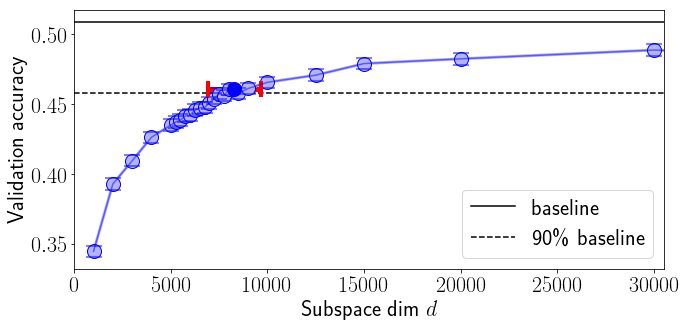

In [44]:
plot_perf_with_std(unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean, dim_solved_std, logx=False, xlim_v=[-20,30500], saveas='dim_cifar_fnn_w2_std_xlim')

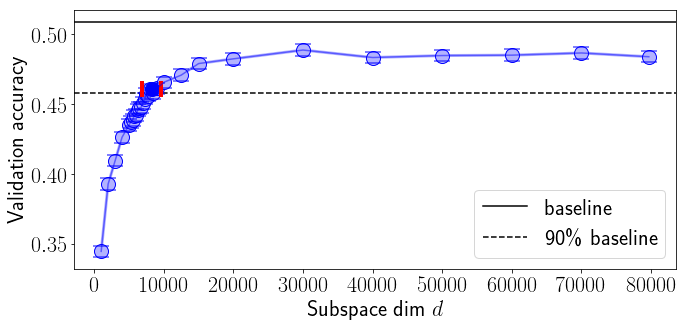

In [45]:
plot_perf_with_std(unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean, dim_solved_std, logx=False, saveas='dim_cifar_fnn_w2_std')

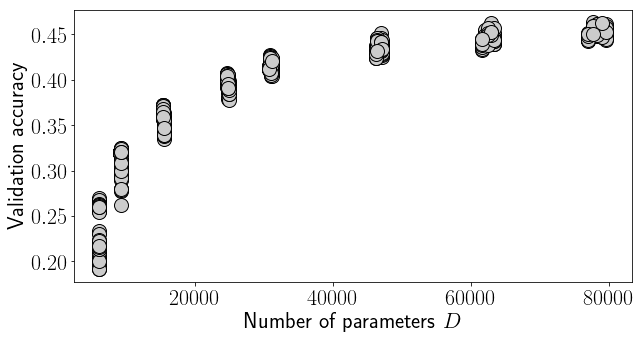

In [46]:
plot_perf_cmp(smallnets_cifar_mlp, False, 'cifar_small_direct_mlp_linear')

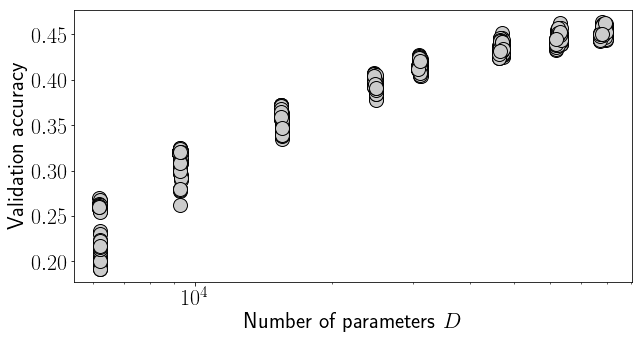

In [47]:
plot_perf_cmp(smallnets_cifar_mlp, True, 'cifar_small_direct_mlp_log')

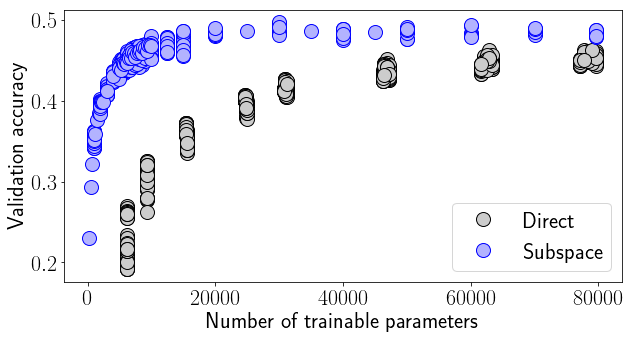

In [48]:
plot_perf_cmp_trainable(smallnets_cifar_mlp, cifar_subspace_mlp_all, False, 'cifar_cmp_mlp_linear')

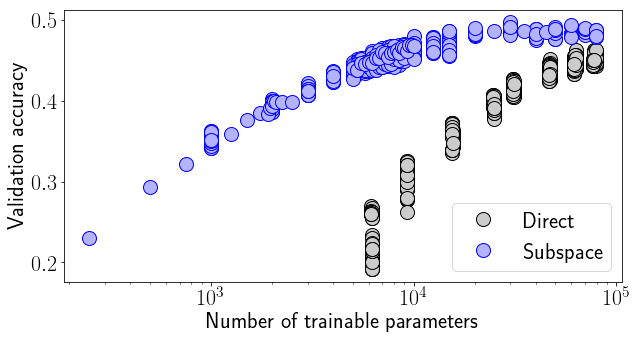

In [49]:
plot_perf_cmp_trainable(smallnets_cifar_mlp, cifar_subspace_mlp_all, True, 'cifar_cmp_mlp_log')

d_int=8000.0, acc=0.4606166666666667


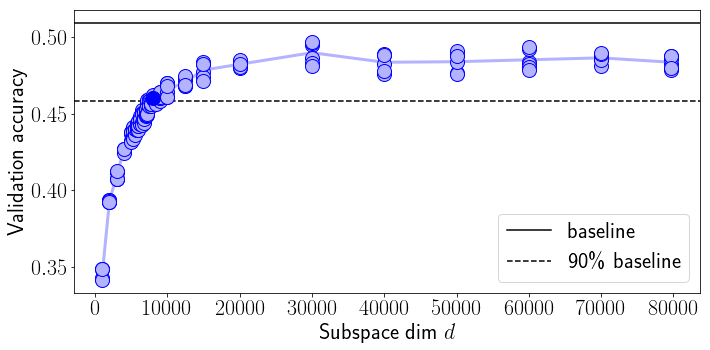

In [50]:
plot_perf_dim(data_cifar_subspace_mlp_w23, logx=False, saveas=None)

dir_perf: 0.5
d_int=7000.0, acc=0.45081666666666664


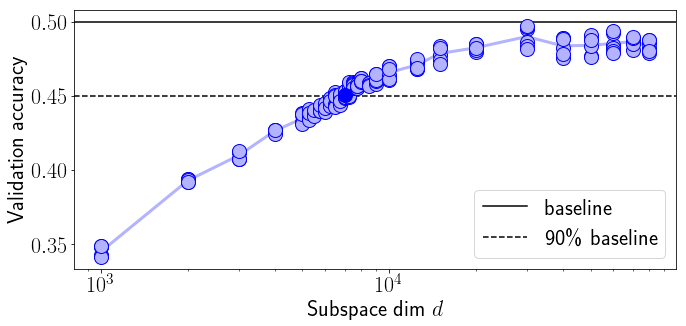

In [51]:
plot_perf_dim_90(data_cifar_subspace_mlp_w23, logx=True, saveas=None, d_Int=0.50)

dir_perf: 0.5092166666666667
d_int=8250.0, acc=0.4622


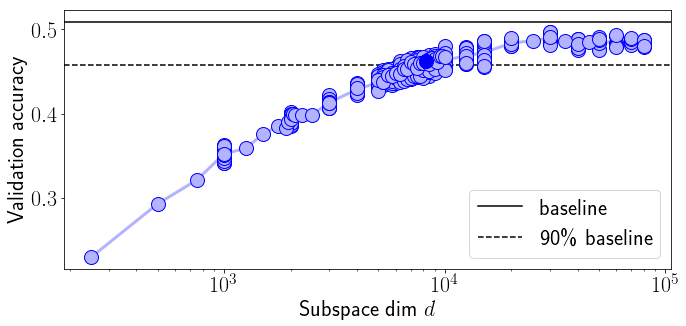

In [52]:
plot_perf_dim_90(dat_cifar_mlp_all, logx=True, saveas=None)

### CIFAR LeNet

Result directories like ```tiny_cifar_lenet_dir/171024_234006_3e19a7a_lrb_tiny_cifar_lenet_dir_0701/```


In [53]:
smallnets_cifar_lenet = array([
    [4733, 0.5558],[6026, 0.5102],[423, 0.3208],[1850, 0.3935],[532, 0.3429],[24078, 0.5518],[13368, 0.5514],[4696, 0.6084],[1620, 0.4368],[3996, 0.5969],[15204, 0.5924],[12965, 0.4373],[5754, 0.1],[8584, 0.1],[1333, 0.3262],[1030, 0.3488],[10135, 0.5199],[1134, 0.4187],[304, 0.266],[2961, 0.481],[290, 0.2976],[7986, 0.324],[1138, 0.4069],[49015, 0.4101],[5879, 0.6112],[5460, 0.3358],[5261, 0.547],[50705, 0.5119],[2283, 0.3819],[5051, 0.4822],[9004, 0.4897],[913, 0.2388],[1851, 0.4159],[60102, 0.5122],[1313, 0.4011],[4542, 0.3796],[3247, 0.3232],[1615, 0.4485],[11047, 0.5577],[5627, 0.4891],[2098, 0.4865],[330, 0.303],[19388, 0.5668],[11349, 0.5629],[1369, 0.2299],[2125, 0.4828],[887, 0.1],[2475, 0.5258],[3253, 0.434],[2427, 0.5269],[2079, 0.4584],[496, 0.3001],[27631, 0.1],[44250, 0.5591],[959, 0.3627],[3079, 0.5576],[1236, 0.4684],[33793, 0.1],[3204, 0.5866],[1881, 0.4331],[5852, 0.3945],[2346, 0.4792],[6705, 0.4698],[15840, 0.4696],[405, 0.2995],[3203, 0.5046],[5628, 0.559],[6927, 0.509],[3670, 0.4595],[683, 0.3858],[1484, 0.3108],[2267, 0.4723],[9546, 0.3488],[1366, 0.3105],[1420, 0.3647],[1255, 0.389],[864, 0.384],[737, 0.3372],[24666, 0.4678],[7942, 0.6212],[2937, 0.1],[727, 0.3517],[41796, 0.4909],[7242, 0.5662],[1539, 0.3749],[10964, 0.5276],[29960, 0.6104],[3053, 0.5311],[991, 0.4153],[1311, 0.3843],[5850, 0.4709],[5272, 0.5682],[1934, 0.4163],[9567, 0.5123],[1793, 0.3774],[6946, 0.4674],[2119, 0.5012],[2871, 0.3758],[418, 0.2852],[4130, 0.3322],[9006, 0.655],[10301, 0.1],[1568, 0.3564],[2022, 0.3645],[1760, 0.3892],[40935, 0.4106],[576, 0.2974],[10892, 0.5769],[3710, 0.5944],[13452, 0.4208],[1337, 0.3823],[7312, 0.6132],[775, 0.3884],[2912, 0.5212],[9464, 0.5553],[3128, 0.3051],[3760, 0.4845],[5569, 0.5524],[23666, 0.5264],[722, 0.3577],[1117, 0.1],[21706, 0.6385],[16805, 0.5007],[14768, 0.5699],[2385, 0.4469],[21626, 0.1],[607, 0.3535],[26700, 0.6175],[1144, 0.3876],[14648, 0.1],[9176, 0.539],[36400, 0.5688],[3550, 0.3698],[13116, 0.667],[6059, 0.5592],[2223, 0.1],[10905, 0.4583],[8642, 0.5579],[51395, 0.1],[2323, 0.4468],[55526, 0.6109],[2729, 0.539],[3876, 0.1],[18014, 0.5392],[13506, 0.6327],[1436, 0.4913],[1491, 0.4071],[16678, 0.5208],[18486, 0.6015],[4061, 0.463],[25138, 0.5151],[14940, 0.526],[5951, 0.5049],[2831, 0.4862],[4061, 0.4662],[727, 0.3493],[2847, 0.5088],[33738, 0.5212],[1761, 0.4496],[1495, 0.4893],[11972, 0.628],[2097, 0.4226],[13201, 0.4999],[2992, 0.1],[1331, 0.3878],[55526, 0.6165],[1304, 0.3645],[10716, 0.5379],[13201, 0.4988],[44404, 0.6127],[10233, 0.5867],[896, 0.3626],[1127, 0.4769],[1256, 0.2641],[10287, 0.434],[931, 0.4331],[7591, 0.621],[10904, 0.6376],[2331, 0.412],[2304, 0.4403],[9948, 0.5134],[2485, 0.4237],[1649, 0.3365],[3385, 0.52],[3570, 0.4084],[10437, 0.5687],[4906, 0.6209],[11021, 0.4351],[47106, 0.6072],[739, 0.3978],[1938, 0.5326],[10436, 0.6278],[10135, 0.5195],[2439, 0.4024],[16242, 0.1],[8393, 0.5773],[4375, 0.5604],[22112, 0.6037],[5850, 0.474],[10623, 0.414],[571, 0.3137],[3136, 0.3317],[5793, 0.4292],[2717, 0.4904],[12686, 0.5149],[7554, 0.6399],[2493, 0.4864],[2708, 0.4393],[291, 0.2742],[6276, 0.5253],[10896, 0.5408],[19433, 0.4662],[1586, 0.4867],[1872, 0.4056],[11373, 0.5407],[6129, 0.1],[6638, 0.5702],[5598, 0.5952],[13116, 0.647],[4108, 0.5288],[26320, 0.1],[2039, 0.4203],[723, 0.3086],[1513, 0.4515],[1357, 0.2797],[8832, 0.525],[21626, 0.1],[1619, 0.5097],[2327, 0.4989],[11047, 0.5542],[19650, 0.6042],[4884, 0.5936],[978, 0.1],[12868, 0.1],[1713, 0.4115],[2993, 0.4166],[7041, 0.4134],[5198, 0.5479],[2919, 0.4522],[1352, 0.4063],[27534, 0.558],[515, 0.2948],[2924, 0.1],[4814, 0.4724],[6201, 0.1],[3136, 0.2714],[2296, 0.4999],[9345, 0.4412],[4812, 0.4908],[41776, 0.1],[2778, 0.5433],[37342, 0.5087],[1243, 0.3898],[1134, 0.4235],[53168, 0.5428],[3968, 0.5391],[24194, 0.5688],[2924, 0.1],[6840, 0.6255],[2447, 0.5538],[6054, 0.4034],[6654, 0.588],[22590, 0.5677],[10094, 0.5969],[19596, 0.6356],[683, 0.3478],[5949, 0.3909],[19212, 0.5364],[51264, 0.1],[1696, 0.3548],[291, 0.2207],[808, 0.3613],[578, 0.341],[2687, 0.408],[1565, 0.4619],[6637, 0.4035],[6638, 0.5664],[47580, 0.5483],[26628, 0.5512],[8262, 0.3931],[13620, 0.4732],[2098, 0.4977],[734, 0.3219],[795, 0.3462],[5038, 0.5458],[1213, 0.3646],[878, 0.3652],[10716, 0.544],[2309, 0.4612],[1319, 0.4292],[1126, 0.3887],[1891, 0.1],[896, 0.3145],[2236, 0.4092],[8466, 0.525],[16013, 0.5846],[1331, 0.3839],[5342, 0.5759],[1889, 0.5224],[8702, 0.5398],[987, 0.3707],[1595, 0.3306],[1092, 0.3387],[42252, 0.1],[4439, 0.5056],[1736, 0.1],[2767, 0.4122],[12036, 0.3884],[683, 0.339],[27104, 0.5576],[5627, 0.1],[14768, 0.5605],[2936, 0.3745],[1091, 0.4341],[2461, 0.1],[6312, 0.5438],[2311, 0.4325],[2041, 0.4021],[809, 0.3981],[3936, 0.507],[26327, 0.459],[3696, 0.1],[15106, 0.5026],[19650, 0.6039],[4145, 0.4275],[562, 0.328],[1366, 0.3105],[11046, 0.6404],[6499, 0.575],[27666, 0.4838],[5614, 0.1],[1157, 0.4788],[2188, 0.5059],[20142, 0.5578],[13620, 0.4697],[717, 0.3044],[50884, 0.5203],[1055, 0.3682],[418, 0.2956],[8741, 0.4296],[12207, 0.5409],[3188, 0.2757],[26882, 0.5212],[888, 0.364],[9153, 0.5414],[3348, 0.4267],[1547, 0.3745],[1532, 0.4007],[784, 0.3614],[53561, 0.1],[15897, 0.4634],[2869, 0.3151],[3152, 0.4362],[894, 0.4265],[55648, 0.5059],[2321, 0.1],[52670, 0.5305],[342, 0.2838],[697, 0.3409],[3760, 0.4794],[1458, 0.3347],[40935, 0.4066],[1458, 0.319],[17193, 0.5815],[1646, 0.4876],[10799, 0.4381],[5823, 0.1],[4160, 0.4825],[25344, 0.5528],[1471, 0.3828],[6398, 0.6143],[9464, 0.5514],[3944, 0.1],[6997, 0.593],[6111, 0.4999],[17193, 0.5792],[34055, 0.5862],[10896, 0.5292],[9170, 0.5988],[9536, 0.2664],[4785, 0.5416],[966, 0.3052],[15901, 0.441],[1440, 0.4606],[330, 0.2787],[2156, 0.4835],[22112, 0.6069],[1794, 0.1],[3009, 0.1],[1134, 0.4198],[13670, 0.1],[381, 0.289],[17390, 0.5346],[2830, 0.4525],[232, 0.2983],[5637, 0.5572],[4876, 0.5484],[50312, 0.4547],[3989, 0.5611],[15834, 0.4426],[4288, 0.4471],[3279, 0.5047],[12748, 0.3849],[8818, 0.568],[24554, 0.5675],[266, 0.2733],[1067, 0.3706],[12934, 0.4829],[5362, 0.3558],[2249, 0.5045],[25779, 0.4095],[13142, 0.5301],[1755, 0.4975],[1733, 0.3185],[1555, 0.3873],[10864, 0.4228],[1183, 0.3421],[6111, 0.4957],[294, 0.2602],[6269, 0.1],[1526, 0.1],[19212, 0.5317],[20124, 0.5298],[28318, 0.5346],[459, 0.3482],[5358, 0.1],[50705, 0.4877],[5437, 0.4085],[9536, 0.2752],[305, 0.2854],[13845, 0.5524],[2123, 0.3826],[49753, 0.4896],[14500, 0.5925],[14648, 0.1],[6726, 0.5264],[2364, 0.4102],[6543, 0.5789],[6903, 0.4046],[6543, 0.5704],[765, 0.373],[12078, 0.5868],[1791, 0.472],[3824, 0.1],[2703, 0.5492],[3696, 0.3134],[3696, 0.3172],[3128, 0.1],[9536, 0.2742],[644, 0.3398],[6705, 0.4718],[6646, 0.1],[4841, 0.4059],[3045, 0.2871],[2899, 0.5656],[1990, 0.4821],[6752, 0.5696],[28186, 0.5695],[45202, 0.5819],[2147, 0.4832],[2031, 0.4679],[20658, 0.1],[19740, 0.5755],[3348, 0.3647],[6303, 0.4975],[2475, 0.525],[1472, 0.3687],[1256, 0.2651],[1653, 0.457],[874, 0.3625],[672, 0.3398],[4528, 0.1],[6269, 0.1],[22114, 0.5577],[30859, 0.4057],[2997, 0.4327],[1142, 0.3595],[1565, 0.3916],[4932, 0.3879],[18396, 0.5233],[609, 0.2378],[1077, 0.4744],[683, 0.3405],[2031, 0.4665],[6499, 0.5785],[1045, 0.4499],[6988, 0.5926],[12452, 0.6249],[13465, 0.5263],[10745, 0.5076],[8592, 0.4544],[2832, 0.5098],[1620, 0.4343],[291, 0.2748],[3440, 0.3973],[1268, 0.3732],[26700, 0.615],[1671, 0.4615],[370, 0.2935],[9171, 0.4581],[2749, 0.5496],[951, 0.4576],[5459, 0.4533],[1134, 0.4274],[21043, 0.5567],[21043, 0.5507],[8584, 0.1],[1415, 0.4741],[4286, 0.5104],[19017, 0.1],[3967, 0.1],[2738, 0.1],[1620, 0.4277],[18880, 0.6501],[30996, 0.4787],[823, 0.3961],[13506, 0.5113],[13493, 0.5424],[2802, 0.4882],[1989, 0.442],[2150, 0.4015],[3828, 0.1],[266, 0.2751],[2123, 0.3837],[1545, 0.4494],[17050, 0.6546],[879, 0.4217],[21344, 0.5226],[16368, 0.5753],[12868, 0.1],[15458, 0.5839],[1201, 0.3893],[3348, 0.3713],[12339, 0.4355],[11021, 0.4549],[5460, 0.3351],[1285, 0.477],[1793, 0.4655],[4731, 0.4221],[3368, 0.3914],[3438, 0.4088],[795, 0.3377],[6312, 0.5459],[24892, 0.5096],[1635, 0.2996],[2479, 0.4297],[18850, 0.3816],[518, 0.3259],[779, 0.3299],[1624, 0.3917],[23237, 0.568],[25138, 0.5021],[3687, 0.541],[2012, 0.3894],[663, 0.3562],[49967, 0.1],[13731, 0.4759],[2041, 0.4395],[28318, 0.5226],[1725, 0.4037],[14094, 0.6081],[8097, 0.4315],[3042, 0.5002],[29490, 0.6173],[3807, 0.4658],[1603, 0.342],[521, 0.3129],[4075, 0.538],[2296, 0.484],[2021, 0.4385],[6238, 0.1],[12078, 0.5893],[21333, 0.5351],[1005, 0.4421],[1545, 0.4492],[2041, 0.4496],[2309, 0.5021],[13186, 0.5184],[2236, 0.3245],[3303, 0.5104],[8584, 0.1],[557, 0.3715],[19388, 0.5693],[1175, 0.3841],[14768, 0.5612],[966, 0.3164],[3798, 0.5229],[45219, 0.5439],[3887, 0.2883],[2015, 0.4293],[8296, 0.5605],[31400, 0.6217],[13465, 0.5268],[738, 0.3367],[577, 0.3154],[1710, 0.3571],[1045, 0.4312],[3298, 0.4232],[3833, 0.4745],[2997, 0.4392],[4127, 0.5376],[5038, 0.5497],[6846, 0.6442],[2002, 0.4104],[13079, 0.456],[1042, 0.3452],[5235, 0.4087],[1895, 0.4999],[2367, 0.4646],[1761, 0.3428],[4575, 0.5724],[1422, 0.348],[11166, 0.525],[532, 0.3316],[1762, 0.5101],[3188, 0.3739],[8878, 0.4367],[25141, 0.6194],[6738, 0.4311],[49932, 0.4553],[462, 0.3259],[1543, 0.4887],[2024, 0.3787],[1534, 0.29],[16349, 0.4997],[15696, 0.5198],[1788, 0.3647],[6934, 0.1],[737, 0.3307],[1972, 0.5187],[6150, 0.5996],[20147, 0.5666],[7616, 0.6183],[2602, 0.5262],[9843, 0.5651],[2539, 0.2572],[8702, 0.5362],[19740, 0.5856],[24958, 0.1],[2549, 0.478],[5627, 0.1],[7710, 0.516],[855, 0.4166],[3623, 0.4879],[10241, 0.5345],[15192, 0.4955],[2602, 0.5241],[9327, 0.5636],[11244, 0.5864],[4812, 0.4994],[2439, 0.3979],[3776, 0.4188],[4664, 0.4154],[10447, 0.5916],[2549, 0.4692],[4617, 0.4847],[13390, 0.588],[1696, 0.3553],[7058, 0.4985],[21638, 0.5414],[1377, 0.4143],[10594, 0.4498],[12541, 0.4246],[3287, 0.522],[5939, 0.5673],[2323, 0.4456],[3676, 0.509],[3762, 0.4182],[31380, 0.2704],[2994, 0.5802],[1568, 0.3589],[837, 0.4159],[50443, 0.1],[7785, 0.4044],[1333, 0.331],[3066, 0.4971],[536, 0.3239],[7710, 0.5168],[571, 0.3365],[3595, 0.3249],[18624, 0.3588],[2384, 0.4115],[435, 0.3078],[1042, 0.3428],[2476, 0.4168],[3507, 0.4953],[8818, 0.5858],[571, 0.3375],[683, 0.3828],[1357, 0.2808],[9176, 0.5373],[1099, 0.3228],[4615, 0.6076],[571, 0.3351],[9979, 0.1],[1710, 0.3613],[5358, 0.1],[3348, 0.3635],[435, 0.3101],[11400, 0.4634],[1713, 0.3999],[6638, 0.5669],[2048, 0.3853],[2708, 0.4092],[1797, 0.3678],[2802, 0.4841],[2276, 0.5326],[2223, 0.5284],[4113, 0.3328],[1823, 0.4671],[683, 0.3607],[31511, 0.1],[4414, 0.5964],[3152, 0.4517],[1126, 0.3958],[4803, 0.5357],[942, 0.2862],[4002, 0.4787],[1851, 0.4135],[9171, 0.457],[8854, 0.5397],[3944, 0.1],[1721, 0.4],[1646, 0.3898],[1861, 0.3775],[7894, 0.5977],[4173, 0.559],[4796, 0.4109],[16353, 0.4783],[2099, 0.5432],[2223, 0.5237],[2703, 0.5244],[915, 0.2541],[9782, 0.3884],[31447, 0.4826],[9464, 0.5489],[21809, 0.5543],[6238, 0.1],[1837, 0.3184],[9883, 0.4088],[14768, 0.5522],[2346, 0.4629],[46152, 0.4699],[10012, 0.1],[1954, 0.244],[4902, 0.51],[2338, 0.4109],[6080, 0.1],[3710, 0.1],[1420, 0.3714],[2266, 0.3823],[949, 0.3501],[5628, 0.5546],[3019, 0.531],[14179, 0.5647],[3130, 0.5635],[2993, 0.4142],[15192, 0.5267],[2321, 0.3801],[59626, 0.4569],[11349, 0.5567],[2324, 0.4266],[3353, 0.5551],[1891, 0.4591],[2076, 0.4833],[5329, 0.5631],[1089, 0.4207],[1845, 0.4265],[963, 0.3818],[2594, 0.5271],[4563, 0.4011],[4558, 0.5701],[3247, 0.2429],[814, 0.2699],[15746, 0.6163],[1401, 0.4047],[7785, 0.4705],[1972, 0.5184],[43537, 0.5375],[31400, 0.5986],[1346, 0.3553],[3273, 0.1],[9074, 0.5437],[3063, 0.429],[49836, 0.1],[19885, 0.5269],[2147, 0.4838],[5408, 0.5493],[1383, 0.4678],[672, 0.3401],[10090, 0.4984],[13996, 0.1],[567, 0.3822],[16904, 0.5233],[3824, 0.1],[10540, 0.5275],[1861, 0.3724],[1099, 0.2531],[4539, 0.3862],[3355, 0.4262],[12876, 0.6539],[8466, 0.5231],[20658, 0.1],[1995, 0.5261],[2599, 0.5516],[2147, 0.4835],[11024, 0.5858],[9345, 0.4409],[1268, 0.3727],[1777, 0.3896],[1201, 0.3534],[1220, 0.2936],[8466, 0.5196],[1720, 0.477],[1042, 0.3103],[33406, 0.568],[1805, 0.4105],[1707, 0.4122],[3273, 0.1],[1725, 0.4031],[3183, 0.509],[2567, 0.5174],[9850, 0.64],[7434, 0.6173],[1520, 0.3813],[2282, 0.1],[218, 0.2625],[2703, 0.53],[2717, 0.5146],[17424, 0.5902],[3234, 0.4312],[737, 0.3333],[14688, 0.4608],[6543, 0.5769],[16135, 0.1],[571, 0.3418],[8047, 0.5126],[5521, 0.4949],[4108, 0.5238],[2659, 0.5344],[6002, 0.5439],[795, 0.3329],[9828, 0.3857],[1871, 0.3628],[1097, 0.386],[1091, 0.4334],[34710, 0.5952],[4024, 0.5345],[1897, 0.3606],[915, 0.2763],[52306, 0.5694],[4967, 0.4368],[2727, 0.3957],[56600, 0.5361],[4160, 0.4861],[16242, 0.1],[32428, 0.5207],[3253, 0.4339],[1719, 0.3804],[8366, 0.4306],[1055, 0.3629],[4190, 0.4066],[3687, 0.5423],[49277, 0.4502],[2927, 0.4698],[694, 0.2861],[31380, 0.3738],[51354, 0.5366],[11024, 0.5783],[6903, 0.4453],[9874, 0.6132],[2961, 0.4827],[2729, 0.5358],[8610, 0.6308],[3887, 0.5293],[5279, 0.5689],[49491, 0.4475],[6705, 0.4748],[2427, 0.5353],[14337, 0.4095],[3079, 0.5277],[7014, 0.4528],
])

In [54]:
direct_cifar_lenet5 = array([
    [0, 0.5875],[0, 0.5754],[0, 0.589]
])
subspace_cifar_lenet5 = array([
    [100, 0.2294],[100, 0.2295],[100, 0.2295],[500, 0.3844],[500, 0.3832],[500, 0.3843],[750, 0.4264],[750, 0.4251],[750, 0.423],[1000, 0.4642],[1000, 0.4607],[1000, 0.4633],[1250, 0.4766],[1250, 0.4773],[1250, 0.4786],[1500, 0.4899],[1500, 0.4922],[1500, 0.4891],[1750, 0.5015],[1750, 0.5021],[1750, 0.5035],[1900, 0.497],[1900, 0.4996],[1900, 0.4979],[1950, 0.5034],[1950, 0.5022],[1950, 0.504],[2000, 0.506],[2000, 0.5057],[2000, 0.5037],[2050, 0.5038],[2050, 0.4999],[2050, 0.4999],[2100, 0.5095],[2100, 0.5087],[2100, 0.5088],[2250, 0.5084],[2250, 0.5076],[2250, 0.5072],[2400, 0.5112],[2400, 0.5165],[2400, 0.5146],[2500, 0.5173],[2500, 0.5184],[2500, 0.516],[2600, 0.5223],[2600, 0.5199],[2600, 0.5205],[2750, 0.5229],[2750, 0.5253],[2750, 0.5247],[2900, 0.533],[2900, 0.5317],[2900, 0.5375],[3000, 0.5324],[3000, 0.5327],[3000, 0.5316],[4000, 0.5578],[4000, 0.5572],[4000, 0.5565],[5000, 0.5599],[5000, 0.5646],[5000, 0.5629],[10000, 0.5967],[10000, 0.5987],[10000, 0.5993],[15000, 0.602],[15000, 0.6114],[15000, 0.6084],[20000, 0.6102],[20000, 0.5987],[20000, 0.6029],[25000, 0.6079],[25000, 0.6001],[25000, 0.5979],[30000, 0.5951],[30000, 0.5921],[30000, 0.5963],[35000, 0.6007],[35000, 0.598],[35000, 0.5918],[40000, 0.5952],[40000, 0.6011],[40000, 0.5935],[45000, 0.5892],[45000, 0.5886],[45000, 0.5916],[50000, 0.602],[50000, 0.5942],[50000, 0.6055],[55000, 0.5934],[55000, 0.5857],[55000, 0.5931],[60000, 0.5938],[60000, 0.5966],[60000, 0.5934],[62006, 0.5969],[62006, 0.5886],[62006, 0.5926]
])

data_cifar_lenet5 =  vstack((direct_cifar_lenet5,subspace_cifar_lenet5))


direct_cifar_lucky_lenet = array([
    [0, 0.6583],[0, 0.6636],[0, 0.6561]
])
subspace_cifar_lucky_lenet = array([
[100, 0.2227],[100, 0.2226],[100, 0.2234],[200, 0.2561],[200, 0.2551],[200, 0.256],[250, 0.2932],[250, 0.2921],[250, 0.2928],[400, 0.3465],[400, 0.3453],[400, 0.3433],[500, 0.3681],[500, 0.369],[500, 0.3716],[750, 0.4169],[750, 0.4171],[750, 0.4187],[1000, 0.4507],[1000, 0.4493],[1000, 0.4525],[1250, 0.4606],[1250, 0.4629],[1250, 0.4597],[1500, 0.4937],[1500, 0.4938],[1500, 0.4952],[1750, 0.5119],[1750, 0.51],[1750, 0.5116],[1900, 0.5111],[1900, 0.5117],[1900, 0.5121],[1950, 0.514],[1950, 0.5112],[1950, 0.5126],[2000, 0.5189],[2000, 0.5084],[2000, 0.5116],[2050, 0.5134],[2050, 0.5166],[2050, 0.5183],[2100, 0.5197],[2100, 0.5245],[2100, 0.5218],[2250, 0.5313],[2250, 0.5308],[2250, 0.5316],[2400, 0.5404],[2400, 0.5415],[2400, 0.5362],[2500, 0.55],[2500, 0.5488],[2500, 0.5513],[2600, 0.5545],[2600, 0.552],[2600, 0.5519],[2750, 0.5517],[2750, 0.5493],[2750, 0.5531],[2900, 0.5591],[2900, 0.5581],[2900, 0.5562],[3000, 0.5615],[3000, 0.5566],[3000, 0.5644],[4000, 0.5775],[4000, 0.5834],[4000, 0.5733],[5000, 0.6016],[5000, 0.6011],[5000, 0.6008],[7500, 0.6206],[7500, 0.6187],[7500, 0.6176],[10000, 0.6259],[10000, 0.6247],[10000, 0.6179],[12000, 0.6252],[12000, 0.6209],[12000, 0.6215],[13116, 0.6265],[13116, 0.628],[13116, 0.6273]
])

data_cifar_lucky_lenet =  vstack((direct_cifar_lucky_lenet,subspace_cifar_lucky_lenet))

subspace_cifar_lenet = vstack((subspace_cifar_lenet5,subspace_cifar_lucky_lenet))

In [55]:
unique_dim = sorted(list(set(data_cifar_lenet5[:,0])))
print unique_dim

# bootstrap M samples
M = 10
acc_btrp=[]
for d in unique_dim:
    idx_ = np.where(data_cifar_lenet5[:,0]==d)[0]
    rdm_seed = np.random.randint(3, size=M)
    acc_btrp.append( [ [d, data_cifar_lenet5[ idx_[i], 1]] for i in rdm_seed  ])
acc_btrp = np.array(acc_btrp)    
print acc_btrp.shape

d_int_array, acc_int_array = np.ones(M), np.ones(M)
for m in range(M):
    d_int_, acc_int_ = compt_dim_int(acc_btrp[:,m,:])
    d_int_array[m], acc_int_array[m] = d_int_, acc_int_
    
print d_int_array


dim_solved_mean = np.mean(d_int_array)
dim_solved_std = np.std(d_int_array)
print "d_int: mean="+str(dim_solved_mean) + ", std=" +str( dim_solved_std) 

acc_mean = np.mean(acc_btrp[:,:,1], axis=1)
acc_std = np.std(acc_btrp[:,:,1], axis=1)

[0.0, 100.0, 500.0, 750.0, 1000.0, 1250.0, 1500.0, 1750.0, 1900.0, 1950.0, 2000.0, 2050.0, 2100.0, 2250.0, 2400.0, 2500.0, 2600.0, 2750.0, 2900.0, 3000.0, 4000.0, 5000.0, 10000.0, 15000.0, 20000.0, 25000.0, 30000.0, 35000.0, 40000.0, 45000.0, 50000.0, 55000.0, 60000.0, 62006.0]
(34, 10, 2)
[2900. 2900. 2900. 2900. 2900. 2900. 2900. 2500. 2900. 2900.]
d_int: mean=2860.0, std=120.0


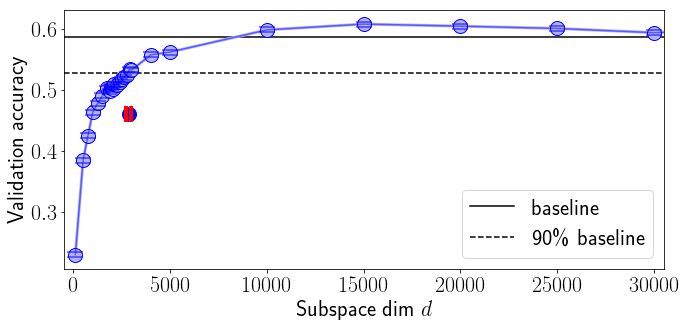

In [56]:
plot_perf_with_std(unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean, dim_solved_std, logx=False, xlim_v=[-500,30500], saveas='dim_cifar_lenet5_std_xlim')

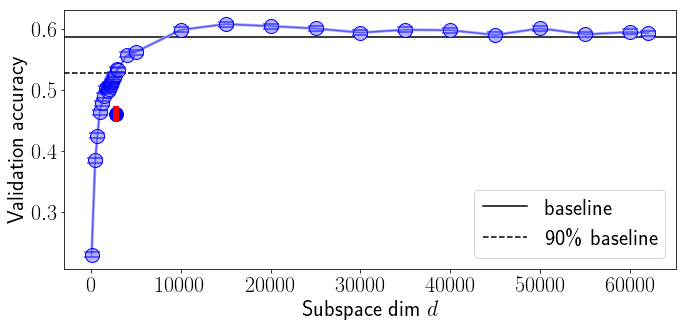

In [57]:
plot_perf_with_std(unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean, dim_solved_std, logx=False, saveas='dim_cifar_lenet5_std')

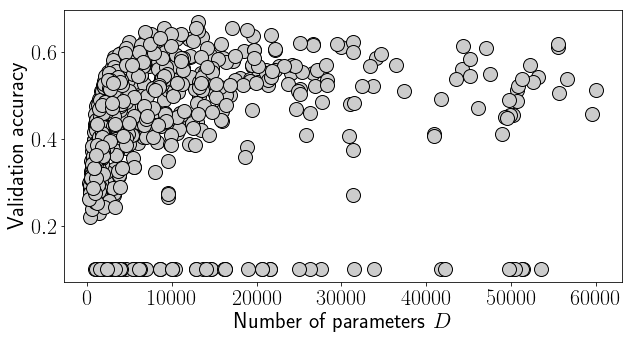

In [58]:
plot_perf_cmp(smallnets_cifar_lenet, False, 'cifar_small_direct_lenet_linear')

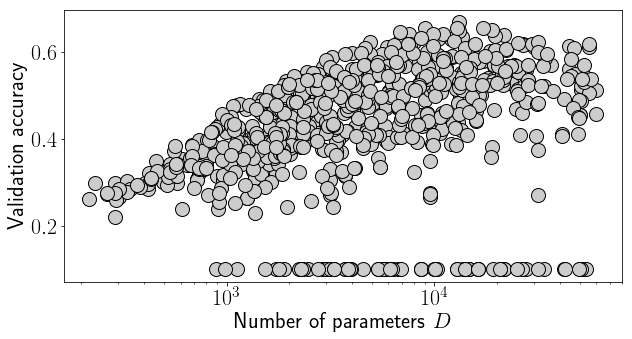

In [59]:
plot_perf_cmp(smallnets_cifar_lenet, True, 'cifar_small_direct_lenet_log')

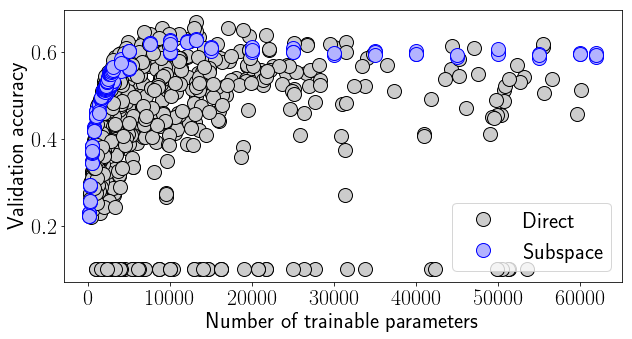

In [60]:
plot_perf_cmp_trainable(smallnets_cifar_lenet, subspace_cifar_lenet, False, 'cifar_cmp_lenet_linear')

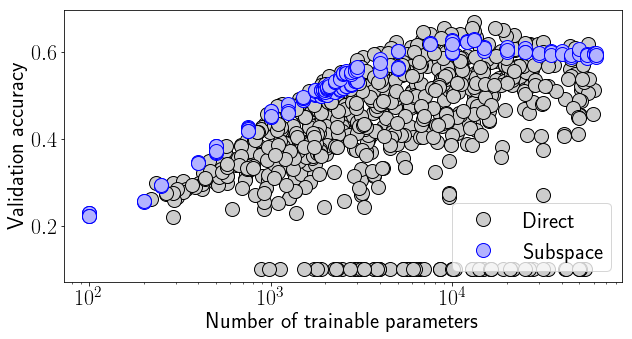

In [61]:
plot_perf_cmp_trainable(smallnets_cifar_lenet, subspace_cifar_lenet, True, 'cifar_cmp_lenet_log')

d_int=2900.0, acc=0.5340666666666666


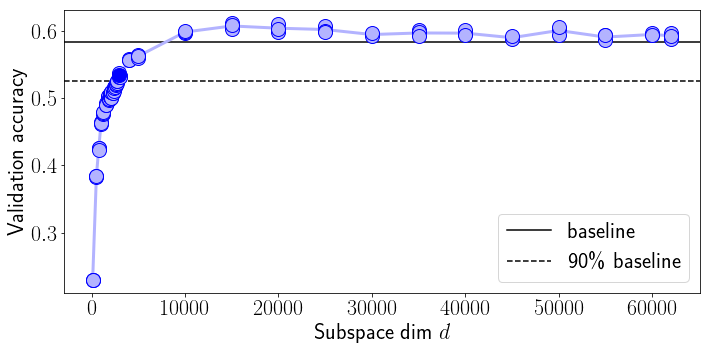

In [62]:
plot_perf_dim(data_cifar_lenet5, logx=False, saveas='dim_cifar_lenet5_log')

dir_perf: 0.5
d_int=1000.0, acc=0.4627333333333334


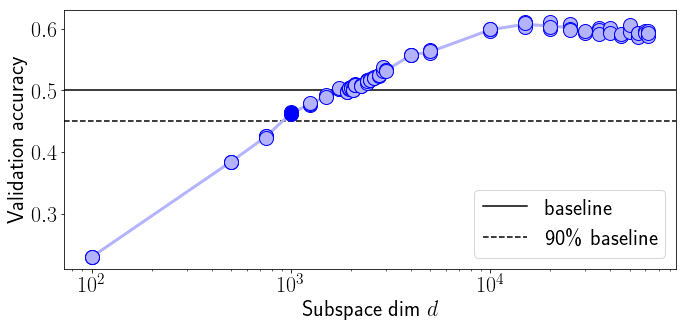

In [63]:
plot_perf_dim_90(data_cifar_lenet5, logx=True, saveas=None, d_Int=0.5)

d_int=5000.0, acc=0.6011666666666667


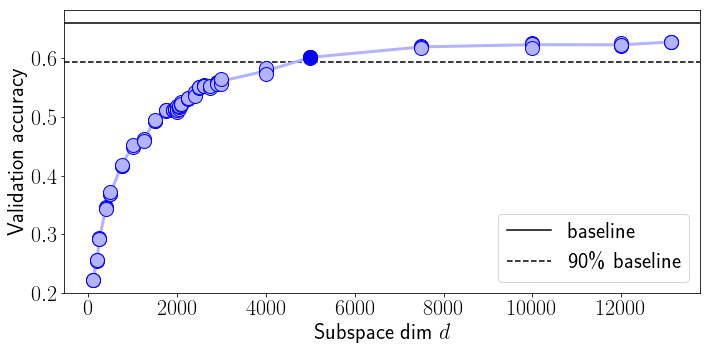

In [64]:
plot_perf_dim(data_cifar_lucky_lenet, logx=False, saveas=None)

d_int=5000.0, acc=0.6011666666666667


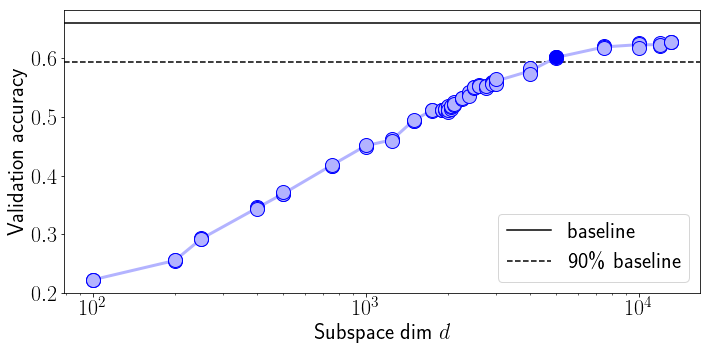

In [65]:
plot_perf_dim(data_cifar_lucky_lenet, logx=True, saveas=None)

# L2 vs subspace dim: regularization comparison

Result directories like ```l2vsdim/171018_162039_99109f8_lrb_mnist_sgd_fastf_dim200_l20_s10/```

Collected using

```
for dir in *sgd_dir_l2*; do echo -n "[`cat $dir/diary | grep 'final_stats train_accuracy' | gk 4`, `cat $dir/diary | grep 'final_stats val_accuracy' | gk 4`],"; done

for dir in *sgd_fastf_dim*; do echo -n "[`cat $dir/diary | grep 'final_stats train_accuracy' | gk 4`, `cat $dir/diary | grep 'final_stats val_accuracy' | gk 4`],"; done
```

In [66]:
l2_trainval = array([[1, 0.9843],[1, 0.9833],[1, 0.9845],[1, 0.9839],[1, 0.9832],[1, 0.9835],[1, 0.984],[1, 0.9851],[0.9218, 0.9295],[0.99176, 0.981],[1, 0.9848],[1, 0.9841],[1, 0.9848],[1, 0.9845],[1, 0.9844],[1, 0.9841],[1, 0.9839],[0.99166, 0.9817],[1, 0.9845],[0.9217, 0.9291],[1, 0.9842],[1, 0.9841],[1, 0.984],[1, 0.9844],[1, 0.9838],[1, 0.9851],[1, 0.9844],[1, 0.9846],[0.9918, 0.9818],[0.92156, 0.9296],[1, 0.9823],[1, 0.9831],[1, 0.9833],[1, 0.9841],[1, 0.9836],[1, 0.9827]])

In [67]:
dim_trainval = array([[0.75132, 0.7638],[0.80498, 0.8168],[0.858, 0.8681],[0.89536, 0.9007],[0.90796, 0.9118],[0.94088, 0.9388],[0.9534, 0.9515],[0.96874, 0.9563],[0.98082, 0.9658],[0.98564, 0.968],[0.99728, 0.974],[0.99964, 0.9764],[1, 0.9802],[1, 0.9785],[1, 0.9804],[1, 0.9819],[1, 0.9828],[0.74376, 0.7678],[0.80458, 0.8281],[0.86266, 0.8756],[0.89734, 0.9032],[0.91022, 0.9156],[0.93834, 0.9379],[0.95064, 0.9517],[0.96672, 0.9601],[0.98084, 0.9659],[0.98532, 0.9691],[0.99742, 0.975],[0.9997, 0.9773],[1, 0.9782],[1, 0.98],[1, 0.9818],[1, 0.9833],[1, 0.9834],[0.75068, 0.7677],[0.80918, 0.8217],[0.8649, 0.8735],[0.89516, 0.9004],[0.9087, 0.9137],[0.9392, 0.9378],[0.95184, 0.9502],[0.96834, 0.96],[0.98098, 0.9677],[0.98524, 0.97],[0.99714, 0.9739],[0.99956, 0.9767],[1, 0.9791],[1, 0.9802],[1, 0.9831],[0.74718, 0.7703],[0.80182, 0.8216],[0.86182, 0.8753],[0.89352, 0.9004],[0.90736, 0.9124],[0.93834, 0.935],[0.95192, 0.9512]])

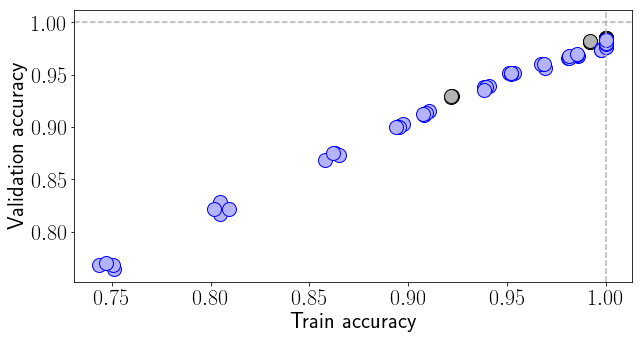

In [68]:
plot(l2_trainval[:,0], l2_trainval[:,1], 'o', mec='k', lw=3, mfc=(.7,.7,.7), ms=14)
plot(dim_trainval[:,0], dim_trainval[:,1], 'o', mec='b', lw=3, mfc=(.7,.7,1), ms=14)
axhline(1.0, color=(.7,.7,.7), ls='--')
axvline(1.0, color=(.7,.7,.7), ls='--')
xlabel('Train accuracy')
ylabel('Validation accuracy')
#savefig('test.png')
#savefig('test.pdf')

(0.96, 1.005, 0.96, 1.005)

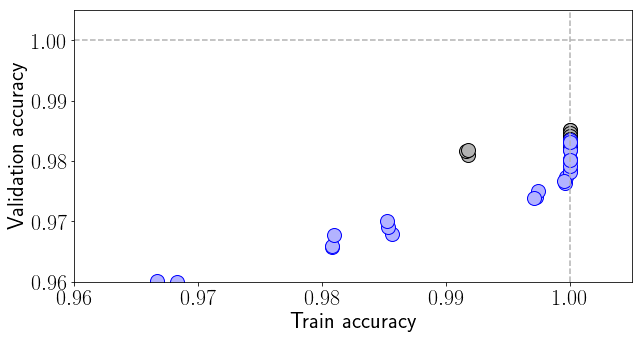

In [69]:
plot(l2_trainval[:,0], l2_trainval[:,1], 'o', mec='k', lw=3, mfc=(.7,.7,.7), ms=14)
plot(dim_trainval[:,0], dim_trainval[:,1], 'o', mec='b', lw=3, mfc=(.7,.7,1), ms=14)
axhline(1.0, color=(.7,.7,.7), ls='--')
axvline(1.0, color=(.7,.7,.7), ls='--')
xlabel('Train accuracy')
ylabel('Validation accuracy')
#savefig('test.png')
#savefig('test.pdf')
ax=axis()
axis((.96, 1.005, .96, 1.005))

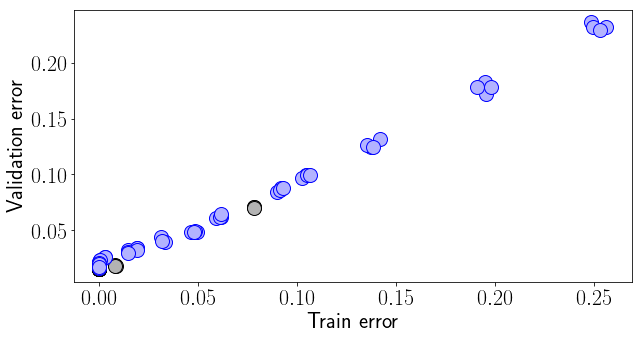

In [70]:
# Error instead of accuracy
plot(1-l2_trainval[:,0], 1-l2_trainval[:,1], 'o', mec='k', lw=3, mfc=(.7,.7,.7), ms=14)
plot(1-dim_trainval[:,0], 1-dim_trainval[:,1], 'o', mec='b', lw=3, mfc=(.7,.7,1), ms=14)
xlabel('Train error')
ylabel('Validation error')

## Toy example

Result directories like ```toy/171019_184721_b8c525a_lrb_toy_proj_d10/```

Collected using

```
for dir in 17*; do echo -n "[`cat $dir/diary | grep 'final_stats total_params' | gk 4`, `cat $dir/diary | grep 'final_stats val_performance' | gk 4`],"; done
```

In [71]:
dim_trainval = array([
    #[0, 8.05361e-23],[1, 1.89087e-22],[2, 5.87724e-22],[3, 2.19866e-20],[4, 2.1993e-20],[5, 2.40969e-20],[6, 6.25471e-11],[7, 3.17628e-09],[8, 0.0475739],[9, 0.165084],[10, 0.999769],[11, 0.999461],[12, 0.999992],[13, 0.999464],[14, 0.998213],[15, 0.999998],[20, 0.997842],[30, 0.999712],[50, 0.999183],[80, 0.997498],[100, 0.990812]
    [0, 8.05361e-23],[1, 1.89087e-22],[2, 5.87724e-22],[3, 2.19866e-20],[4, 2.1993e-20],[5, 2.40969e-20],[6, 6.25471e-11],[7, 3.17628e-09],[8, 0.0475739],[9, 0.165084],[10, 0.999769],[11, 0.999461],[12, 0.999992],[13, 0.999464],[14, 0.998213],[15, 0.999998],[20, 0.997842],[30, 0.999712],[50, 0.999183],
])
dir_perf = 0.999977

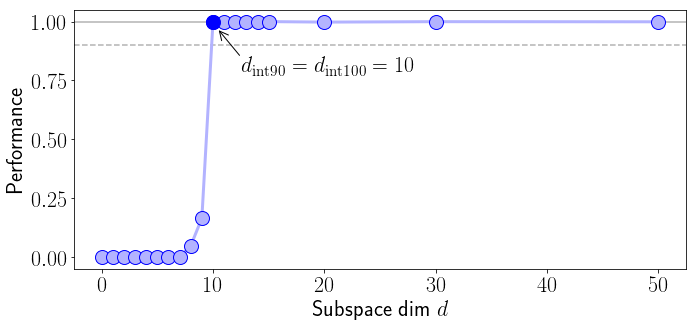

In [72]:
#figsize(15, 8)
figsize(10, 5)
plt.rc('text', usetex=True)
axhline(dir_perf, color=(.7,.7,.7), ls='-')
axhline(.9 * dir_perf, color=(.7,.7,.7), ls='--')
plot(dim_trainval[:,0], dim_trainval[:,1], 'o-', mec='b', lw=3, mfc=(.7,.7,1), color=(.7,.7,1), ms=14)
plot(dim_trainval[10,0], dim_trainval[10,1], 'o', mec='b', lw=3, mfc='b', ms=14)

#text(10.5, .91, '$d_{\mathrm{int90}} = d_{\mathrm{int100}} = 10$')
#arrow(12.5, .85, -1.8, .1, head_width=.2)
gca().annotate('', xy=(10.4, .97), xytext=(12.5, .85), arrowprops=dict(arrowstyle="->"))
text(12.5, .77, '$d_{\mathrm{int90}} = d_{\mathrm{int100}} = 10$')

xlabel('Subspace dim $d$')
ylabel('Performance')
plt.tight_layout()
savefig('toy_example.png')
savefig('toy_example.pdf')

## Percentage of Permuted Label MNIST

In [73]:
mnist_pl_01_dim = array([
    [0, 1.0],[1000, 0.1246],[10000, 0.2328],[20000, 0.3072],[30000, 0.3996],[40000, 0.487],[50000, 0.575],[60000, 0.6686],[70000, 0.7506],[80000, 0.8392],[90000, 0.8992],[100000, 0.949],[110000, 0.975],[120000, 0.9876],[130000, 0.9924],[140000, 0.9984],[150000, 0.9998],[160000, 1.0],[170000, 1.0],[180000, 1.0],[190000, 1.0],[200000, 1.0],[210000, 1.0],[220000, 1.0],[230000, 1.0],[240000, 1.0],[250000, 1.0],[260000, 1.0],[270000, 1.0],[280000, 1.0],[290000, 1.0],[300000, 1.0]
])

mnist_pl_05_dim = array([
    [0, 0.99156],[1000, 0.11652],[10000, 0.1764],[20000, 0.23804],[30000, 0.29904],[40000, 0.3604],[50000, 0.42488],[60000, 0.48488],[70000, 0.54584],[80000, 0.605],[90000, 0.66688],[100000, 0.73308],[110000, 0.79204],[120000, 0.84436],[130000, 0.89172],[140000, 0.92576],[150000, 0.95044],[160000, 0.96692],[170000, 0.97468],[180000, 0.98328],[190000, 0.98708],[200000, 0.99308],[210000, 0.9946],[220000, 0.99728],[230000, 0.9982],[240000, 0.99884],[250000, 0.99884],[260000, 0.99724],[270000, 0.99804],[280000, 0.9996],[290000, 0.99988],[300000, 0.99892]
])

mnist_pl_10_dim = array([
    [0, 0.99444],[1000, 0.11292],[10000, 0.15122],[20000, 0.19618],[30000, 0.24556],[40000, 0.29172],[50000, 0.3347],[60000, 0.3811],[70000, 0.42188],[80000, 0.46698],[90000, 0.50712],[100000, 0.54436],[110000, 0.5939],[120000, 0.63058],[130000, 0.67804],[140000, 0.71868],[150000, 0.7643],[160000, 0.80814],[170000, 0.84078],[180000, 0.87192],[190000, 0.90398],[200000, 0.92432],[210000, 0.94128],[220000, 0.95406],[230000, 0.96462],[240000, 0.97232],[250000, 0.97732],[260000, 0.9809],[270000, 0.98446],[280000, 0.98714],[290000, 0.98706],[300000, 0.99086]
])

In [74]:
def plot_pl_perf_dim(dat, logx=False, saveas=None, d_Int=None):
    plotfn = semilogx if logx else plot
    figsize(10, 5)
    plt.rc('text', usetex=True)
    
    dir_perf = dat[0,1]
    if d_Int!=None:
        dir_perf = d_Int

    axhline(dir_perf, color=(.7,.7,.7), ls='-', label='baseline')
    axhline(.9 * dir_perf, color=(.7,.7,.7), ls='--', label='90\% baseline')
    plot(dat[1:,0], dat[1:,1], 'o-', mec='b', lw=3, mfc=(.7,.7,1), color=(.7,.7,1), ms=14)

    for i in range(dat.shape[0]):
        if dat[i,1]>dir_perf*.89 and i>0:
            print "d_int="+str(dat[i,0]) + ", acc=" +str(dat[i,1] ) 
            plot(dat[i,0], dat[i,1], 'o', mec='b', lw=3, mfc='b', ms=14)
            break
    legend(loc=4)
    xlabel('Subspace dim d')
    ylabel('Training accuracy')
    if saveas:
        savefig('%s.png' % saveas)
        savefig('%s.pdf' % saveas)

d_int=90000.0, acc=0.8992
bit=18.0
bit=2.8903717578961645
11.407564949312402


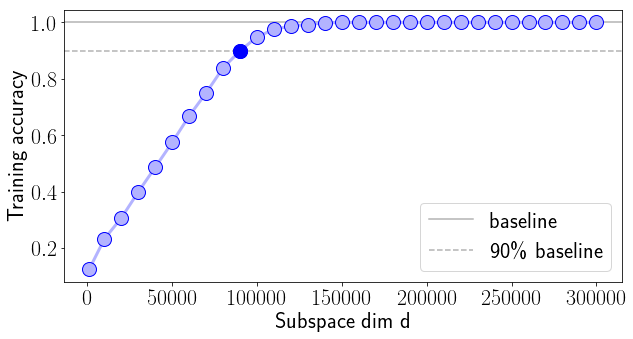

In [75]:
plot_pl_perf_dim(mnist_pl_01_dim, logx=False, saveas=None)
print "bit="+str(90000.0/(50000*0.1))
print "bit="+str(log(90000.0/(50000*0.1)))
print log(90000)

d_int=130000.0, acc=0.89172
bit=5.2
bit=1.6486586255873816
11.77528972943772


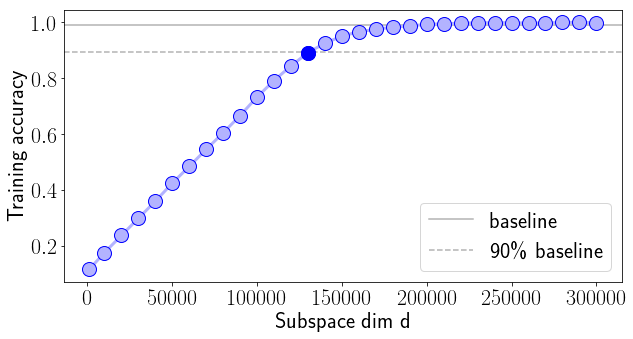

In [76]:
plot_pl_perf_dim(mnist_pl_05_dim, logx=False, saveas=None)
print "bit="+str(130000.0/(50000*0.5))
print "bit="+str(log(130000.0/(50000*0.5)))
print log(130000)

d_int=190000.0, acc=0.90398
bit=3.8
bit=1.33500106673234
12.154779351142624


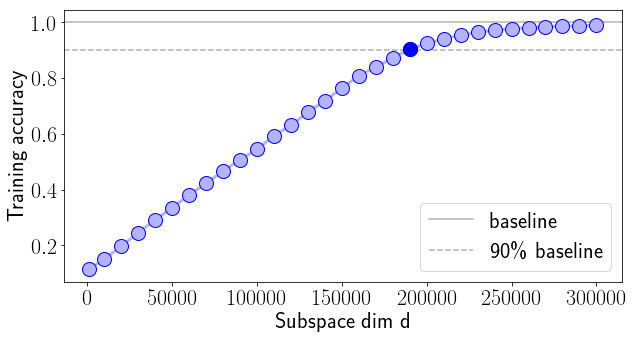

In [77]:
plot_pl_perf_dim(mnist_pl_10_dim, logx=False, saveas=None, d_Int=True)
print "bit="+str(190000.0/(50000*1.0))
print "bit="+str(log(190000.0/(50000*1.0)))
print log(190000)

In [78]:
def compute_d_int(dat, perf_b=None):
    dir_perf = np.mean(dat[dat[:,0]==0,:],0)[1]
    sub_perf = dat[dat[:,0]!=0,:]
    
    unique_dim = sorted(list(set(sub_perf[:,0])))
    perf_mean = [np.mean(dat[dat[:,0]==d,:],0)[1] for d in unique_dim]
    
    if perf_b!=None:
        dir_perf = perf_b
        
    for i in range(len(unique_dim)):
        if perf_mean[i]>dir_perf*.89:
            print "d_int="+str(unique_dim[i]) + ", acc=" +str( perf_mean[i] ) 
            solved = array([unique_dim[i], perf_mean[i]])
            break
        elif perf_mean[-1]<dir_perf*.89:
            solved = array([unique_dim[-1], perf_mean[-1]])
            print "d_int="+str(unique_dim[-1]) + ", acc=" +str( perf_mean[-1] ) + "(Warning: larger d should be considered)"
            break
        
    return solved, unique_dim, perf_mean
    
    
def plot_pl_mnist_ff(dat_lenet, dat_lenet_untied,dat_lenet_mlp,  perf_b=1.0, logx=True, xmin=None, saveas=None):
    
    plotfn = semilogx if logx else plot
    leg = OrderedDict()
    
    hhd = axhline(perf_b, color=(.7,.7,.7), ls='-')
    axhline(.89 * perf_b, color=(.7,.7,.7), ls='--')

    solved, unique_dim, perf_mean = compute_d_int(dat_lenet, perf_b)
    hh, = plotfn(unique_dim, perf_mean, 'o-', color='b',  mfc=(.7,.7,1), ms=14)
    plotfn(solved[0], solved[1], 'o-', color='b', ms=15)
    leg[hh] = '100\%'

    solved, unique_dim, perf_mean = compute_d_int(dat_lenet_untied, perf_b)
    hh, = plotfn(unique_dim, perf_mean, 'o-', color='g', mfc=(.7,.7,1), ms=14)
    plotfn(solved[0], solved[1], 'o-', color='g', ms=15)    
    leg[hh] = '50\%'    
    
    solved, unique_dim, perf_mean = compute_d_int(dat_lenet_mlp, perf_b)
    hh, = plotfn(unique_dim, perf_mean, 'o-', color='r', mfc=(.7,.7,1), ms=14)
    plotfn(solved[0], solved[1], 'o', color='r', ms=15)
    leg[hh] = '10\%'


    leg[hhd] = 'baseline'

    tight_layout()
    xlabel('Intrinsic dim d')
    ylabel('Training accuracy')
    ax = axis()
    axis([xmin, ax[1], 0, ax[3]])
    legend(leg.keys(), leg.values())
    #legend?
    
    if saveas:
        savefig('%s.png' % saveas)
        savefig('%s.pdf' % saveas)    
    

d_int=190000.0, acc=0.90398
d_int=130000.0, acc=0.89172
d_int=90000.0, acc=0.8992


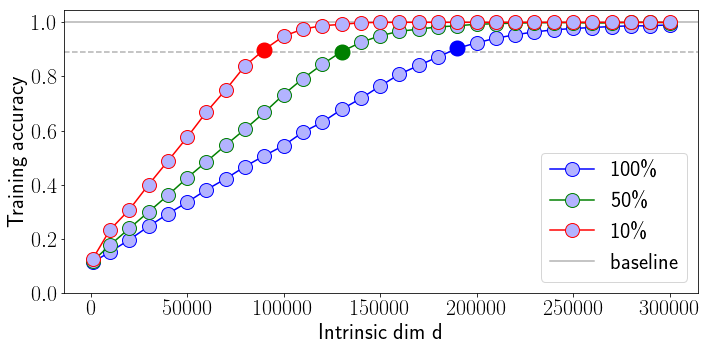

In [79]:
plot_pl_mnist_ff(mnist_pl_10_dim, mnist_pl_05_dim, mnist_pl_01_dim,  perf_b=1.0, logx=False, xmin=None, saveas='mnist_fnn_permulated_label')

## ConvNet Controls

In [80]:
cifar_Untied_LeNet = array([
    [0, 0.6112],[1000, 0.3731],[1500, 0.4075],[1750, 0.4165],[2000, 0.4303],[2250, 0.4334],[2500, 0.4465],[2750, 0.4503],[3000, 0.4571],[3500, 0.4649],[4000, 0.4745],[4500, 0.4825],[5000, 0.4913],[5500, 0.4851],[6000, 0.4971],[6500, 0.4959],[6750, 0.5025],[7000, 0.5041],[7500, 0.5095],[8000, 0.5125],[9000, 0.5208],[10000, 0.5301],[11000, 0.5351],[12000, 0.5404],[13000, 0.5406],[14000, 0.5406],[15000, 0.5508]
])

cifar_MLP_LeNet = array([
    [0, 0.5231],[1000, 0.265],[1500, 0.2853],[1750, 0.3007],[2000, 0.3116],[2250, 0.3168],[2500, 0.32],[2750, 0.3283],[3000, 0.335],[3500, 0.343],[4000, 0.3527],[4000, 0.3533],[4000, 0.3527],[4000, 0.3533],[4500, 0.3585],[5000, 0.3617],[5000, 0.3622],[5000, 0.3617],[5000, 0.3622],[5500, 0.3722],[6000, 0.3745],[6500, 0.3794],[6750, 0.3838],[7000, 0.3865],[7500, 0.3914],[7500, 0.3893],[7500, 0.3914],[7500, 0.3893],[8000, 0.3934],[9000, 0.3984],[10000, 0.3994],[10000, 0.3997],[10000, 0.3994],[10000, 0.3997],[11000, 0.4093],[12000, 0.4095],[13000, 0.419],[14000, 0.4198],[15000, 0.4284],[15000, 0.4275],[15000, 0.4284],[15000, 0.4275],[17500, 0.4315],[20000, 0.4375],[20000, 0.435],[20000, 0.4375],[20000, 0.435],[25000, 0.4458],[35000, 0.458],[50000, 0.4631],[75000, 0.4653],[100000, 0.4605]
])

cifar_FCTie_LeNet = array([
    [0, 0.5255],[1000, 0.3959],[1500, 0.4252],[1750, 0.4285],[2000, 0.4388],[2250, 0.4402],[2500, 0.4532],[2750, 0.4524],[3000, 0.4581],[3500, 0.4648],[4000, 0.4704],[4500, 0.4776],[5000, 0.477],[5500, 0.4767],[6000, 0.4868],[6500, 0.4834],[6750, 0.4928],[7000, 0.4978],[7500, 0.4927],[8000, 0.4999],[9000, 0.5068],[10000, 0.5008],[11000, 0.4959],[12000, 0.502],[13000, 0.5075],[14000, 0.5064],[15000, 0.5062],[17500, 0.5105],[20000, 0.5062],[25000, 0.4966]
])

mnist_Untied_LeNet = array([
    [0, 0.986],[100, 0.6446],[200, 0.7978],[225, 0.7946],[250, 0.823],[275, 0.8306],[300, 0.8339],[325, 0.8426],[350, 0.8579],[375, 0.8626],[400, 0.8611],[425, 0.8796],[450, 0.8887],[475, 0.8915],[500, 0.8861],[550, 0.8886],[600, 0.9001],[700, 0.9039],[800, 0.9106],[900, 0.9204],[1000, 0.925],[1100, 0.9295],[1200, 0.93],[1300, 0.9329],[1400, 0.9344],[1500, 0.9431]
])

mnist_MLP_LeNet = array([
    [0, 0.9758],[100, 0.4056],[200, 0.6268],[225, 0.6375],[250, 0.6996],[275, 0.702],[300, 0.6986],[325, 0.7145],[350, 0.7238],[375, 0.7534],[400, 0.7643],[425, 0.756],[450, 0.7703],[475, 0.7735],[500, 0.7846],[550, 0.7992],[600, 0.8061],[700, 0.82],[800, 0.8437],[900, 0.8557],[1000, 0.865],[1100, 0.8646],[1200, 0.8677],[1300, 0.877],[1400, 0.8787],[1500, 0.887],[1750, 0.8892],[2000, 0.9004],[2250, 0.9051],[2500, 0.9108],[4000, 0.9209],[5000, 0.9295],[7500, 0.938],[10000, 0.9432],[15000, 0.9498],[20000, 0.9558],[50000, 0.9681],[100000, 0.9732]
])

mnist_FCTie_LeNet = array([
    [0, 0.9891],[100, 0.69],[200, 0.8209],[225, 0.8237],[250, 0.8475],[275, 0.863],[300, 0.8667],[325, 0.8738],[350, 0.8864],[375, 0.8879],[400, 0.8928],[425, 0.9029],[450, 0.9071],[475, 0.9061],[500, 0.9059],[550, 0.9135],[600, 0.9184],[700, 0.928],[800, 0.932],[900, 0.9315],[1000, 0.9391],[1100, 0.9451],[1200, 0.9431],[1300, 0.949],[1400, 0.9526],[1500, 0.9538],[1750, 0.9579],[2000, 0.9576],[2250, 0.9612],[2500, 0.965]
])

d_int=15000.0, acc=0.5508


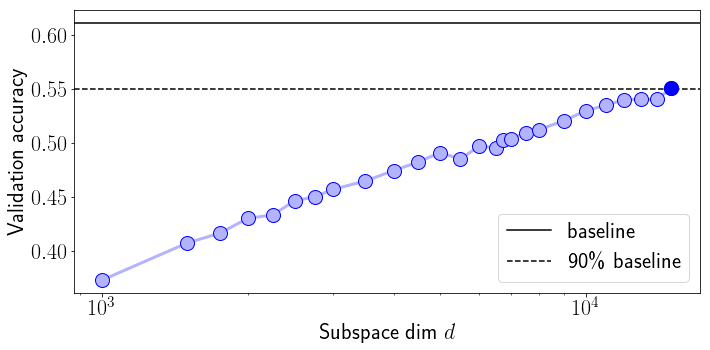

In [81]:
plot_perf_dim(cifar_Untied_LeNet, logx=True, saveas=None)

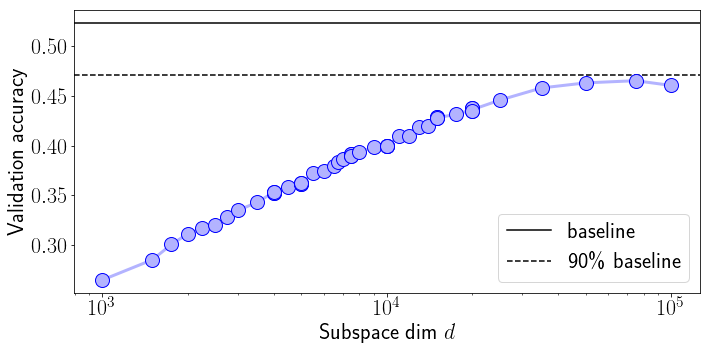

In [82]:
plot_perf_dim(cifar_MLP_LeNet, logx=True, saveas=None)

d_int=4500.0, acc=0.4776


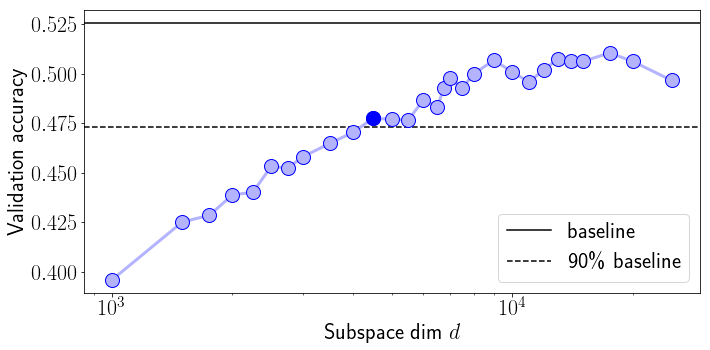

In [83]:
plot_perf_dim(cifar_FCTie_LeNet, logx=True, saveas=None)

d_int=450.0, acc=0.8887


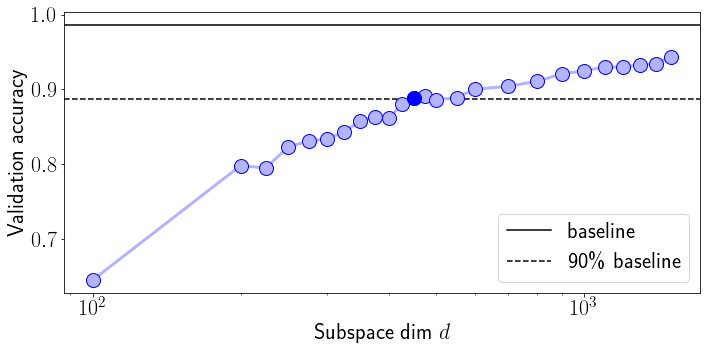

In [84]:
plot_perf_dim(mnist_Untied_LeNet, logx=True, saveas=None)

d_int=1400.0, acc=0.8787


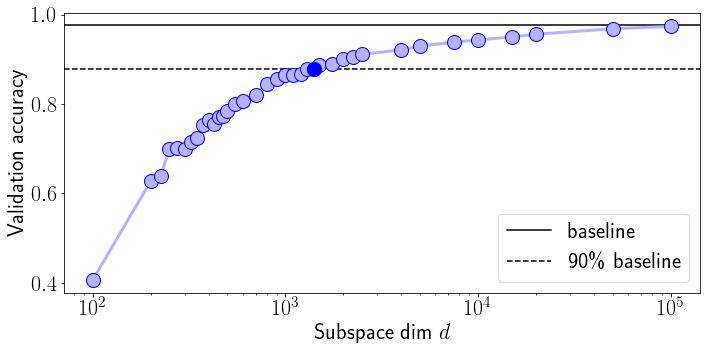

In [85]:
plot_perf_dim(mnist_MLP_LeNet, logx=True, saveas=None)

d_int=400.0, acc=0.8928


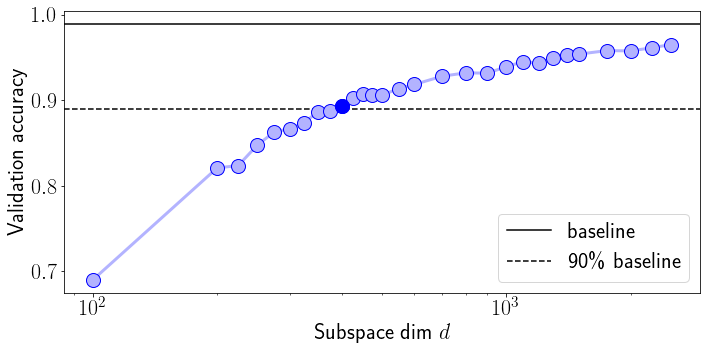

In [86]:
plot_perf_dim(mnist_FCTie_LeNet, logx=True, saveas=None)

In [87]:
def compute_d_int(dat, perf_b=None):
    dir_perf = np.mean(dat[dat[:,0]==0,:],0)[1]
    sub_perf = dat[dat[:,0]!=0,:]
    
    unique_dim = sorted(list(set(sub_perf[:,0])))
    perf_mean = [np.mean(dat[dat[:,0]==d,:],0)[1] for d in unique_dim]
    
    if perf_b!=None:
        dir_perf = perf_b
        
    for i in range(len(unique_dim)):
        if perf_mean[i]>dir_perf*.90:
            print "d_int="+str(unique_dim[i]) + ", acc=" +str( perf_mean[i] ) 
            solved = array([unique_dim[i], perf_mean[i]])
            break
        elif perf_mean[-1]<dir_perf*.90:
            solved = array([unique_dim[-1], perf_mean[-1]])
            print "d_int="+str(unique_dim[-1]) + ", acc=" +str( perf_mean[-1] ) + "(Warning: larger d should be considered)"
            break
        
    return solved, unique_dim, perf_mean
    
    
def plot_convnet_ff(dat_lenet, dat_lenet_untied, dat_lenet_mlp,dat_lenet_fctie,  perf_b=1.0, logx=True, limit=None, saveas=None):
    
    plotfn = semilogx if logx else plot
    leg = OrderedDict()
    
    axhline(perf_b, color=(.7,.7,.7), ls='-')
    hhd = axhline(.9 * perf_b, color=(.7,.7,.7), ls='--')

    solved, unique_dim, perf_mean = compute_d_int(dat_lenet, perf_b)
    hh, = plotfn(unique_dim, perf_mean, 'o-', color='k',  mfc=(.7,.7,1), ms=14)
    plotfn(solved[0], solved[1], 'o-', color='k', ms=15)
    leg[hh] = 'Standard LeNet'

    solved, unique_dim, perf_mean = compute_d_int(dat_lenet_untied, perf_b)
    hh, = plotfn(unique_dim, perf_mean, 'o-', color='g', mfc=(.7,.7,1), ms=14)
    plotfn(solved[0], solved[1], 'o-', color='g', ms=15)    
    leg[hh] = 'Untied-LeNet'    

    solved, unique_dim, perf_mean = compute_d_int(dat_lenet_fctie, perf_b)
    hh, = plotfn(unique_dim, perf_mean, 'o-', color='b', mfc=(.7,.7,1), ms=14)
    plotfn(solved[0], solved[1], 'o', color='b', ms=15)
    leg[hh] = 'FCTied-LeNet'    
    
    solved, unique_dim, perf_mean = compute_d_int(dat_lenet_mlp, perf_b)
    hh, = plotfn(unique_dim, perf_mean, 'o-', color='r', mfc=(.7,.7,1), ms=14)
    plotfn(solved[0], solved[1], 'o', color='r', ms=15)
    leg[hh] = 'FC-LeNet'


    
    leg[hhd] = 'threshold'

    xlabel('Intrinsic dim $d$')
    ylabel('Validation accuracy')
    ax = axis()
    tight_layout()
    if limit.any() != None:
        axis([limit[0], limit[1], limit[2], limit[3]])
    legend(leg.keys(), leg.values(),loc=4)
    #legend?
    
    if saveas:
        savefig('%s.png' % saveas)
        savefig('%s.pdf' % saveas)    
    

For a given accuracy threshold, compare $d_{int}$ 

Individual Baseline:
d_int=275.0, acc=0.8979333333333334
d_int=450.0, acc=0.8887
d_int=1400.0, acc=0.8787
d_int=400.0, acc=0.8928
Global Baseline:
d_int=290.0, acc=0.9012333333333333
d_int=600.0, acc=0.9001
d_int=425.0, acc=0.9029
d_int=2000.0, acc=0.9004


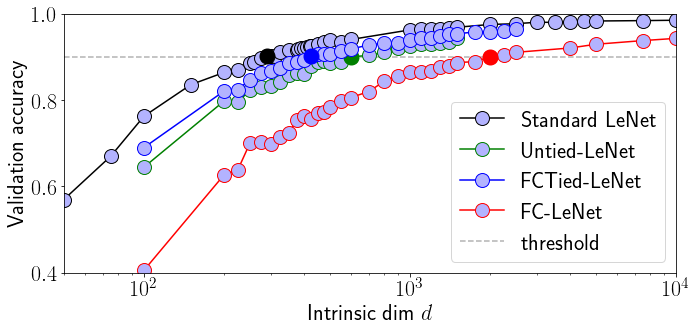

In [88]:
print "Individual Baseline:"
compute_d_int(data_mnist_lenet, perf_b=None)
compute_d_int(mnist_Untied_LeNet, perf_b=None)
compute_d_int(mnist_MLP_LeNet, perf_b=None)
compute_d_int(mnist_FCTie_LeNet, perf_b=None)

print "Global Baseline:"
perf_b = 1.0
plot_convnet_ff(data_mnist_lenet, mnist_Untied_LeNet, mnist_MLP_LeNet, mnist_FCTie_LeNet, perf_b, logx=True, limit=np.array([50,10000,0.4,1.0]), saveas='mnist_lenet_variants')

Individual Baseline:
d_int=2900.0, acc=0.5340666666666666
d_int=15000.0, acc=0.5508
d_int=100000.0, acc=0.4605(Warning: larger d should be considered)
d_int=4500.0, acc=0.4776
Global Baseline:
d_int=1000.0, acc=0.4627333333333334
d_int=2750.0, acc=0.4503
d_int=2500.0, acc=0.4532
d_int=35000.0, acc=0.458


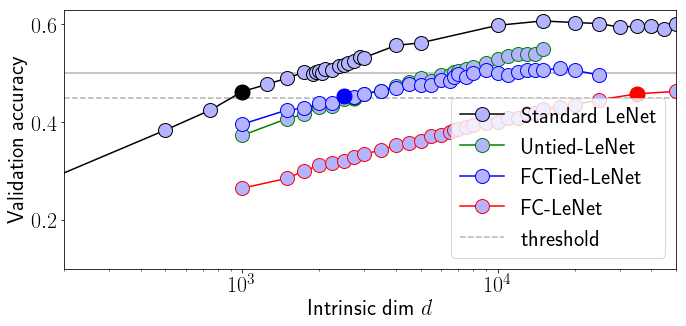

In [89]:
print "Individual Baseline:"
compute_d_int(data_cifar_lenet5, perf_b=None)
compute_d_int(cifar_Untied_LeNet, perf_b=None)
compute_d_int(cifar_MLP_LeNet, perf_b=None)
compute_d_int(cifar_FCTie_LeNet, perf_b=None)

print "Global Baseline:"
perf_b = 0.50
plot_convnet_ff(data_cifar_lenet5, cifar_Untied_LeNet, cifar_MLP_LeNet,cifar_FCTie_LeNet, perf_b, logx=True, limit=np.array([200,50000,0.1,0.63]), saveas='cifar_lenet_variants')

In [90]:
def plot_cp_perf_dim(dat, logx=False, saveas=None, d_Int=None):
    plotfn = semilogx if logx else plot
    figsize(10, 5)
    plt.rc('text', usetex=True)

    dir_perf = np.mean(dat[dat[:,0]==0,:],0)[1]
    sub_perf = dat[dat[:,0]!=0,:]
    
    if d_Int!=None:
        dir_perf = d_Int
    
    unique_dim = sorted(list(set(sub_perf[:,0])))
    perf_mean = [np.mean(dat[dat[:,0]==d,:],0)[1] for d in unique_dim]

    axhline(dir_perf, color=(.7,.7,.7), ls='-', label='baseline')
    axhline(.9 * dir_perf, color=(.7,.7,.7), ls='--', label='90\% baseline') 
    plotfn(sub_perf[:,0], sub_perf[:,1], 'o', mec='b', lw=1, mfc=(.7,.7,1), color=(.7,.7,1), ms=14, alpha=0.3)
    plotfn(unique_dim, perf_mean, '-', mec='b', lw=5, mfc=(.7,.7,1), color=(.7,.7,1), ms=14)   

    for i in range(len(unique_dim)):
        if perf_mean[i]>dir_perf*.90:
            print "d_int="+str(unique_dim[i]) + ", acc=" +str( perf_mean[i] )             
            break
    plotfn(unique_dim[i], perf_mean[i], 'o', mec='b', lw=3, mfc='b', ms=14)
    
    tight_layout()
    xlim([0.0, 30])
    xlabel('Subspace dim d')
    ylabel('Average Reward over last 100 epi.')
    legend(loc=2)
    if saveas:
        savefig('%s.png' % saveas)
        savefig('%s.pdf' % saveas)


In [91]:
CP_v0_20 = array([
    [0, 195.46],[0, 195.18],[0, 195.23],[0, 195.01],[0, 195.09],[1, 9.8],[1, 9.78],[1, 9.71],[1, 9.83],[1, 9.72],[2, 9.8],[2, 25.29],[2, 21.97],[2, 10.01],[3, 9.99],[3, 9.86],[3, 9.92],[3, 10.17],[3, 10.16],[4, 9.89],[4, 9.87],[4, 47.81],[4, 9.77],[4, 44.97],[5, 9.86],[5, 9.81],[5, 9.97],[5, 9.69],[5, 10.03],[6, 9.88],[6, 9.98],[6, 12.85],[6, 9.93],[6, 9.89],[7, 26.5],[7, 30.33],[7, 10.45],[7, 32.16],[7, 9.97],[8, 84.67],[8, 74.89],[8, 82.61],[8, 78.86],[9, 10.17],[9, 46.77],[9, 47.67],[9, 9.97],[9, 27.41],[10, 18.05],[10, 46.54],[10, 106.34],[10, 21.69],[10, 60.76],[11, 82.46],[11, 40.65],[11, 65.67],[11, 24.09],[11, 35.54],[12, 49.34],[12, 58.29],[12, 59.9],[12, 46.4],[12, 74.38],[13, 131.29],[13, 103.18],[13, 82.81],[13, 62.38],[14, 18.57],[14, 85.33],[14, 58.51],[14, 43.27],[15, 62.4],[15, 83.06],[15, 41.72],[15, 43.55],[15, 57.38],[16, 107.43],[16, 55.99],[16, 82.48],[16, 104.52],[16, 93.58],[17, 28.32],[17, 82.47],[17, 63.24],[17, 121.21],[17, 162.64],[18, 44.81],[18, 28.78],[18, 61.81],[18, 80.47],[18, 141.33],[19, 96.41],[19, 98.27],[19, 81.75],[19, 100.76],[19, 80.21],[20, 119.21],[20, 13.36],[20, 119.14],[20, 70.21],[20, 84.79],[25, 195.21],[25, 195.77],[25, 195.46],[25, 195.21],[25, 104.55],[30, 195.12],[30, 195.07],[30, 142.58],[30, 195.64],[30, 195.56],[35, 195.31],[35, 195.09],[35, 195.12],[35, 195.81],[35, 195.0],[40, 195.09],[40, 195.56],[40, 195.52],[40, 195.04],[40, 195.72],[45, 195.5],[45, 195.11],[45, 195.0],[45, 195.03],[45, 195.76],[50, 195.26],[50, 195.1],[50, 195.04],[50, 195.32],[50, 195.15],[125, 195.42],[125, 195.01],[125, 195.11],[125, 195.39],[125, 195.1],[150, 195.46],[150, 195.13],[150, 195.39],[150, 195.11],[150, 195.35],[175, 195.11],[175, 195.05],[175, 195.49],[175, 196.28],[175, 195.02],[225, 195.14],[225, 195.88],[225, 195.11],[225, 195.31],[225, 195.02],[250, 196.23],[250, 195.34],[250, 195.21],[250, 92.87],[250, 131.01],[275, 126.36],[275, 195.87],[275, 152.83],[275, 195.7],[275, 195.79],[325, 124.7],[325, 123.84],[325, 195.38],[325, 119.24],[325, 195.15],[350, 113.51],[350, 103.3],[350, 195.09],[350, 164.22],[350, 86.24],[375, 103.41],[375, 195.1],[375, 195.13],[375, 195.03],[375, 195.25],[425, 141.44],[425, 98.09],[425, 155.75],[425, 195.38],[425, 124.88],[450, 195.13],[450, 195.74],[450, 196.35],[450, 195.33],[450, 110.68],[475, 88.85],[475, 90.76],[475, 133.47],[475, 123.51],[475, 116.27],[500, 109.6],[500, 195.75],[500, 114.04],[500, 141.64],[500, 108.77],[21, 101.09],[21, 75.68],[21, 115.83],[21, 127.46],[21, 115.0],[22, 195.05],[22, 195.25],[22, 195.03],[22, 40.46],[22, 195.24],[23, 195.12],[23, 91.97],[23, 53.19],[23, 104.46],[23, 195.06],[24, 195.04],[24, 195.98],[24, 80.25],[24, 195.17],[24, 68.23]    
]) 

CP_v0_400 = array([
    [0, 195.57],[0, 195.57],[0, 195.45],[0, 195.38],[0, 153.94],[1, 9.87],[1, 9.82],[1, 10.05],[1, 10.05],[1, 9.94],[2, 10.13],[2, 9.86],[2, 9.99],[2, 10.17],[2, 9.9],[3, 86.64],[3, 29.52],[3, 93.21],[3, 29.97],[3, 27.35],[4, 20.84],[4, 22.52],[4, 19.87],[4, 24.28],[4, 21.56],[5, 45.64],[5, 9.99],[5, 46.26],[5, 9.83],[5, 43.35],[6, 21.4],[6, 13.34],[6, 36.67],[6, 43.4],[6, 13.8],[7, 10.87],[7, 10.07],[7, 10.32],[7, 52.35],[7, 9.91],[8, 52.95],[8, 53.9],[8, 57.48],[8, 56.63],[8, 14.82],[9, 34.49],[9, 36.07],[9, 25.55],[9, 20.21],[9, 21.43],[10, 92.3],[10, 73.43],[10, 59.46],[10, 39.38],[10, 27.98],[11, 29.02],[11, 24.67],[11, 49.47],[11, 59.39],[11, 20.52],[12, 10.01],[12, 32.61],[12, 45.53],[12, 113.15],[12, 30.62],[13, 73.4],[13, 59.71],[13, 112.97],[13, 57.74],[13, 28.97],[14, 49.04],[14, 73.91],[14, 69.28],[14, 119.72],[14, 51.72],[15, 65.21],[15, 104.98],[15, 147.0],[15, 92.78],[15, 120.44],[16, 108.79],[16, 81.53],[16, 57.42],[16, 103.11],[16, 80.45],[17, 195.29],[17, 14.81],[17, 70.85],[17, 55.72],[17, 67.41],[18, 195.28],[18, 163.15],[18, 179.4],[18, 195.59],[18, 54.54],[19, 82.51],[19, 137.32],[19, 52.3],[19, 92.05],[20, 71.4],[20, 48.34],[20, 101.34],[20, 92.6],[20, 195.36],[25, 89.94],[25, 57.09],[25, 82.21],[25, 195.24],[25, 109.26],[30, 118.67],[30, 109.74],[30, 101.74],[30, 136.16],[30, 195.3],[35, 125.77],[35, 195.24],[35, 195.11],[35, 137.53],[35, 195.29],[40, 195.0],[40, 195.3],[40, 195.15],[40, 195.16],[40, 195.01],[45, 195.73],[45, 195.03],[45, 166.52],[45, 195.23],[45, 195.15],[50, 195.17],[50, 195.35],[50, 195.13],[50, 195.33],[50, 195.08],[125, 195.26],[125, 195.79],[125, 195.34],[125, 195.28],[125, 195.26],[150, 195.57],[150, 184.67],[150, 195.64],[150, 195.31],[150, 196.02],[175, 195.31],[175, 195.21],[175, 177.85],[175, 167.51],[175, 195.03],[225, 175.44],[225, 195.0],[225, 172.23],[225, 162.97],[225, 174.59],[250, 154.72],[250, 168.37],[250, 167.47],[250, 174.23],[250, 166.76],[275, 156.52],[275, 173.58],[275, 153.75],[275, 171.34],[275, 173.16],[325, 170.18],[325, 168.95],[325, 148.26],[325, 169.55],[325, 175.95],[350, 167.22],[350, 164.38],[350, 164.14],[350, 158.26],[375, 173.06],[375, 150.31],[375, 164.03],[375, 155.78],[375, 155.74],[425, 168.86],[425, 154.69],[425, 162.97],[450, 159.8],[450, 174.3],[450, 167.47],[450, 148.89],[475, 160.91],[475, 166.43],[475, 150.92],[475, 164.42],[500, 167.51],[500, 147.84],[500, 164.06],[500, 158.2],[21, 131.29],[21, 94.02],[21, 82.51],[21, 145.58],[21, 135.42],[22, 112.54],[22, 195.82],[22, 134.17],[22, 87.19],[23, 101.85],[23, 195.28],[23, 65.55],[23, 92.78],[23, 85.87],[24, 195.4],[24, 195.57],[24, 112.18],[24, 126.07],[24, 195.41]
]) 

CP_v2_20 = array([
    [0, 195.5],[0, 195.89],[0, 195.15],[0, 195.0],[0, 195.31],[0, 195.32],[0, 195.48],[0, 195.24],[0, 195.02],[0, 195.0],[1, 9.99],[1, 9.94],[1, 9.89],[1, 10.04],[1, 10.08],[1, 9.85],[1, 9.91],[1, 9.94],[1, 9.74],[1, 9.8],[2, 23.08],[2, 21.95],[2, 22.35],[2, 21.46],[2, 21.5],[2, 22.88],[2, 23.88],[2, 24.24],[2, 21.84],[2, 9.84],[2, 22.81],[3, 10.04],[3, 9.84],[3, 10.11],[3, 10.12],[3, 9.71],[3, 10.03],[3, 9.9],[3, 10.11],[3, 9.73],[3, 10.15],[4, 9.83],[4, 9.69],[4, 46.86],[4, 9.82],[4, 9.94],[4, 9.97],[4, 11.16],[4, 9.82],[4, 10.1],[4, 9.89],[5, 47.32],[5, 9.63],[5, 10.12],[5, 10.05],[5, 10.14],[5, 10.06],[5, 10.1],[5, 9.87],[5, 9.67],[5, 9.92],[6, 9.76],[6, 10.47],[6, 9.79],[6, 28.7],[6, 10.12],[6, 11.6],[6, 10.13],[6, 10.08],[6, 11.39],[6, 9.97],[7, 18.43],[7, 33.53],[7, 63.44],[7, 31.09],[7, 30.99],[7, 18.83],[7, 59.01],[7, 33.76],[7, 29.41],[7, 35.79],[8, 84.99],[8, 82.0],[8, 83.67],[8, 79.59],[8, 84.08],[8, 83.68],[8, 84.57],[8, 52.92],[8, 73.63],[8, 81.05],[9, 43.6],[9, 47.6],[9, 68.92],[9, 77.59],[9, 43.48],[9, 73.22],[9, 47.91],[9, 10.38],[9, 44.92],[9, 46.08],[10, 14.66],[10, 39.37],[10, 59.39],[10, 16.77],[10, 36.94],[10, 45.24],[10, 68.82],[10, 85.43],[10, 25.04],[10, 195.41],[11, 50.25],[11, 76.66],[11, 82.44],[11, 31.1],[11, 85.2],[11, 82.2],[11, 89.08],[11, 86.76],[11, 80.69],[11, 81.13],[12, 70.2],[12, 59.96],[12, 84.22],[12, 78.65],[12, 51.27],[12, 22.05],[12, 68.23],[12, 63.06],[12, 31.12],[12, 107.16],[13, 40.95],[13, 48.42],[13, 85.22],[13, 23.24],[13, 74.3],[13, 45.62],[13, 50.29],[13, 145.94],[13, 35.01],[13, 152.76],[14, 116.34],[14, 97.05],[14, 119.28],[14, 38.35],[14, 129.04],[14, 195.13],[14, 47.4],[14, 56.17],[14, 28.49],[14, 65.27],[15, 60.33],[15, 91.76],[15, 47.93],[15, 47.04],[15, 69.34],[15, 66.74],[15, 36.31],[15, 61.43],[15, 59.43],[15, 61.86],[16, 62.5],[16, 63.62],[16, 110.29],[16, 69.8],[16, 41.45],[16, 93.54],[16, 61.56],[16, 52.46],[16, 87.83],[16, 34.55],[17, 84.64],[17, 89.89],[17, 156.49],[17, 62.89],[17, 99.34],[17, 22.9],[17, 195.0],[17, 81.59],[17, 112.86],[17, 46.44],[18, 102.12],[18, 38.63],[18, 83.51],[18, 88.19],[18, 40.73],[18, 140.2],[18, 32.76],[18, 44.81],[18, 195.15],[18, 102.44],[19, 195.45],[19, 195.18],[19, 111.68],[19, 89.06],[19, 161.76],[19, 59.74],[19, 195.35],[19, 57.85],[19, 195.38],[19, 69.63],[20, 195.71],[20, 44.62],[20, 195.06],[20, 34.31],[20, 113.25],[20, 86.72],[20, 73.03],[20, 63.25],[20, 74.99],[20, 40.46],[21, 69.12],[21, 67.88],[21, 38.61],[21, 195.82],[21, 29.55],[21, 58.02],[21, 27.1],[21, 101.63],[21, 23.37],[21, 160.13],[22, 164.51],[22, 195.34],[22, 195.13],[22, 195.47],[22, 195.05],[22, 79.48],[22, 195.1],[22, 81.76],[22, 196.12],[22, 126.42],[23, 195.59],[23, 195.49],[23, 121.64],[23, 195.57],[23, 195.94],[23, 195.76],[23, 195.22],[23, 195.02],[23, 195.24],[23, 86.52],[24, 142.59],[24, 104.32],[24, 195.51],[24, 143.77],[24, 195.17],[24, 195.32],[24, 91.78],[24, 195.32],[24, 195.32],[24, 195.15],[25, 195.19],[25, 195.6],[25, 195.11],[25, 195.32],[25, 195.36],[25, 195.17],[25, 195.06],[25, 195.06],[25, 195.4],[25, 195.32],[26, 195.03],[26, 195.42],[26, 195.03],[26, 195.07],[26, 196.37],[26, 195.58],[26, 195.01],[26, 195.15],[26, 196.16],[26, 195.06],[27, 195.81],[27, 195.34],[27, 195.1],[27, 195.31],[27, 195.45],[27, 195.66],[27, 195.56],[27, 195.91],[27, 195.1],[27, 195.0],[28, 195.95],[28, 195.16],[28, 196.1],[28, 195.56],[28, 195.19],[28, 195.24],[28, 195.46],[28, 195.08],[28, 195.49],[28, 195.18],[29, 195.65],[29, 195.63],[29, 195.36],[29, 195.71],[29, 195.6],[29, 158.38],[29, 128.34],[29, 195.02],[29, 195.58],[29, 195.97],[30, 195.13],[30, 195.73],[30, 195.5],[30, 195.35],[30, 195.36],[30, 195.12],[30, 195.28],[30, 195.33],[30, 195.21],[30, 195.04]
]) 

CP_v2_400 = array([
    [0, 195.31],[0, 195.31],[0, 195.0],[0, 195.08],[0, 195.09],[0, 195.18],[0, 195.13],[0, 195.04],[0, 196.12],[0, 195.82],[1, 9.87],[1, 9.84],[1, 9.91],[1, 10.09],[1, 9.89],[1, 9.87],[1, 9.99],[1, 9.8],[1, 9.93],[1, 10.02],[2, 16.45],[2, 16.22],[2, 16.34],[2, 12.24],[2, 16.61],[2, 16.03],[2, 16.41],[2, 9.85],[2, 9.86],[2, 10.13],[3, 30.9],[3, 91.36],[3, 25.66],[3, 13.96],[3, 14.84],[3, 9.9],[3, 92.52],[3, 9.9],[3, 9.86],[3, 27.81],[4, 22.77],[4, 10.18],[4, 22.81],[4, 24.35],[4, 26.44],[4, 21.82],[4, 21.62],[4, 42.87],[4, 24.93],[4, 42.02],[5, 35.95],[5, 9.78],[5, 11.31],[5, 40.47],[5, 10.01],[5, 46.51],[5, 42.04],[5, 47.1],[5, 10.04],[5, 17.64],[6, 35.64],[6, 14.77],[6, 21.49],[6, 12.63],[6, 12.98],[6, 13.59],[6, 11.5],[6, 12.92],[6, 22.2],[6, 13.73],[7, 9.89],[7, 19.73],[7, 10.21],[7, 45.54],[7, 19.02],[7, 9.79],[7, 10.09],[7, 22.51],[7, 10.13],[7, 9.98],[8, 108.55],[8, 59.98],[8, 22.2],[8, 55.14],[8, 44.96],[8, 38.78],[8, 25.69],[8, 34.99],[8, 64.52],[8, 17.34],[9, 20.6],[9, 36.03],[9, 61.82],[9, 18.69],[9, 40.12],[9, 12.44],[9, 27.27],[9, 10.52],[9, 38.81],[9, 34.25],[10, 9.89],[10, 37.37],[10, 29.65],[10, 53.76],[10, 12.46],[10, 14.74],[10, 48.8],[10, 13.93],[10, 22.8],[10, 49.02],[11, 94.61],[11, 60.03],[11, 103.43],[11, 30.44],[11, 79.91],[11, 56.3],[11, 26.27],[11, 90.07],[11, 52.09],[11, 34.22],[12, 74.36],[12, 41.06],[12, 61.71],[12, 59.96],[12, 26.5],[12, 19.79],[12, 34.01],[12, 30.43],[12, 19.43],[12, 32.84],[13, 23.81],[13, 38.17],[13, 10.38],[13, 81.24],[13, 33.09],[13, 139.08],[13, 49.78],[13, 27.81],[13, 26.93],[13, 79.24],[14, 46.87],[14, 77.71],[14, 122.26],[14, 92.29],[14, 75.72],[14, 65.0],[14, 25.97],[14, 133.86],[14, 81.04],[14, 70.61],[15, 29.77],[15, 195.13],[15, 61.14],[15, 33.03],[15, 107.9],[15, 86.2],[15, 195.19],[15, 56.17],[15, 97.99],[15, 71.54],[16, 55.62],[16, 109.66],[16, 80.21],[16, 93.63],[16, 71.12],[16, 45.91],[16, 61.37],[16, 74.16],[16, 91.35],[16, 95.48],[17, 69.57],[17, 34.97],[17, 79.69],[17, 37.62],[17, 64.64],[17, 128.3],[17, 71.05],[17, 84.22],[17, 89.46],[17, 86.59],[18, 60.08],[18, 103.36],[18, 150.6],[18, 118.54],[18, 195.39],[18, 195.45],[18, 63.55],[18, 70.6],[18, 195.01],[18, 149.87],[19, 152.0],[19, 65.13],[19, 65.29],[19, 80.11],[19, 145.06],[19, 93.65],[19, 195.05],[19, 111.57],[19, 45.7],[19, 131.25],[20, 81.98],[20, 134.64],[20, 195.2],[20, 117.95],[20, 195.5],[20, 99.78],[20, 195.31],[20, 86.58],[20, 111.01],[20, 143.61],[21, 90.58],[21, 195.44],[21, 101.56],[21, 68.93],[21, 111.55],[21, 87.88],[21, 82.61],[21, 130.1],[21, 76.74],[21, 63.43],[22, 88.28],[22, 109.96],[22, 62.53],[22, 186.04],[22, 129.63],[22, 155.89],[22, 73.83],[22, 86.88],[22, 196.05],[22, 77.55],[23, 168.15],[23, 84.83],[23, 136.94],[23, 154.59],[23, 156.91],[23, 78.69],[23, 140.42],[23, 79.11],[23, 83.61],[23, 88.21],[24, 126.93],[24, 114.63],[24, 195.27],[24, 74.57],[24, 103.94],[24, 98.21],[24, 111.09],[24, 112.05],[24, 92.11],[24, 152.04],[25, 195.15],[25, 171.05],[25, 78.89],[25, 195.19],[25, 86.8],[25, 91.79],[25, 195.35],[25, 195.33],[25, 195.32],[25, 105.86],[26, 195.36],[26, 195.06],[26, 195.51],[26, 68.81],[26, 195.8],[26, 127.84],[26, 195.06],[26, 195.24],[26, 195.73],[26, 172.67],[27, 54.92],[27, 170.36],[27, 151.07],[27, 195.01],[27, 195.28],[27, 122.59],[27, 195.06],[27, 195.07],[27, 81.78],[27, 121.99],[28, 70.39],[28, 196.21],[28, 195.21],[28, 68.65],[28, 195.0],[28, 195.12],[28, 195.22],[28, 64.39],[28, 195.41],[28, 96.69],[29, 195.44],[29, 105.52],[29, 195.18],[29, 157.65],[29, 182.68],[29, 124.53],[29, 120.37],[29, 195.25],[29, 160.23],[29, 73.51],[30, 129.76],[30, 195.01],[30, 144.21],[30, 140.4],[30, 148.65],[30, 195.0],[30, 99.4],[30, 106.67],[30, 195.47],[30, 195.13]
]) 

CP_v3_20 = array([
    [0, 195.35],[0, 195.37],[0, 195.41],[0, 195.26],[0, 195.52],[0, 177.71],[0, 195.0],[0, 195.64],[0, 195.2],[0, 195.87],[0, 195.54],[1, 54.02],[1, 54.31],[1, 51.05],[1, 52.51],[1, 57.34],[1, 54.3],[1, 51.83],[1, 57.01],[1, 56.24],[1, 53.16],[2, 195.28],[2, 195.23],[2, 87.17],[2, 87.52],[2, 195.14],[2, 87.27],[2, 87.15],[2, 195.02],[2, 195.2],[2, 86.72],[3, 39.68],[3, 39.44],[3, 39.23],[3, 39.93],[3, 39.52],[3, 39.27],[3, 39.56],[3, 39.65],[3, 39.62],[3, 39.77],[3, 39.82],[4, 39.44],[4, 40.8],[4, 39.73],[4, 48.76],[4, 39.98],[4, 44.93],[4, 42.03],[4, 49.04],[4, 51.17],[4, 58.6],[4, 40.28],[5, 46.83],[5, 47.22],[5, 46.8],[5, 89.22],[5, 46.62],[5, 46.11],[5, 39.93],[5, 45.29],[5, 39.66],[5, 46.57],[5, 47.59],[6, 68.55],[6, 54.46],[6, 46.27],[6, 195.26],[6, 39.68],[6, 46.44],[6, 68.01],[6, 41.86],[6, 44.09],[6, 48.04],[6, 70.08],[7, 56.26],[7, 53.64],[7, 50.67],[7, 55.33],[7, 54.06],[7, 54.28],[7, 54.1],[7, 100.95],[7, 95.06],[7, 132.22],[7, 138.7],[8, 80.12],[8, 45.25],[8, 104.48],[8, 46.77],[8, 73.13],[8, 44.92],[8, 46.38],[8, 195.09],[8, 46.8],[8, 51.84],[9, 61.75],[9, 67.29],[9, 125.98],[9, 63.6],[9, 46.86],[9, 49.57],[9, 61.61],[9, 44.48],[9, 92.69],[9, 86.54],[10, 61.18],[10, 48.95],[10, 60.96],[10, 50.64],[10, 67.22],[10, 89.41],[10, 195.19],[10, 61.13],[10, 195.3],[10, 162.69],[11, 54.64],[11, 87.15],[11, 82.5],[11, 46.06],[11, 122.19],[11, 120.18],[11, 66.17],[11, 102.77],[11, 64.02],[11, 97.71],[12, 72.1],[12, 54.83],[12, 47.64],[12, 44.83],[12, 47.09],[12, 94.9],[12, 72.83],[12, 84.36],[12, 195.0],[12, 58.17],[13, 105.81],[13, 48.0],[13, 140.68],[13, 42.85],[13, 55.15],[13, 112.59],[13, 52.1],[13, 40.89],[13, 50.54],[13, 40.92],[14, 82.68],[14, 97.56],[14, 95.8],[14, 86.93],[14, 72.65],[14, 45.69],[14, 65.97],[14, 44.24],[14, 115.76],[14, 51.25],[15, 61.67],[15, 148.29],[15, 195.69],[15, 68.24],[15, 195.25],[15, 68.01],[15, 62.19],[15, 68.06],[15, 143.53],[15, 99.05],[16, 59.99],[16, 90.41],[16, 46.74],[16, 127.24],[16, 107.96],[16, 77.68],[16, 45.26],[16, 87.17],[16, 195.81],[16, 144.23],[17, 74.51],[17, 195.31],[17, 132.57],[17, 195.19],[17, 195.64],[17, 195.39],[17, 90.53],[17, 195.31],[17, 93.02],[17, 68.36],[18, 83.68],[18, 47.03],[18, 50.81],[18, 92.07],[18, 94.01],[18, 46.82],[18, 118.64],[18, 195.0],[18, 86.98],[18, 44.72],[19, 196.04],[19, 195.34],[19, 100.14],[19, 69.02],[19, 51.36],[19, 195.52],[19, 195.94],[19, 195.33],[19, 67.34],[19, 136.6],[20, 57.6],[20, 116.55],[20, 125.44],[20, 115.14],[20, 45.46],[20, 73.2],[20, 108.72],[20, 195.18],[20, 60.39],[20, 80.42],[21, 151.78],[21, 47.58],[21, 66.3],[21, 140.24],[21, 181.26],[21, 71.78],[21, 195.61],[21, 195.18],[21, 126.72],[21, 81.57],[22, 148.3],[22, 195.18],[22, 195.0],[22, 195.32],[22, 107.51],[22, 195.0],[22, 136.67],[22, 195.28],[22, 84.08],[22, 65.08],[23, 116.45],[23, 195.03],[23, 195.02],[23, 195.77],[23, 190.4],[23, 195.44],[23, 195.0],[23, 195.13],[23, 76.5],[23, 195.14],[24, 195.15],[24, 155.31],[24, 195.1],[24, 195.27],[24, 58.56],[24, 195.07],[24, 70.35],[24, 126.01],[24, 59.16],[24, 134.43],[25, 195.27],[25, 116.79],[25, 127.1],[25, 134.15],[25, 98.45],[25, 195.89],[25, 195.26],[25, 97.95],[25, 119.59],[25, 168.68],[26, 187.67],[26, 59.82],[26, 185.93],[26, 195.16],[26, 91.52],[26, 195.0],[26, 74.4],[26, 94.48],[26, 101.33],[26, 119.92],[27, 160.73],[27, 195.02],[27, 126.58],[27, 83.49],[27, 195.02],[27, 195.01],[27, 195.07],[27, 195.1],[27, 139.85],[27, 74.34],[28, 156.49],[28, 195.5],[28, 195.01],[28, 195.74],[28, 74.56],[28, 115.46],[28, 61.64],[28, 115.03],[28, 195.09],[28, 114.54],[29, 105.86],[29, 195.01],[29, 195.02],[29, 196.45],[29, 195.26],[29, 123.16],[29, 195.4],[29, 55.94],[29, 195.76],[29, 155.45],[30, 56.89],[30, 75.13],[30, 195.13],[30, 87.57],[30, 64.44],[30, 87.46],[30, 57.09],[30, 126.05],[30, 195.16],[30, 44.41]
]) 

CP_v3_400 = array([
    [0, 200.0],[0, 195.43],[0, 195.09],[0, 189.0],[0, 181.84],[0, 200.0],[0, 157.27],[0, 195.55],[0, 195.19],[0, 197.0],[1, 96.82],[1, 93.49],[1, 200.0],[1, 136.07],[1, 200.0],[1, 96.66],[1, 195.0],[1, 137.67],[1, 200.0],[1, 200.0],[2, 39.49],[2, 40.19],[2, 102.48],[2, 39.64],[2, 200.0],[2, 195.3],[2, 200.0],[2, 100.03],[2, 200.0],[2, 200.0],[3, 200.0],[3, 200.0],[3, 40.35],[3, 200.0],[3, 200.0],[3, 46.76],[3, 48.73],[3, 200.0],[3, 47.73],[3, 200.0],[4, 113.74],[4, 200.0],[4, 39.57],[4, 39.78],[4, 200.0],[4, 111.59],[4, 122.77],[4, 121.87],[4, 40.15],[4, 197.0],[5, 200.0],[5, 200.0],[5, 40.13],[5, 64.47],[5, 200.0],[5, 200.0],[5, 200.0],[5, 200.0],[5, 200.0],[5, 195.0],[6, 200.0],[6, 65.99],[6, 200.0],[6, 197.0],[6, 200.0],[6, 40.48],[6, 78.4],[6, 88.25],[6, 200.0],[6, 200.0],[7, 200.0],[7, 200.0],[7, 200.0],[7, 200.0],[7, 200.0],[7, 200.0],[7, 200.0],[7, 141.95],[7, 200.0],[7, 200.0],[8, 200.0],[8, 105.92],[8, 75.07],[8, 43.65],[8, 56.73],[8, 200.0],[8, 181.66],[8, 200.0],[8, 69.27],[8, 200.0],[9, 199.0],[9, 57.25],[9, 200.0],[9, 49.78],[9, 195.97],[9, 200.0],[9, 200.0],[9, 48.06],[9, 200.0],[9, 78.86],[10, 49.9],[10, 200.0],[10, 63.6],[10, 197.0],[10, 42.92],[10, 61.2],[10, 200.0],[10, 44.09],[10, 200.0],[10, 43.58],[11, 78.03],[11, 200.0],[11, 200.0],[11, 49.3],[11, 56.45],[11, 200.0],[11, 47.58],[11, 200.0],[11, 41.49],[11, 80.68],[12, 200.0],[12, 200.0],[12, 45.46],[12, 49.9],[12, 200.0],[12, 200.0],[12, 200.0],[12, 62.25],[12, 88.56],[12, 135.88],[13, 195.04],[13, 200.0],[13, 68.13],[13, 43.39],[13, 200.0],[13, 50.35],[13, 198.0],[13, 200.0],[13, 200.0],[13, 89.01],[14, 200.0],[14, 200.0],[14, 200.0],[14, 195.81],[14, 200.0],[14, 58.83],[14, 86.34],[14, 195.0],[14, 49.33],[14, 200.0],[15, 200.0],[15, 200.0],[15, 200.0],[15, 200.0],[15, 160.6],[15, 54.63],[15, 200.0],[15, 50.06],[15, 200.0],[15, 45.46],[16, 50.34],[16, 59.78],[16, 200.0],[16, 200.0],[16, 200.0],[16, 200.0],[16, 200.0],[16, 67.33],[16, 200.0],[16, 65.61],[17, 200.0],[17, 118.19],[17, 199.0],[17, 195.17],[17, 200.0],[17, 174.06],[17, 200.0],[17, 65.13],[17, 200.0],[17, 200.0],[18, 108.02],[18, 200.0],[18, 200.0],[18, 72.93],[18, 200.0],[18, 200.0],[18, 200.0],[18, 159.29],[18, 89.62],[18, 200.0],[19, 200.0],[19, 200.0],[19, 200.0],[19, 200.0],[19, 200.0],[19, 105.14],[19, 200.0],[19, 163.86],[19, 197.0],[19, 88.21],[20, 200.0],[20, 74.03],[20, 109.08],[20, 167.68],[20, 200.0],[20, 200.0],[20, 200.0],[20, 200.0],[20, 200.0],[20, 143.51],[21, 200.0],[21, 163.85],[21, 200.0],[21, 68.4],[21, 196.0],[21, 53.37],[21, 200.0],[21, 200.0],[21, 200.0],[21, 200.0],[22, 200.0],[22, 95.8],[22, 200.0],[22, 200.0],[22, 144.41],[22, 200.0],[22, 53.97],[22, 200.0],[22, 196.0],[22, 200.0],[23, 195.14],[23, 200.0],[23, 54.06],[23, 195.05],[23, 200.0],[23, 138.77],[23, 200.0],[23, 117.67],[23, 96.57],[23, 200.0],[24, 200.0],[24, 196.0],[24, 200.0],[24, 195.3],[24, 200.0],[24, 109.65],[24, 200.0],[24, 195.16],[24, 200.0],[24, 200.0],[25, 200.0],[25, 200.0],[25, 68.41],[25, 200.0],[25, 74.93],[25, 200.0],[25, 78.55],[25, 195.21],[25, 200.0],[25, 166.43],[26, 200.0],[26, 130.03],[26, 195.0],[26, 200.0],[26, 46.33],[26, 129.78],[26, 195.15],[26, 200.0],[26, 127.04],[26, 200.0],[27, 200.0],[27, 200.0],[27, 200.0],[27, 45.34],[27, 200.0],[27, 137.85],[27, 200.0],[27, 200.0],[27, 200.0],[27, 175.14],[28, 200.0],[28, 200.0],[28, 63.86],[28, 140.57],[28, 200.0],[28, 200.0],[28, 199.0],[28, 200.0],[28, 200.0],[28, 200.0],[29, 79.38],[29, 200.0],[29, 200.0],[29, 129.23],[29, 154.31],[29, 83.11],[29, 74.06],[29, 200.0],[29, 200.0],[29, 200.0],[30, 200.0],[30, 200.0],[30, 200.0],[30, 56.48],[30, 200.0],[30, 149.6],[30, 197.0],[30, 199.0],[30, 200.0],[30, 200.0]
]) 

d_int=25.0, acc=177.24


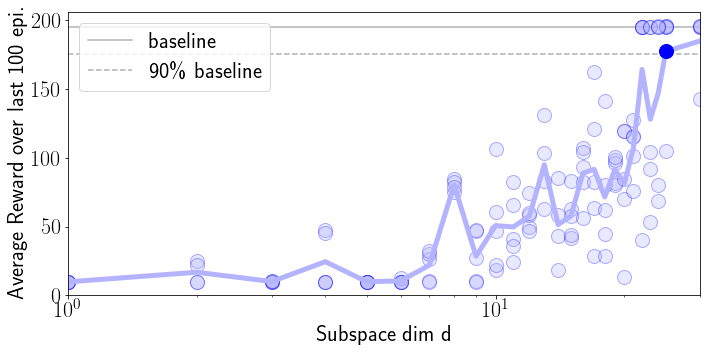

In [92]:
plot_cp_perf_dim(CP_v0_20, logx=True, saveas='CP_v0_reward',  d_Int=195)

d_int=40.0, acc=195.124


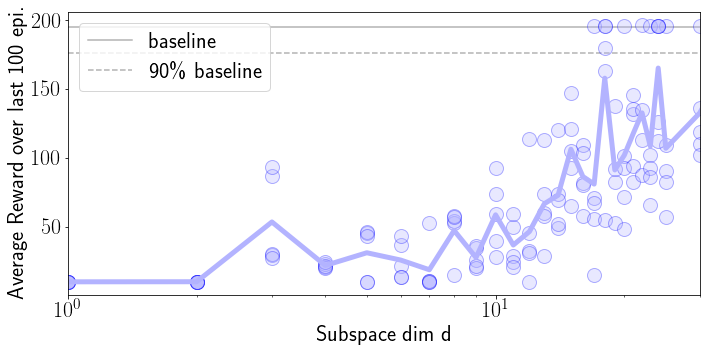

In [93]:
plot_cp_perf_dim(CP_v0_400, logx=True, saveas=None,  d_Int=195)

d_int=23.0, acc=177.199


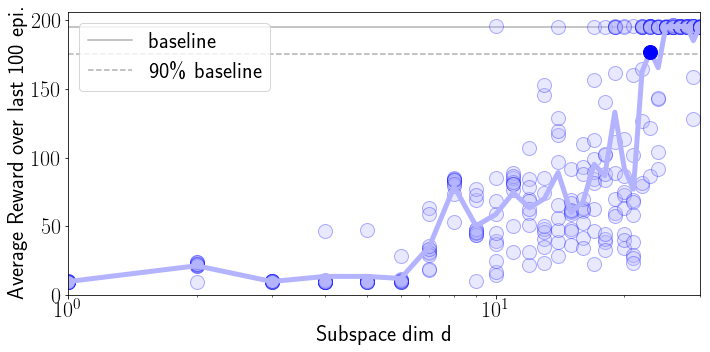

In [94]:
plot_cp_perf_dim(CP_v2_20, logx=True, saveas='CP_v2_reward', d_Int=195)

d_int=26.0, acc=173.70800000000003


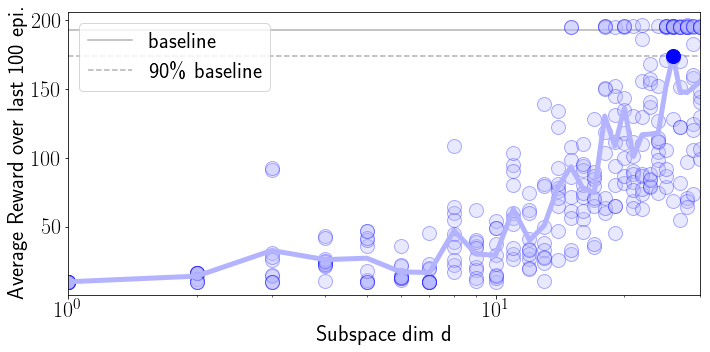

In [95]:
plot_cp_perf_dim(CP_v2_400, logx=True, saveas=None,  d_Int=193)

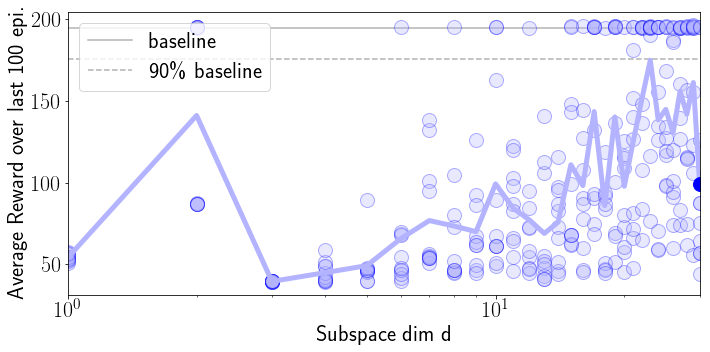

In [96]:
plot_cp_perf_dim(CP_v3_20, logx=True, saveas=None,  d_Int=195)

d_int=7.0, acc=194.195


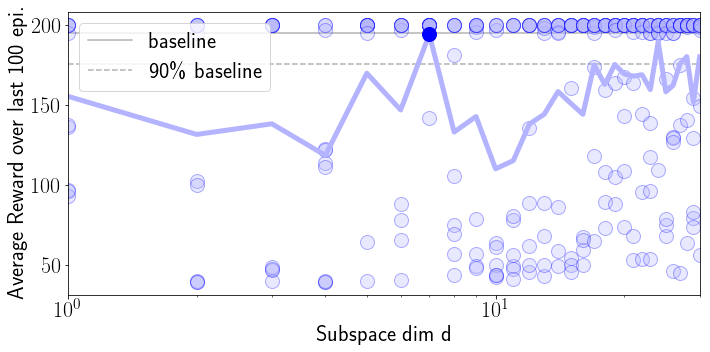

In [97]:
plot_cp_perf_dim(CP_v3_400, logx=True, saveas='CP_v3_reward',  d_Int=195)

In [98]:
d_int_unkonw = 1e5
dat_maps = [
    # we have d_int
    
    # Standard
    ['MNIST','FC',   199210,  750],
    ['MNIST','LeNet', 44426,   275],
    ['Cifar','FC',  1393610, 8000],
    ['Cifar','LeNet', 62006,   2900],  

    # Permuted Pixel MNIST
    ['MNIST-PP','FC',   199210,  750],
    ['MNIST-PP','LeNet', 44426,   750],
    
    # Permuted Label MNIST
    ['MNIST-PL-100','FC-5', 959610, 190000], 
    ['MNIST-PL-50','FC-5',  959610, 130000],  
    ['MNIST-PL-10','FC-5',  959610, 90000],  
    
    # ConvNet controls
    ['MNIST','Untied-LeNet', 286334,   600],
    ['MNIST','FC-LeNet',    3640574,   2000],
    ['Cifar','Untied-LeNet', 658238,   9000],
    
    # DQN
    ['CartPole','FC', 199210,   25],  
    ['Pole','FC', 199210,   23],  
    ['Cart','FC', 199210,   9],  
    
    # ES
    ['InvertedPendulum','FC', 562,   4], 
    ['Humanoid','FC', 166673,   700],     
    ['Atari Pong','ConvNet', 1005974,   6000], 
    
    # we do NOT have d_int yet
    ['Cifar','FC-LeNet', 16397726,   100000],
    ['ImageNet','SqueezeNet', 16397726,   500000],
]



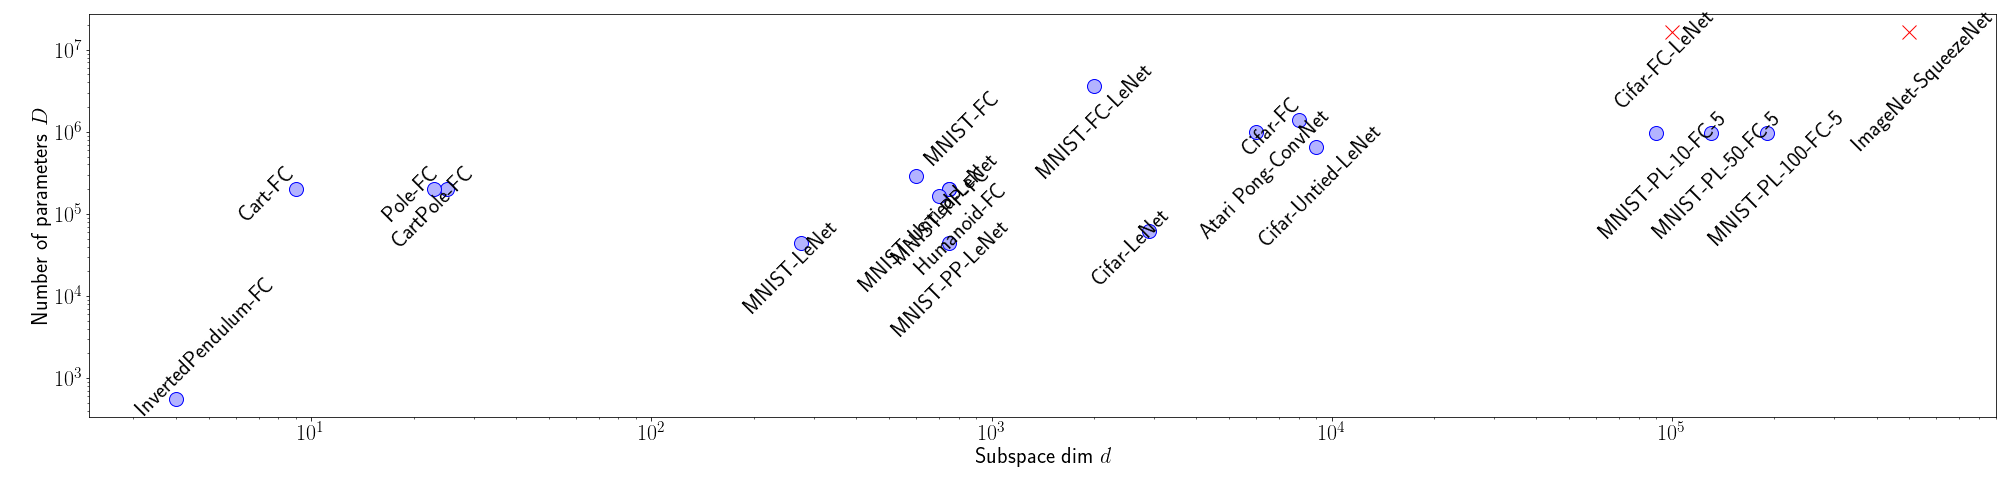

In [99]:
figsize(28, 7)
plt.rc('text', usetex=True)
# axhline(dir_perf, color=(.7,.7,.7), ls='-')
# axhline(.9 * dir_perf, color=(.7,.7,.7), ls='--')
gca().annotate('', xy=(10.4, .97), xytext=(12.5, .85), arrowprops=dict(arrowstyle="->"))

for i in range(len(dat_maps)):
    if i == len(dat_maps)-5: # InvertedPendulum
        plot( dat_maps[i][3], dat_maps[i][2], 'o', mec='b', lw=3, mfc=(.7,.7,1), color=(.7,.7,1), ms=14)
        text( dat_maps[i][3]-dat_maps[i][3]/3, dat_maps[i][2]+dat_maps[i][2]*20, dat_maps[i][0] +'-'+ dat_maps[i][1], rotation=45 )     
    elif i == len(dat_maps)-4:  # Humanoid
        plot( dat_maps[i][3], dat_maps[i][2], 'o', mec='b', lw=3, mfc=(.7,.7,1), color=(.7,.7,1), ms=14)
        text( dat_maps[i][3]-dat_maps[i][3]/6, dat_maps[i][2]-dat_maps[i][2]/120, dat_maps[i][0] +'-'+ dat_maps[i][1], rotation=45 )      
    elif i == 0:  # MNIST MLP
        plot( dat_maps[i][3], dat_maps[i][2], 'o', mec='b', lw=3, mfc=(.7,.7,1), color=(.7,.7,1), ms=14)
        text( dat_maps[i][3]-dat_maps[i][3]/6, dat_maps[i][2]+dat_maps[i][2]*10, dat_maps[i][0] +'-'+ dat_maps[i][1], rotation=45 )      
    elif i > len(dat_maps)-3: # unknow d_int
        plot( dat_maps[i][3], dat_maps[i][2], 'x', mec='r', lw=3, mfc=(.7,.7,1), color=(.7,.7,1), ms=14)
        text( dat_maps[i][3]-dat_maps[i][3]/3, dat_maps[i][2]+dat_maps[i][2]/3, dat_maps[i][0] +'-'+ dat_maps[i][1], rotation=45 )      
    else:    
        plot( dat_maps[i][3], dat_maps[i][2], 'o', mec='b', lw=3, mfc=(.7,.7,1), color=(.7,.7,1), ms=14)
        text( dat_maps[i][3]-dat_maps[i][3]/3, dat_maps[i][2]+dat_maps[i][2]/3, dat_maps[i][0] +'-'+ dat_maps[i][1], rotation=45 )


from matplotlib import pyplot
pyplot.xscale('log')
pyplot.yscale('log')


xlabel('Subspace dim $d$')
ylabel('Number of parameters $D$')
plt.tight_layout()
# savefig('AI_road_map.png')
# savefig('AI_road_map.pdf')

In [100]:
dat_maps_short = [
    # we have d_int
    
    # Standard
    ['MNIST','FC',   199210,  750],
    ['MNIST','LeNet', 44426,   275],
    ['Cifar','FC',  1393610, 8000],
    ['Cifar','LeNet', 62006,   2900],  

    # Shuffled Pixel MNIST
    ['MNIST-SP','FC',   199210,  750],
    ['MNIST-SP','LeNet', 44426,   750],
    
    # Shuffled Label MNIST
    ['MNIST-SL-100\%','FC-5', 959610, 190000], 
    ['MNIST-SL-50\%','FC-5',  959610, 130000],  
    ['MNIST-SL-10\%','FC-5',  959610, 90000],  
    
    # ConvNet controls
#     ['MNIST','Untied-LeNet', 286334,   600],
#     ['MNIST','FC-LeNet',    3640574,   2000],
#     ['Cifar','Untied-LeNet', 658238,   9000],
    
    # DQN
    ['CartPole','FC', 199210,   25],  
    ['Pole','FC', 199210,   23],  
    ['Cart','FC', 199210,   9],  
    
    # ES
    ['InvertedPendulum','FC', 562,   4], 
    ['Humanoid','FC', 166673,   700],     
    ['Atari Pong','ConvNet', 1005974,   6000], 
    
    # we do NOT have d_int yet
    # ['Cifar','FC-LeNet', 16397726,   100000],
    ['ImageNet','SqueezeNet', 16397726,   500000],
]

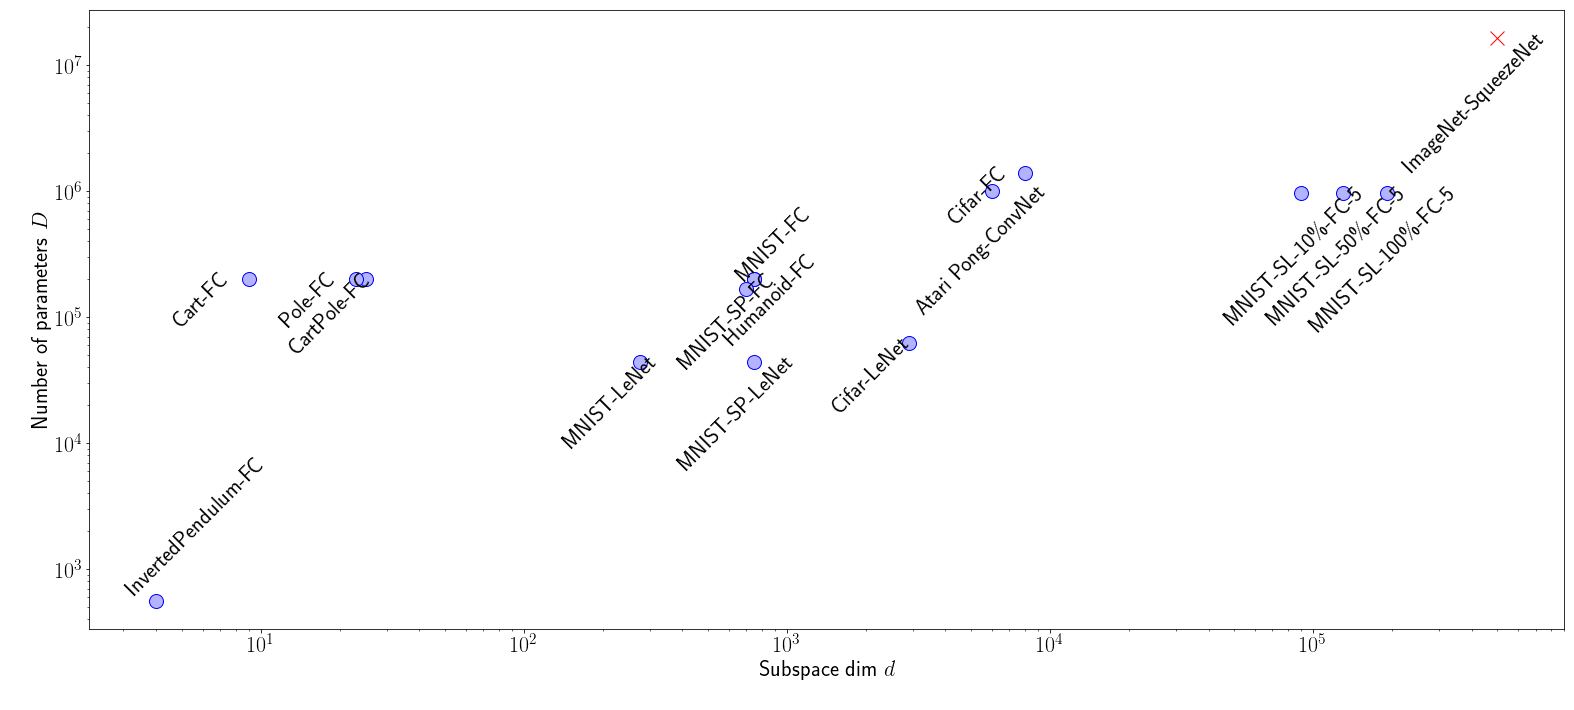

In [101]:
dat_maps = dat_maps_short

figsize(22, 10)
plt.rc('text', usetex=True)
# axhline(dir_perf, color=(.7,.7,.7), ls='-')
# axhline(.9 * dir_perf, color=(.7,.7,.7), ls='--')
gca().annotate('', xy=(10.4, .97), xytext=(12.5, .85), arrowprops=dict(arrowstyle="->"))

for i in range(len(dat_maps)):
    if i == len(dat_maps)-4: # InvertedPendulum
        plot( dat_maps[i][3], dat_maps[i][2], 'o', mec='b', lw=3, mfc=(.7,.7,1), color=(.7,.7,1), ms=14)
        text( dat_maps[i][3]-dat_maps[i][3]/3, dat_maps[i][2]+dat_maps[i][2]*10, dat_maps[i][0] +'-'+ dat_maps[i][1], rotation=45 )     
    elif i == len(dat_maps)-3:  # Humanoid
        plot( dat_maps[i][3], dat_maps[i][2], 'o', mec='b', lw=3, mfc=(.7,.7,1), color=(.7,.7,1), ms=14)
        text( dat_maps[i][3]-dat_maps[i][3]/5, dat_maps[i][2]+dat_maps[i][2]/2, dat_maps[i][0] +'-'+ dat_maps[i][1], rotation=45 )      
    elif i == 0:  # MNIST MLP
        plot( dat_maps[i][3], dat_maps[i][2], 'o', mec='b', lw=3, mfc=(.7,.7,1), color=(.7,.7,1), ms=14)
        text( dat_maps[i][3]-dat_maps[i][3]/6, dat_maps[i][2]+dat_maps[i][2]*2, dat_maps[i][0] +'-'+ dat_maps[i][1], rotation=45 )      
    elif i == len(dat_maps)-1: # unknow d_int
        plot( dat_maps[i][3], dat_maps[i][2], 'x', mec='r', lw=3, mfc=(.7,.7,1), color=(.7,.7,1), ms=14)
        text( dat_maps[i][3]-dat_maps[i][3]/1.75, dat_maps[i][2]-dat_maps[i][2]/10, dat_maps[i][0] +'-'+ dat_maps[i][1], rotation=45 )      
    else:
        plot( dat_maps[i][3], dat_maps[i][2], 'o', mec='b', lw=3, mfc=(.7,.7,1), color=(.7,.7,1), ms=14)
        text( dat_maps[i][3]-dat_maps[i][3]/2.0, dat_maps[i][2]-dat_maps[i][2]/10.5, dat_maps[i][0] +'-'+ dat_maps[i][1], rotation=45 )


from matplotlib import pyplot
pyplot.xscale('log')
pyplot.yscale('log')

xlabel('Subspace dim $d$')
ylabel('Number of parameters $D$')
plt.tight_layout()
# savefig('AI_road_map.png')
savefig('d_int_road_map.pdf')

In [102]:
dat_maps

[['MNIST', 'FC', 199210, 750],
 ['MNIST', 'LeNet', 44426, 275],
 ['Cifar', 'FC', 1393610, 8000],
 ['Cifar', 'LeNet', 62006, 2900],
 ['MNIST-SP', 'FC', 199210, 750],
 ['MNIST-SP', 'LeNet', 44426, 750],
 ['MNIST-SL-100\\%', 'FC-5', 959610, 190000],
 ['MNIST-SL-50\\%', 'FC-5', 959610, 130000],
 ['MNIST-SL-10\\%', 'FC-5', 959610, 90000],
 ['CartPole', 'FC', 199210, 25],
 ['Pole', 'FC', 199210, 23],
 ['Cart', 'FC', 199210, 9],
 ['InvertedPendulum', 'FC', 562, 4],
 ['Humanoid', 'FC', 166673, 700],
 ['Atari Pong', 'ConvNet', 1005974, 6000],
 ['ImageNet', 'SqueezeNet', 16397726, 500000]]

In [103]:
for i in range(len(dat_maps)):
    string = ''
    for j in range(len(dat_maps[i])):
        t=dat_maps[i][j]
        # print t
        if isinstance( t, int ):
            if j==3:
                string += str(t) + ' \\\ '
            else:
                string += str(t) + ' & '
        else:
            string += t + ' & '
            
    print string 

MNIST & FC & 199210 & 750 \\ 
MNIST & LeNet & 44426 & 275 \\ 
Cifar & FC & 1393610 & 8000 \\ 
Cifar & LeNet & 62006 & 2900 \\ 
MNIST-SP & FC & 199210 & 750 \\ 
MNIST-SP & LeNet & 44426 & 750 \\ 
MNIST-SL-100\% & FC-5 & 959610 & 190000 \\ 
MNIST-SL-50\% & FC-5 & 959610 & 130000 \\ 
MNIST-SL-10\% & FC-5 & 959610 & 90000 \\ 
CartPole & FC & 199210 & 25 \\ 
Pole & FC & 199210 & 23 \\ 
Cart & FC & 199210 & 9 \\ 
InvertedPendulum & FC & 562 & 4 \\ 
Humanoid & FC & 166673 & 700 \\ 
Atari Pong & ConvNet & 1005974 & 6000 \\ 
ImageNet & SqueezeNet & 16397726 & 500000 \\ 
